In [51]:
# check whether we connected to GPU or not
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [24]:
!ls

BSR  BSR_bsds500.tar  BSR_bsds500.tgz  datalab


# Downloading the data

In [52]:
!wget http://www.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/BSR/BSR_bsds500.tgz
!ls
!uncompress BSR_bsds500.tgz
!tar -xvf BSR_bsds500.tar
#!rm BSR_bsds500.tar
!ls

--2018-05-17 21:56:55--  http://www.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/BSR/BSR_bsds500.tgz
Resolving www.eecs.berkeley.edu (www.eecs.berkeley.edu)... 23.185.0.1, 2620:12a:8001::1, 2620:12a:8000::1
Connecting to www.eecs.berkeley.edu (www.eecs.berkeley.edu)|23.185.0.1|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/BSR/BSR_bsds500.tgz [following]
--2018-05-17 21:56:55--  https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/BSR/BSR_bsds500.tgz
Resolving www2.eecs.berkeley.edu (www2.eecs.berkeley.edu)... 128.32.244.183
Connecting to www2.eecs.berkeley.edu (www2.eecs.berkeley.edu)|128.32.244.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70763455 (67M) [application/x-tar]
Saving to: ‘BSR_bsds500.tgz.2’

BSR_bsds500.tgz.2   100%[===================>]  67.48M  19.9MB/s    in 4.2s    

2018-05-17 21:57:00 (15.9 MB/s) - 

BSR/BSDS500/data/images/val/253027.jpg
BSR/BSDS500/data/images/val/376043.jpg
BSR/BSDS500/data/images/val/143090.jpg
BSR/BSDS500/data/images/val/170057.jpg
BSR/BSDS500/data/images/val/385039.jpg
BSR/BSDS500/data/images/val/159008.jpg
BSR/BSDS500/data/images/val/134035.jpg
BSR/BSDS500/data/images/val/216081.jpg
BSR/BSDS500/data/images/val/89072.jpg
BSR/BSDS500/data/images/val/220075.jpg
BSR/BSDS500/data/images/val/223061.jpg
BSR/BSDS500/data/images/val/148026.jpg
BSR/BSDS500/data/images/val/33039.jpg
BSR/BSDS500/data/images/val/147091.jpg
BSR/BSDS500/data/images/val/167062.jpg
BSR/BSDS500/data/images/val/285079.jpg
BSR/BSDS500/data/images/val/42049.jpg
BSR/BSDS500/data/images/val/41033.jpg
BSR/BSDS500/data/images/val/156065.jpg
BSR/BSDS500/data/images/val/8023.jpg
BSR/BSDS500/data/images/val/108070.jpg
BSR/BSDS500/data/images/val/101087.jpg
BSR/BSDS500/data/images/val/229036.jpg
BSR/BSDS500/data/images/val/241004.jpg
BSR/BSDS500/data/images/val/85048.jpg
BSR/BSDS500/data/images/val/3000

In [4]:
!ls

BSR  BSR_bsds500.tar  datalab


In [37]:
import numpy as np
from os import listdir
from os.path import isfile, join

# get all the images files and boundary file
img_dir = "BSR/BSDS500/data/images/train/"
boundary_dir = "BSR/BSDS500/data/groundTruth/train/"
img_files = [f for f in listdir(img_dir) if isfile(join(img_dir, f)) and f.endswith(".jpg")]
boundary_files = [f for f in listdir(boundary_dir) if isfile(join(boundary_dir, f)) and f.endswith(".mat")]

num = len(boundary_files)

print("image files")
sorted_img_files=sorted(img_files)
print(sorted_img_files)
print(len(img_files))
print("boundary files")
sorted_boundary_files=sorted(boundary_files)
print(sorted_boundary_files)
print(len(boundary_files))

image files
['100075.jpg', '100080.jpg', '100098.jpg', '103041.jpg', '104022.jpg', '105019.jpg', '105053.jpg', '106020.jpg', '106025.jpg', '108041.jpg', '108073.jpg', '109034.jpg', '112082.jpg', '113009.jpg', '113016.jpg', '113044.jpg', '117054.jpg', '118020.jpg', '118035.jpg', '12003.jpg', '12074.jpg', '122048.jpg', '124084.jpg', '126039.jpg', '130034.jpg', '134008.jpg', '134052.jpg', '135037.jpg', '135069.jpg', '138032.jpg', '138078.jpg', '140055.jpg', '140075.jpg', '144067.jpg', '145014.jpg', '145053.jpg', '147021.jpg', '147062.jpg', '15004.jpg', '15088.jpg', '151087.jpg', '153077.jpg', '153093.jpg', '155060.jpg', '156079.jpg', '157036.jpg', '159029.jpg', '159045.jpg', '159091.jpg', '16052.jpg', '161062.jpg', '163014.jpg', '163062.jpg', '164074.jpg', '166081.jpg', '169012.jpg', '170054.jpg', '172032.jpg', '173036.jpg', '176019.jpg', '176035.jpg', '176039.jpg', '178054.jpg', '181018.jpg', '181079.jpg', '181091.jpg', '183055.jpg', '183087.jpg', '187003.jpg', '187029.jpg', '187039.jpg'

Getting data from mat files:

In [0]:
import scipy.io
import numpy as np
def get_GT_images(sorted_boundary_files):
  images={}
  
  i=0

  for path in sorted_boundary_files:
    gTs_per_image={}
    path="BSR/BSDS500/data/groundTruth/train/"+path
    mat = scipy.io.loadmat(path)
    groundTruth = mat.get('groundTruth')
    label_num = groundTruth.size
    for M in range(label_num):
      segmentation = groundTruth[0][M]['Segmentation'][0][0]
      gTs_per_image[M]=segmentation
    images[i]=gTs_per_image
    i+=1
  return images

In [0]:
import scipy.io
import numpy as np
def get_GT_images_boundary(sorted_boundary_files):
  images={}
  
  i=0

  for path in sorted_boundary_files:
    gTs_per_image={}
    path="BSR/BSDS500/data/groundTruth/train/"+path
    mat = scipy.io.loadmat(path)
    groundTruth = mat.get('groundTruth')
    label_num = groundTruth.size
    for M in range(label_num):
      segmentation = groundTruth[0][M]['Boundaries'][0][0]
      gTs_per_image[M]=segmentation
    images[i]=gTs_per_image
    i+=1
  return images

In [40]:
images=get_GT_images(sorted_boundary_files)
boundaries=get_GT_images_boundary(sorted_boundary_files)
print(len(images[0]))

6


# Visualization


100075.mat


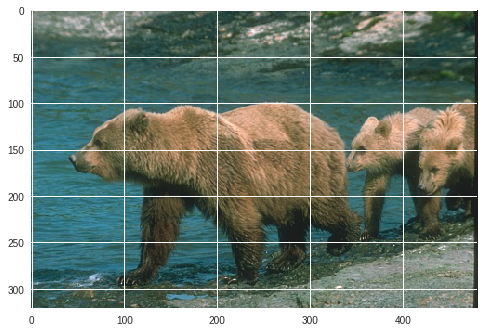

In [57]:
import matplotlib.pyplot as plt
import matplotlib.image as img
print(sorted_boundary_files[0])
x=img.imread("BSR/BSDS500/data/images/train/"+sorted_img_files[0])
plt.imshow(x)

100075.mat
photo and color segments:
boundaries of clusters:


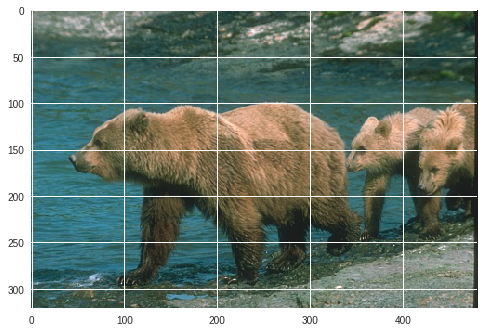

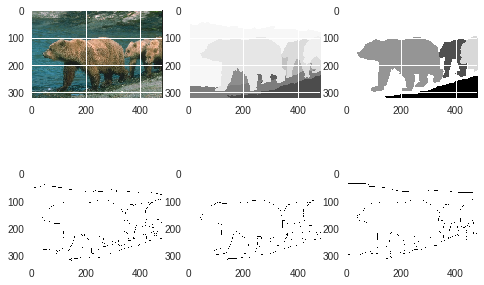

In [44]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import matplotlib.pyplot as plt
#plt.imshow(images[0][2])
#plt.imshow(images[0][1])
print(sorted_boundary_files[0])
x=img.imread("BSR/BSDS500/data/images/train/"+sorted_img_files[0])
plt.imshow(x)

f, axarr = plt.subplots(2,3)
print("photo and color segments:")
axarr[0,0].imshow(x)
axarr[0,1].imshow(images[0][0])
axarr[0,2].imshow(images[0][1])

print("boundaries of clusters:")
axarr[1,0].imshow(boundaries[0][0])
axarr[1,1].imshow(boundaries[0][1])
axarr[1,2].imshow(boundaries[0][2])


photo and color segments:
boundaries:


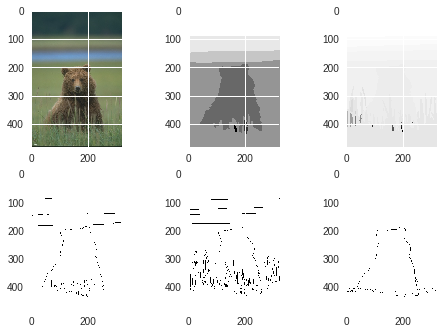

In [59]:

x=img.imread("BSR/BSDS500/data/images/train/"+sorted_img_files[1])


f, axarr = plt.subplots(2,3)
print("photo and color segments:")
axarr[0,0].imshow(x)
axarr[0,1].imshow(images[1][0])
axarr[0,2].imshow(images[1][1])

print("boundaries:")
axarr[1,0].imshow(boundaries[1][0])
axarr[1,1].imshow(boundaries[1][1])
axarr[1,2].imshow(boundaries[1][2])



In [0]:
from sklearn.metrics import f1_score



import numpy as np
from matplotlib import pyplot as plt

import cv2

imgs=[]
imgs_clust_grey=[]
imgs.append(cv2.imread('BSR/BSDS500/data/images/train/97017.jpg'))
#imgs.append(cv2.imread('BSR/BSDS500/data/images/train/145053.jpg'))

def images_to_seg(imgs,K):
#img = cv2.imread('BSR/BSDS500/data/images/train/97017.jpg')
  imgs_gray=[]
  for img in imgs:
    Z = img.reshape((-1,3))

    # convert to np.float32
    Z = np.float32(Z)

    # define criteria, number of clusters(K) and apply kmeans()
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    #K = 8
    ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    #print(label)

    # Now convert back into uint8, and make original image
    center = np.uint8(center)
    res = center[label.flatten()]
    res2 = res.reshape((img.shape))
   
    from skimage.color import rgb2gray
    img_gray = rgb2gray(res2)
    
    
    #print("NP UNIQUE",np.unique(img_gray))
    '''
    plt.imshow(img_gray)
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()
    '''
    imgs_gray.append(img_gray)

  return imgs_gray
    






In [0]:
def fmeasure(mat,groundTruth,K):
  import scipy.io
  import numpy as np
  mat = mat #scipy.io.loadmat("BSR/BSDS500/data/groundTruth/train/97017.mat")
  #groundTruth = mat.get('groundTruth')
  seg = groundTruth
  

  test=images_to_seg([mat],K)[0]
  #print(np.unique(test))
  purity=[]
  recall=[]
  Fi=[]
  for i in range(len(np.unique(test))):
    q=(np.where((test==np.unique(test)[i])))
    s=[seg[i,j] for i,j in zip(q[0],q[1])]
    unique_elements, counts_elements = np.unique(s, return_counts=True)
    purity.append(np.amax(counts_elements)/len(s))
    unique_elements1, counts_elements1 = np.unique(seg, return_counts=True)
    index=np.where(unique_elements1==unique_elements[np.argmax(counts_elements)])
    #print(index[0][0])
    #print(counts_elements1)
    recall.append(np.amax(counts_elements)/counts_elements1[index[0][0]])
  for j,k in zip(purity,recall):
    Fi.append(2*j*k/(j+k))
  F_total=np.sum(Fi)/len(Fi)
  print("f-measure:",F_total)

  #print(purity)
  #print(recall)
#print(str(np.argmax(np.bincount(s))))




# for i in range(len(np.unique(test))):
#   q=(np.where((test==np.unique(test)[i])))
#   s=[seg[i,j] for i,j in zip(q[0],q[1])]
#   unique_elements, counts_elements = np.unique(s, return_counts=True)


In [56]:
i=0
K_number_=[3,5,7,9,11]
for image_name in sorted_img_files:
  path="BSR/BSDS500/data/images/train/"+image_name
  #the real image that you want:
  image_matrix=img.imread(path)
  print("For image number ",i)
  for j in range(len(images[i])):
    print("For segmentation number ",j)
    for k in K_number_: 
      print("For K == ",k)
      groundTruth=images[i][j]
      fmeasure(image_matrix,groundTruth,k)
    print(len(groundTruth))
  i+=1

For image number  0
For segmentation number  0
For K ==  3
f-measure: 0.4560371681188715
For K ==  5
f-measure: 0.4443442196294497
For K ==  7
f-measure: 0.4273971534686461
For K ==  9
f-measure: 0.38073447086982815
For K ==  11
f-measure: 0.3218588531512782
321
For segmentation number  1
For K ==  3
f-measure: 0.4927667789468177
For K ==  5
f-measure: 0.36673399122667233
For K ==  7
f-measure: 0.3810837844035834
For K ==  9
f-measure: 0.333753691122908
For K ==  11
f-measure: 0.3055823740981585
321
For segmentation number  2
For K ==  3
f-measure: 0.45994737243169964
For K ==  5
f-measure: 0.39130814408896797
For K ==  7
f-measure: 0.39870870348649773
For K ==  9
f-measure: 0.36120786769835184
For K ==  11
f-measure: 0.31921947794522804
321
For segmentation number  3
For K ==  3
f-measure: 0.4606391777450196
For K ==  5
f-measure: 0.39163969954848443
For K ==  7
f-measure: 0.3959956331669323
For K ==  9
f-measure: 0.3601046966941373
For K ==  11
f-measure: 0.32924596015326696
321
For 

f-measure: 0.3631568000730828
For K ==  9
f-measure: 0.28714250912045014
For K ==  11
f-measure: 0.25842929416289356
321
For segmentation number  2
For K ==  3
f-measure: 0.5550861352359285
For K ==  5
f-measure: 0.43627186134657003
For K ==  7


KeyboardInterrupt: ignored

In [0]:
i=0
for image_name in sorted_img_files:
  path="BSR/BSDS500/data/images/train/"+image_name
  #the real image that you want:
  image_matrix=img.imread(path)
  for j in range(len(images[i])):
    #do sth with ground truth
    groundTruth=images[i][j]
    print(len(groundTruth))
  i+=1

In [48]:
# ################################# DON'T ENTER #########################################
# i=0
# no_k=5
# for image_name in sorted_img_files:
#   path="BSR/BSDS500/data/images/train/"+image_name
#   #the real image that you want:
#   #image_matrix=cv2.imread(path)
#   mat = cv2.imread(path)
#   print("image number ",i)
#   for j in range(len(images[i])):
#     #do sth with ground truth
#     print("segmentation number ",j)
    
#     seg = images[i][j]
    
    
# #    mat = scipy.io.loadmat(path)
# #     groundTruth = mat.get('groundTruth')
# #     seg = groundTruth[0][0]['Segmentation'][0][0]
#     #matplotlib.image.imsave('name.png', seg)
#     #files.download('namae.png')

#     test=images_to_seg([mat],no_k)
#     print(np.unique(test))
#     purity=[]
#     recall=[]
#     Fi=[]
#     for w in range(len(np.unique(test))):
#       q=(np.where((test==np.unique(test)[w])))
#       s=[seg[w,j] for w,j in zip(q[0],q[1])]
#       unique_elements, counts_elements = np.unique(s, return_counts=True)
#       purity.append(np.amax(counts_elements)/len(s))
#       unique_elements1, counts_elements1 = np.unique(seg, return_counts=True)
#       index=np.where(unique_elements1==unique_elements[np.argmax(counts_elements)])
#       #print(index[0][0])
#       #print(counts_elements1)
#       recall.append(np.amax(counts_elements)/counts_elements1[index[0][0]])
#     for j,k in zip(purity,recall):
#       Fi.append(2*j*k/(j+k))
#       F_total=np.sum(Fi)/len(Fi)
#     print("f-measure:",F_total)

#       #print(purity)
#       #print(recall)
    
#     #print(len(groundTruth))
#   i+=1

image number  0
segmentation number  0
[0.2062     0.33532196 0.43341961 0.4668549  0.62289843]
f-measure: 0.9788349095490583
segmentation number  1
[0.19835686 0.32692824 0.42839686 0.46293333 0.62009294]
f-measure: 0.5066543039299569
segmentation number  2
[0.17622627 0.29557059 0.41079098 0.45425686 0.6144898 ]
f-measure: 1.0037378940104869
segmentation number  3
[0.20900549 0.3384102  0.43341961 0.46797098 0.62429725]
f-measure: 0.9434728812546501
segmentation number  4
[0.18406941 0.30732039 0.41945255 0.44332549 0.60636392]
f-measure: 0.9831215524978081
segmentation number  5
[0.19555137 0.32300667 0.42392471 0.46293333 0.62009294]
f-measure: 0.9307711568491508
image number  1
segmentation number  0
[0.19785804 0.24502784 0.35394078 0.48565294 0.56415333]


IndexError: ignored

for K =3
for image0
for seg0


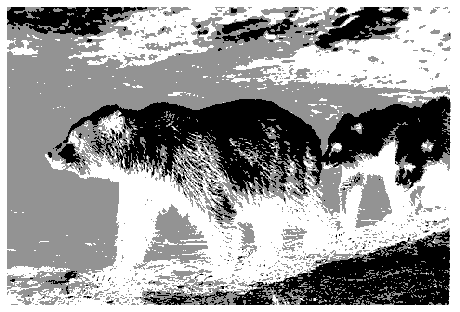

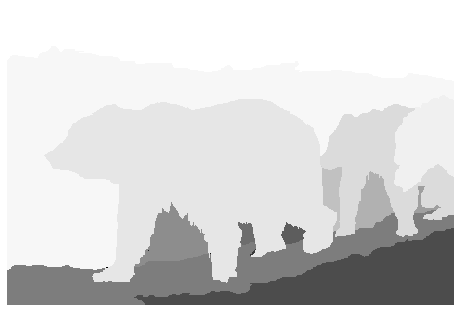

1.56816906033241
for seg1


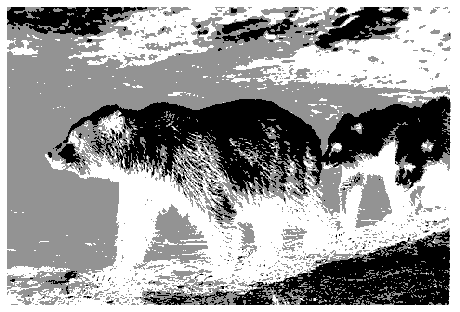

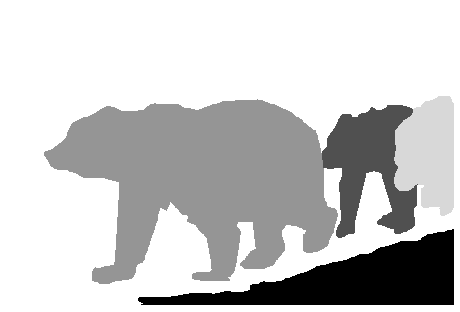

0.9615616291897139
for seg2


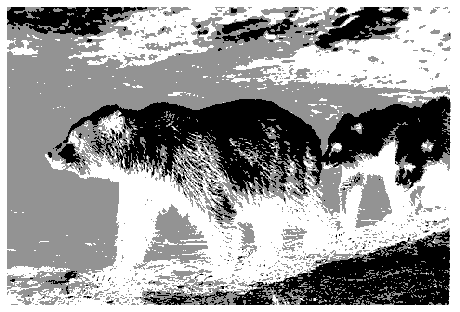

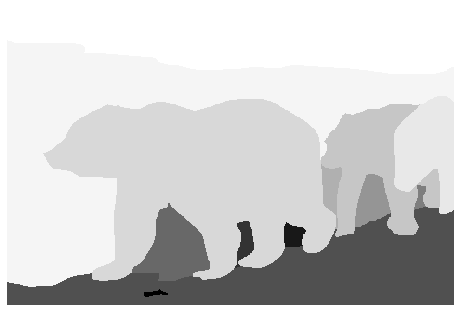

1.5426117715285672
for seg3


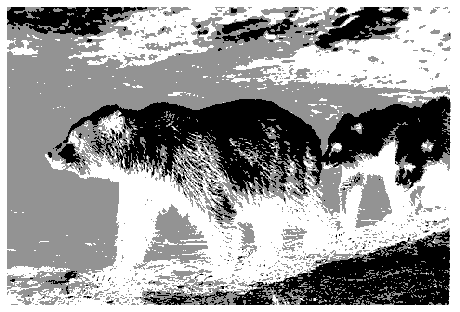

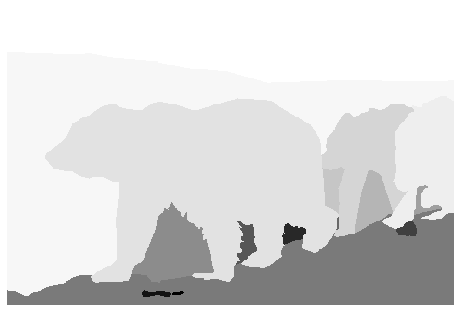

1.545722587673962
for seg4


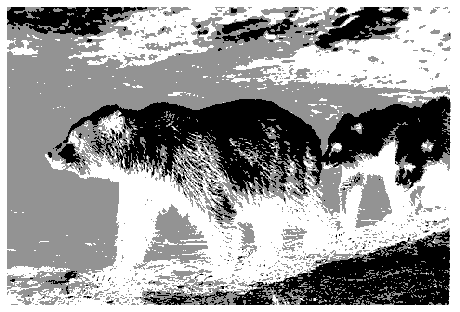

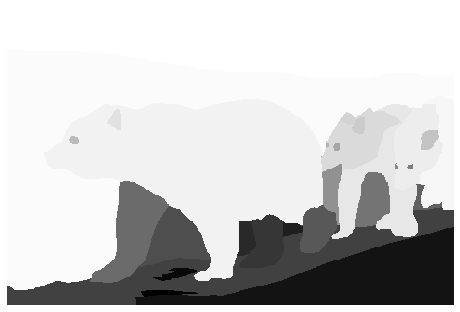

1.785897852092994
for seg5


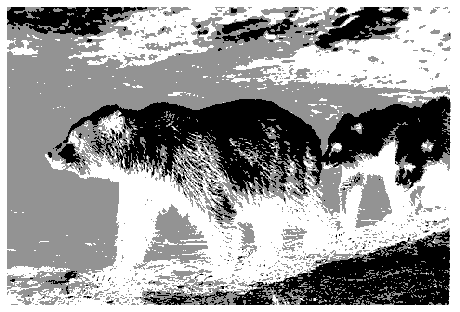

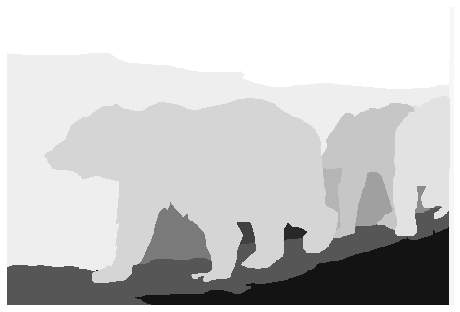

1.5804886669740128
averaagee of image 0= 1.4974085946319435
for image1
for seg0


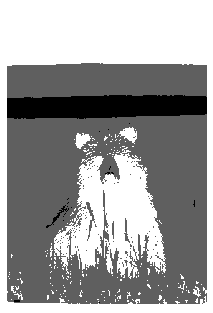

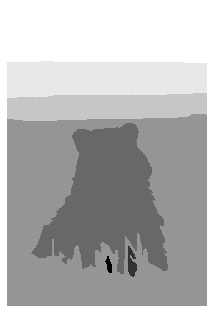

1.9081517639437915
for seg1


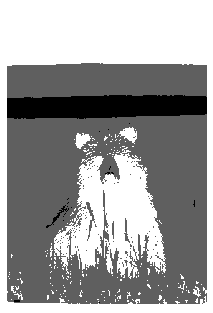

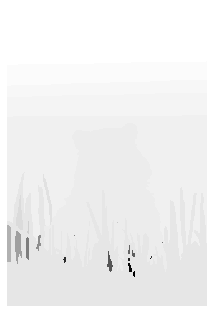

2.7675834460277384
for seg2


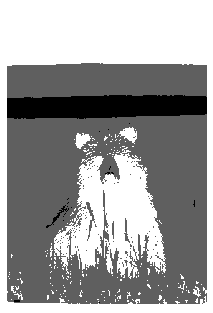

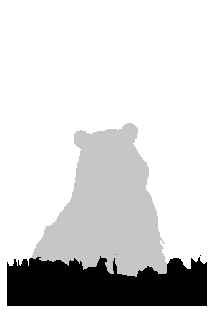

1.7105333158889786
for seg3


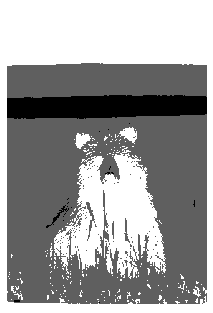

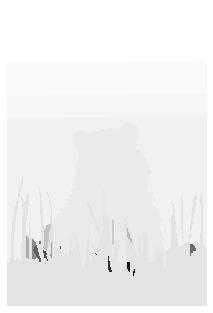

2.5710150127850704
for seg4


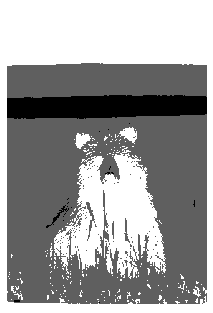

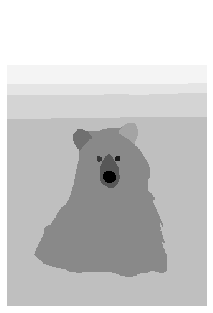

2.1562613152348886
averaagee of image 1= 4.019599284334426
for image2
for seg0


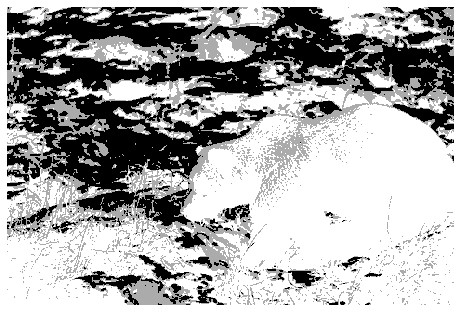

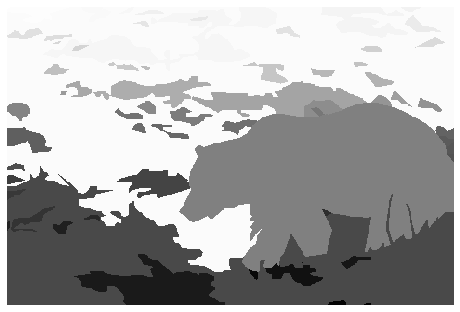

1.4083918773848851
for seg1


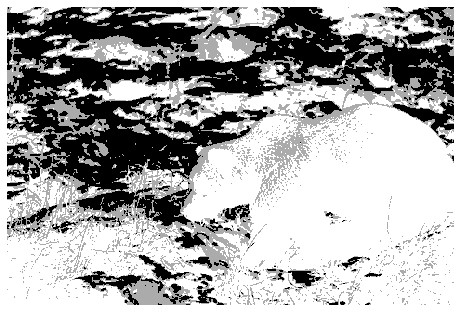

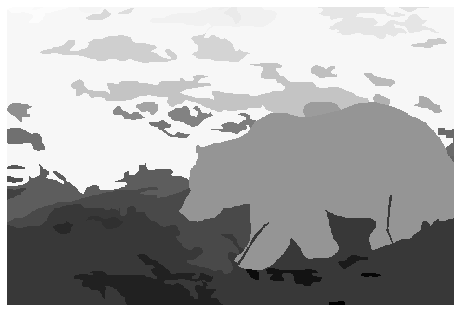

1.518449170227969
for seg2


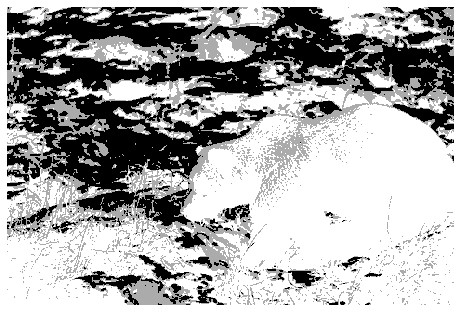

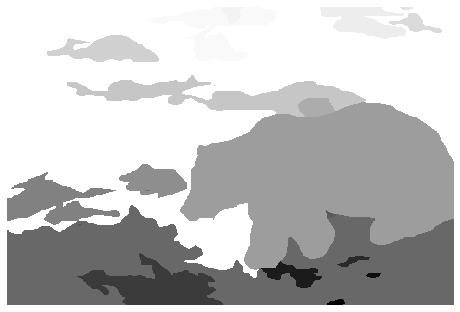

1.2470658342729615
for seg3


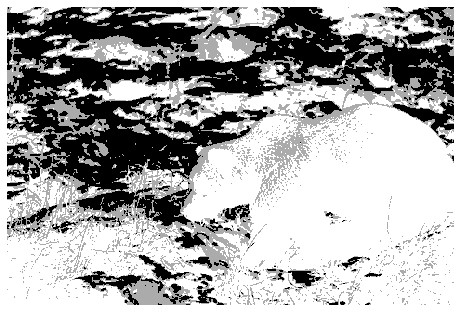

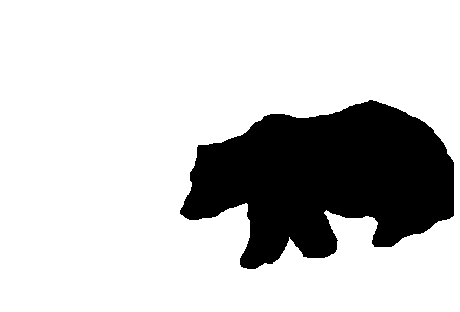

0.39462081709508967
for seg4


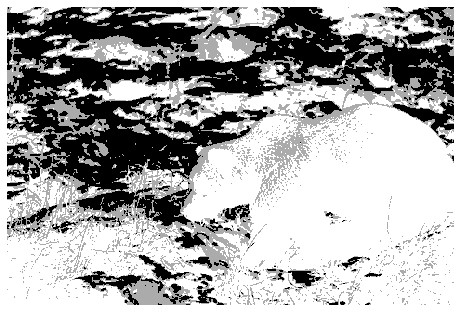

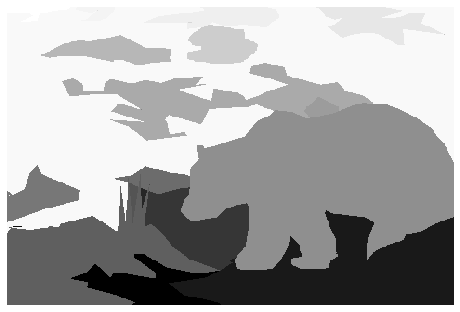

1.5845787751086304
averaagee of image 2= 5.250220579152333
for image3
for seg0


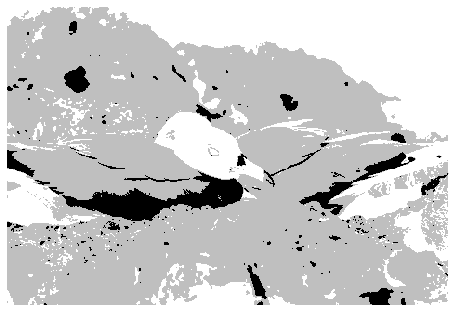

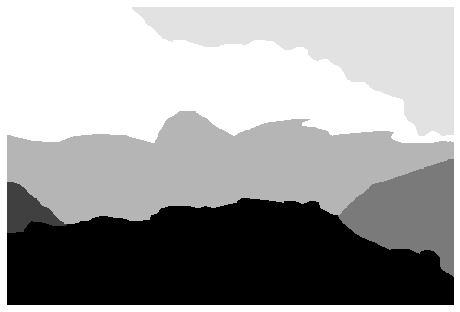

1.2285055672418845
for seg1


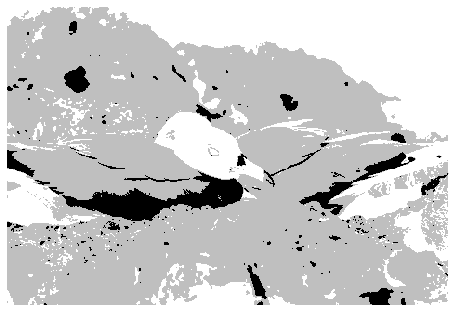

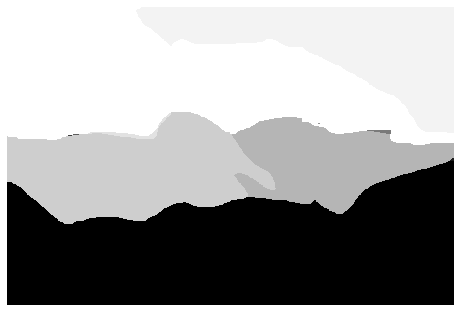

1.2261230105395695
for seg2


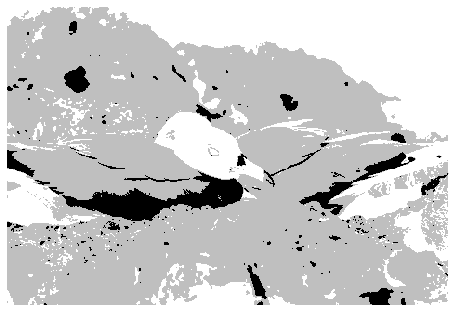

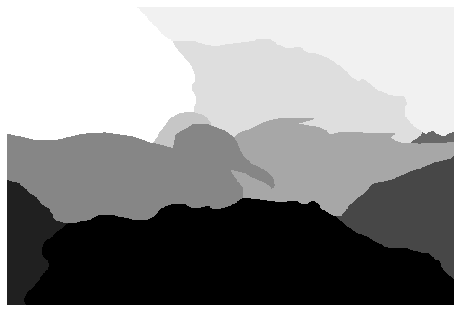

1.645315919396174
for seg3


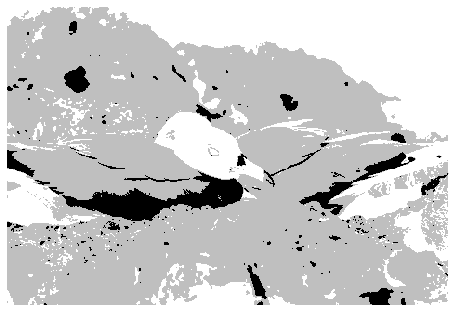

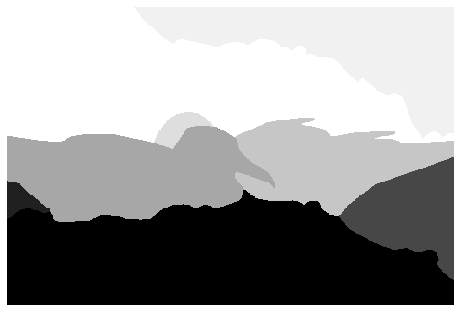

1.3756669698940094
for seg4


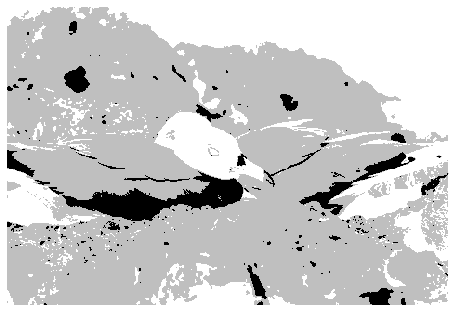

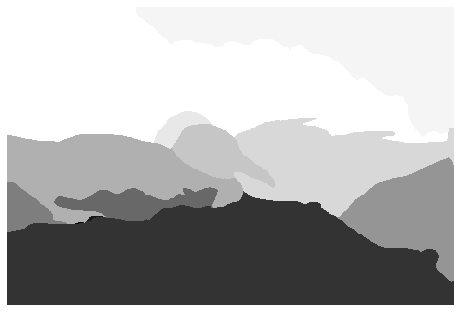

1.452408613408298
for seg5


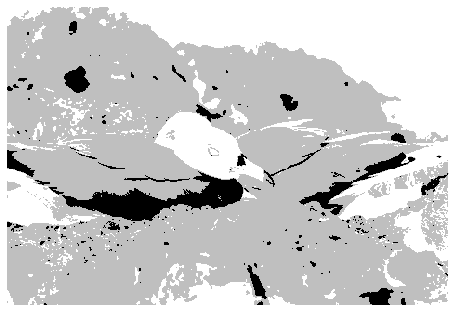

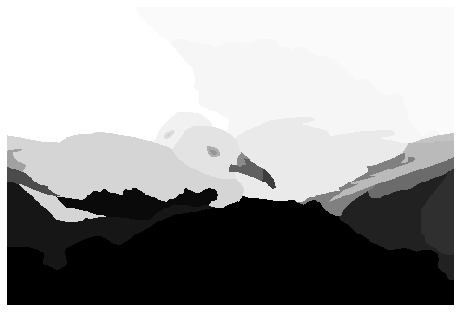

1.8305843702922635
averaagee of image 3= 5.834951224422311
for image4
for seg0


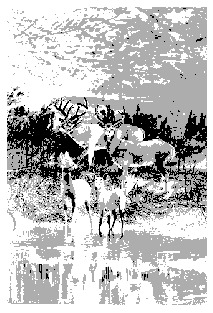

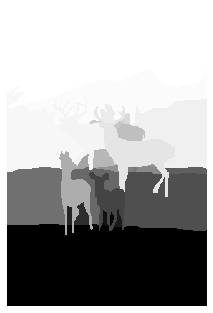

4.396096835700617
for seg1


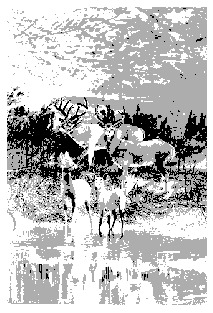

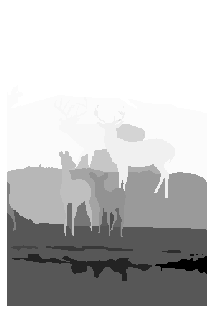

4.099185637979515
for seg2


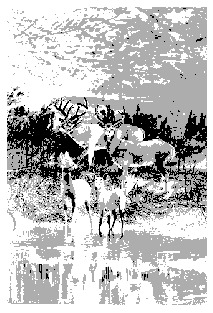

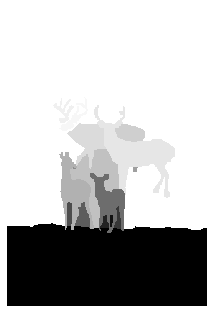

2.5245223817450873
for seg3


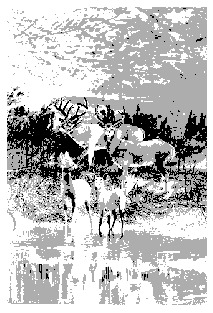

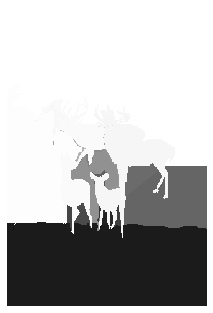

3.455759356609494
for seg4


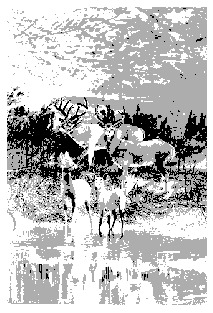

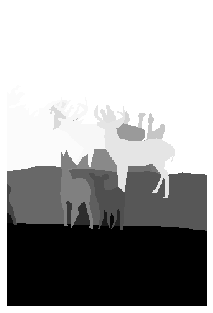

3.8289262102501107
for seg5


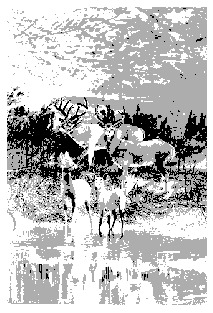

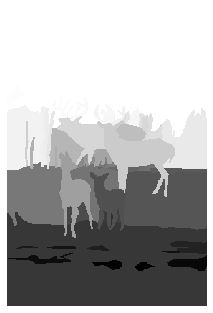

4.448343103033806
for seg6


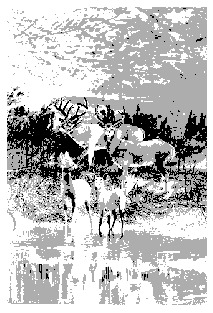

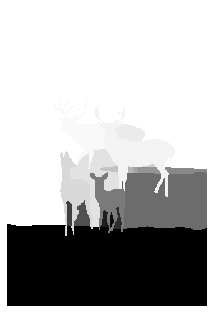

3.0478438462168143
averaagee of image 4= 8.687197816867045
for image5
for seg0


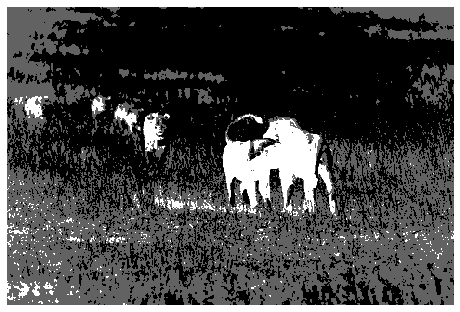

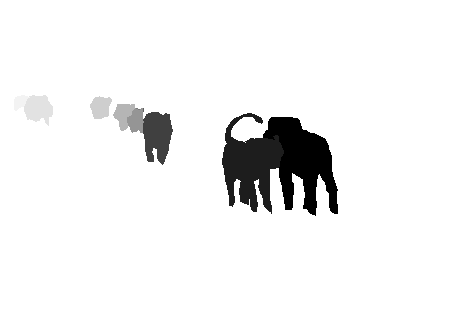

0.271599585163508
for seg1


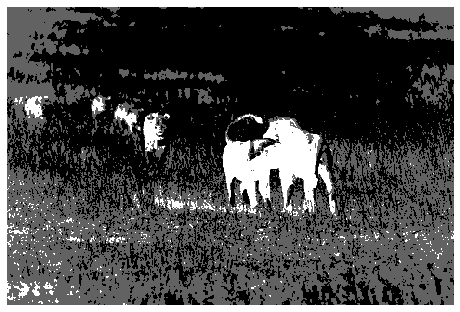

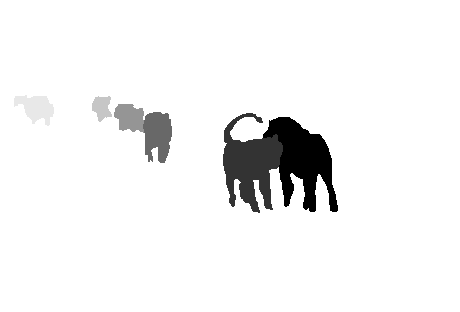

0.2510759400455814
for seg2


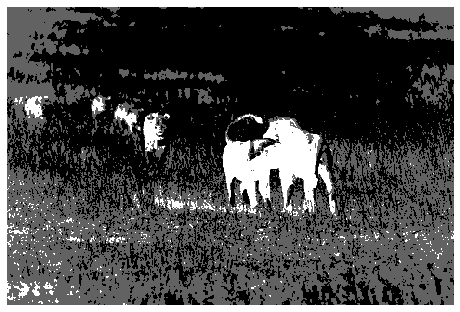

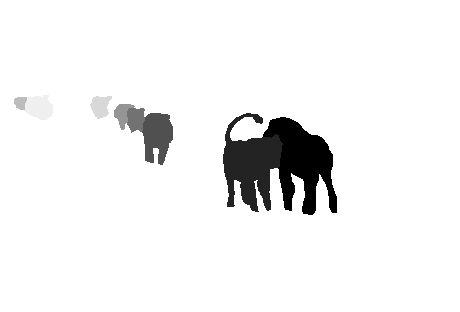

0.2600298039249583
for seg3


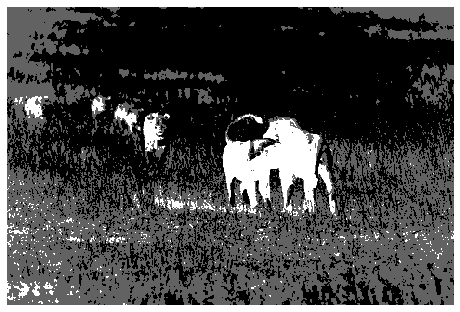

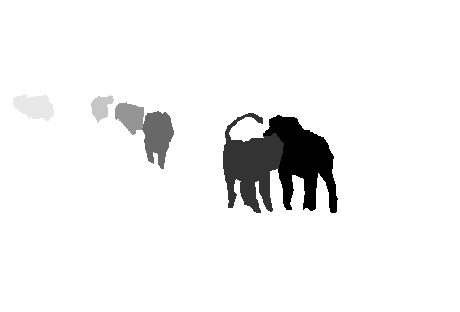

0.26597963607754743
for seg4


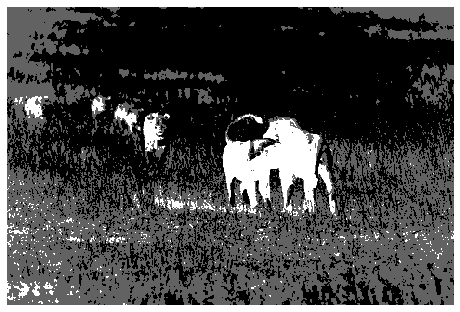

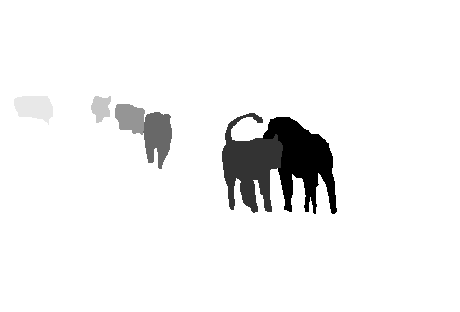

0.26430983365745553
for seg5


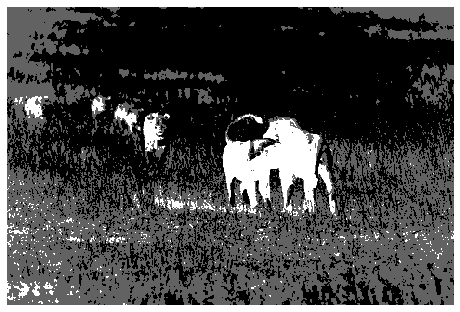

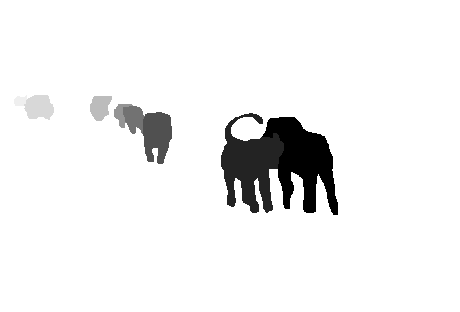

0.27250170920842615
averaagee of image 5= 10.39931353769113
for image6
for seg0


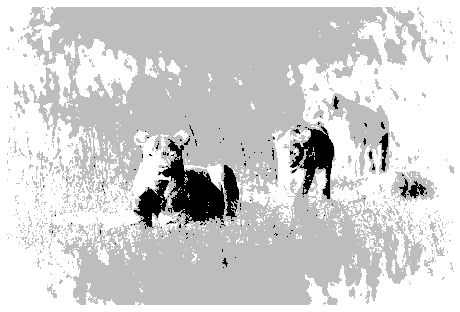

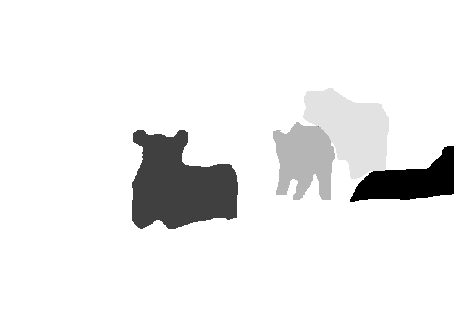

0.46858852934665435
for seg1


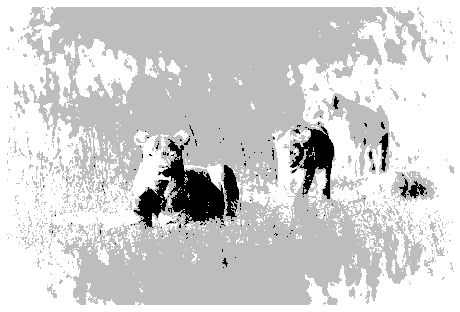

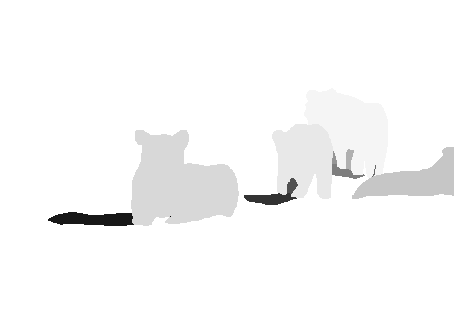

0.5360447253387353
for seg2


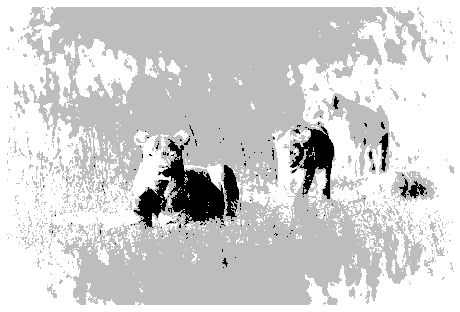

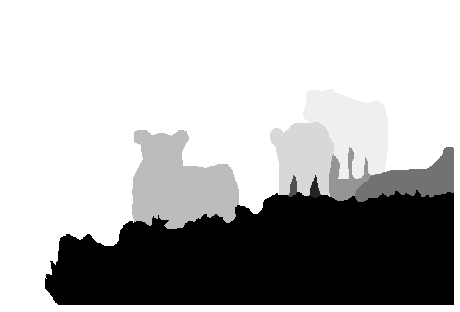

1.0306732001427368
for seg3


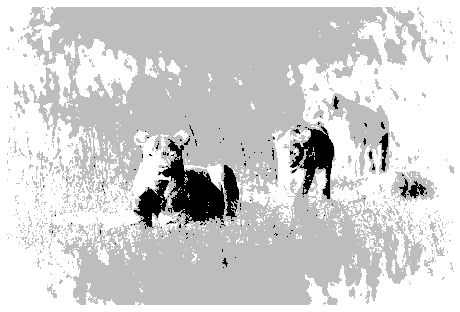

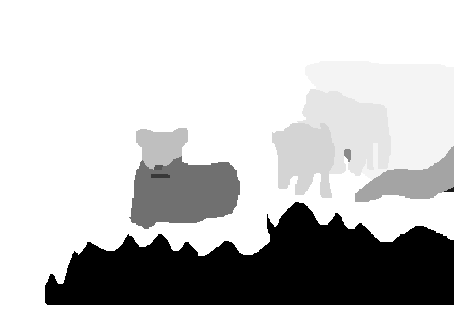

1.1169004713359898
for seg4


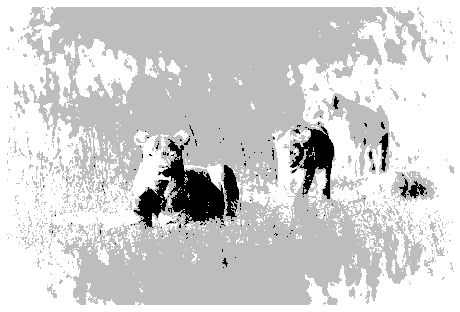

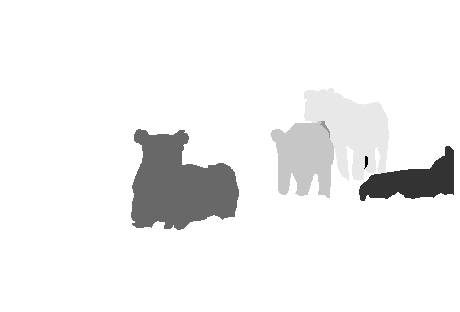

0.4617606759127916
averaagee of image 6= 13.201969765644739
for image7
for seg0


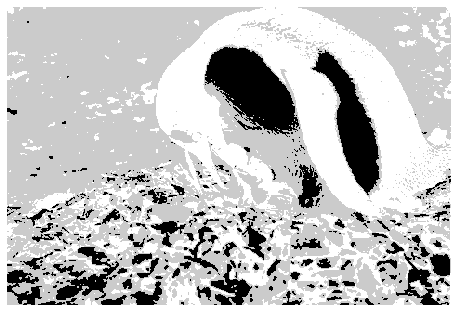

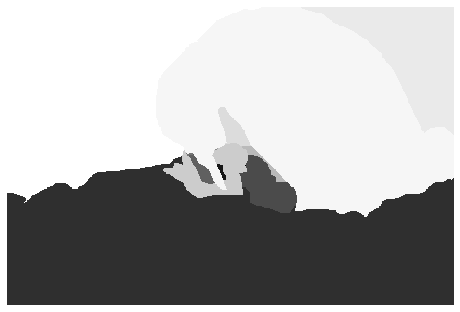

1.1569701654220106
for seg1


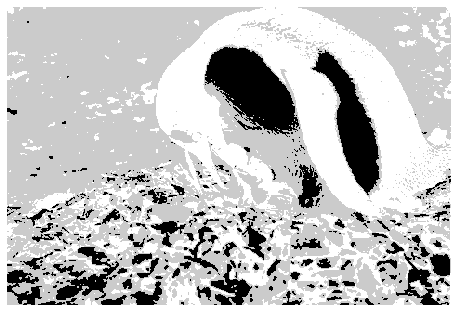

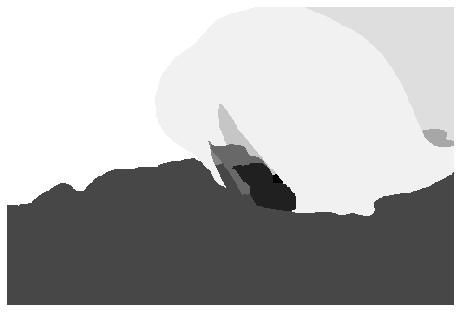

1.123596413459179
for seg2


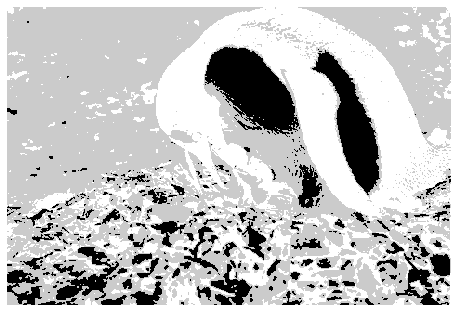

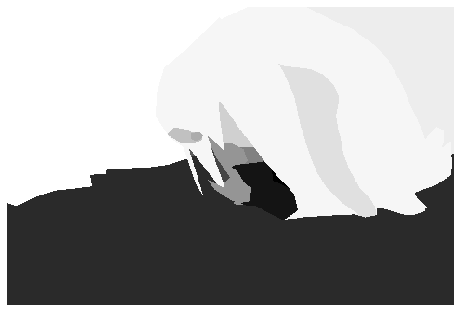

1.2549153878493553
for seg3


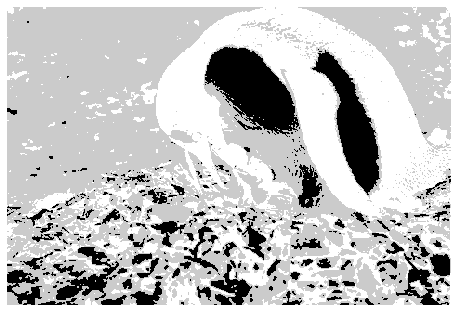

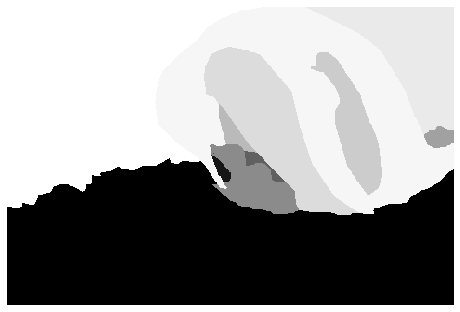

1.2260824648214625
for seg4


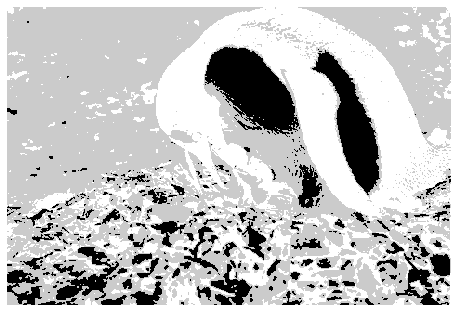

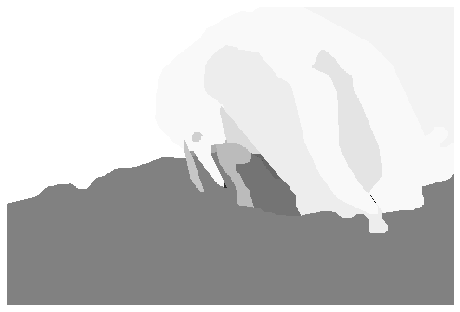

1.2433528861058154
averaagee of image 7= 14.402953229176301
for image8
for seg0


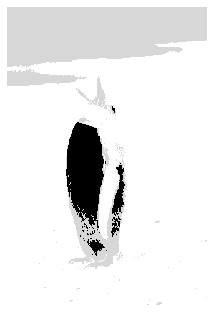

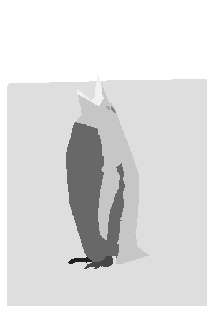

1.3820144375491985
for seg1


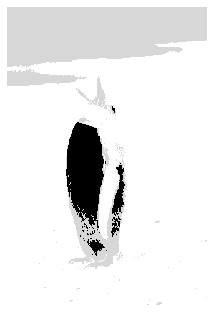

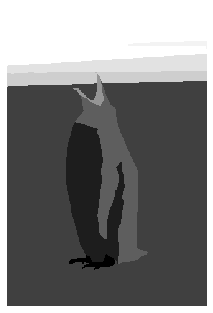

1.6926705359869882
for seg2


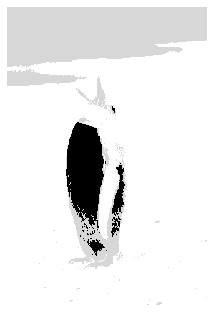

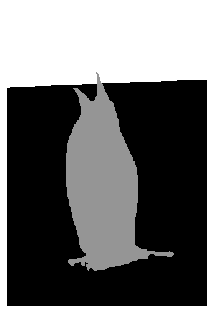

1.2600314105392785
for seg3


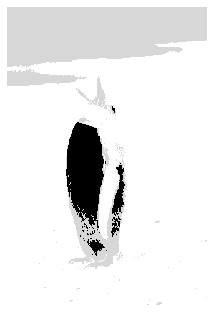

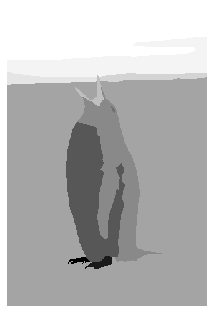

1.6355387871095335
for seg4


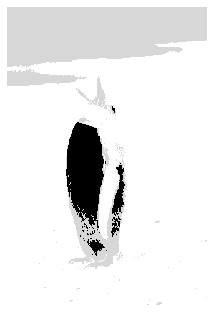

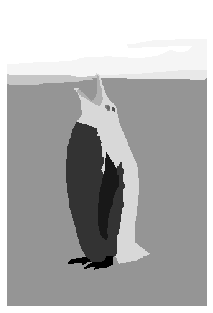

1.7080742260781998
for seg5


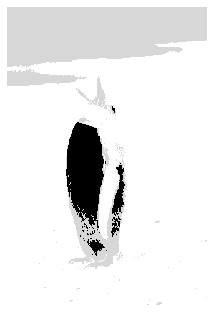

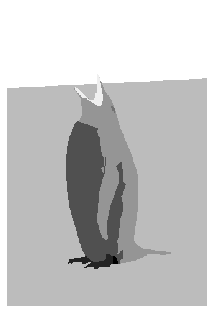

1.3915497486333925
averaagee of image 8= 13.514107548629687
for image9
for seg0


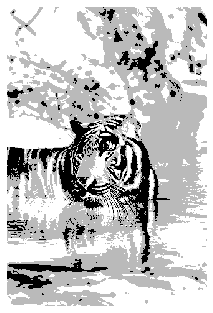

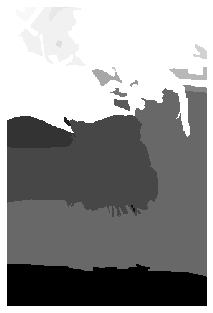

3.2383253030237085
for seg1


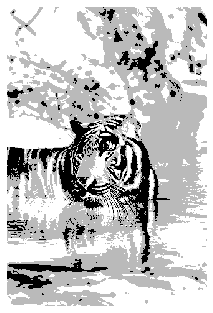

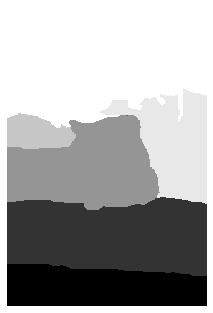

3.2497737204197863
for seg2


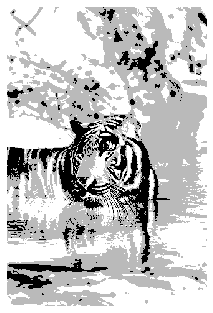

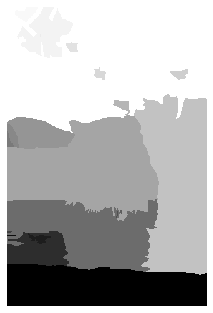

3.7244496749197524
for seg3


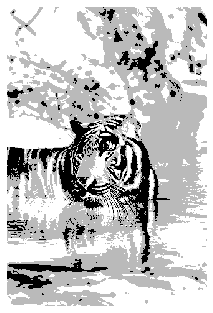

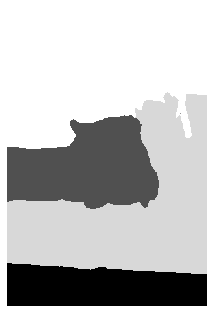

2.6273167749374418
for seg4


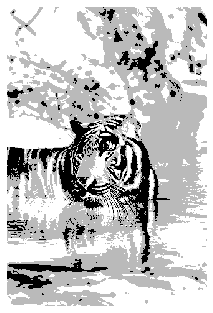

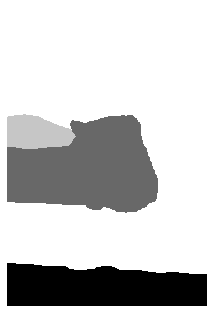

1.8587325345434
averaagee of image 9= 19.156648659924443
for image10
for seg0


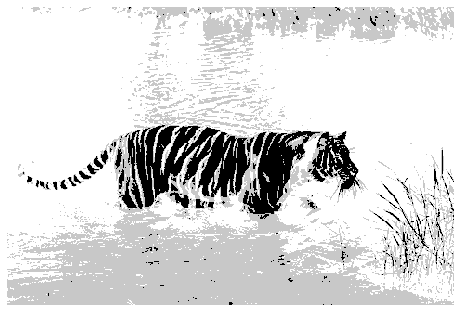

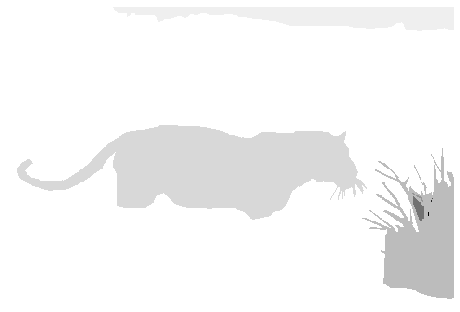

0.5442664020313145
for seg1


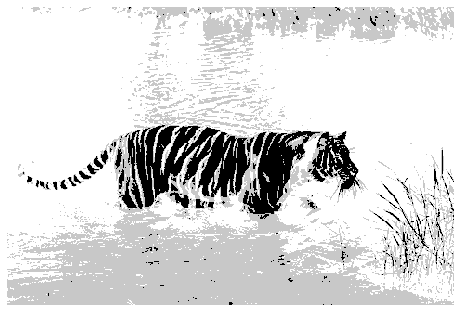

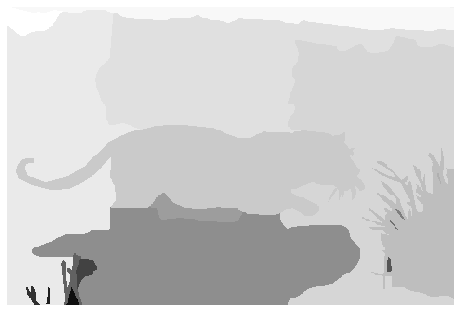

1.5597950196688255
for seg2


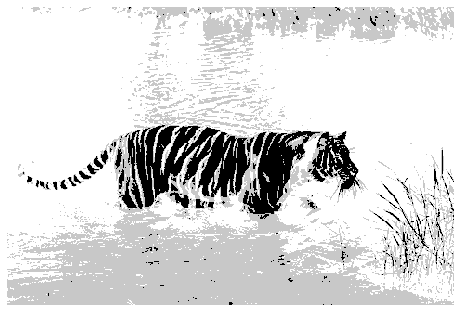

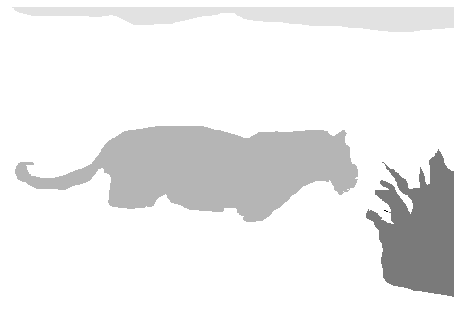

0.6265720490814617
for seg3


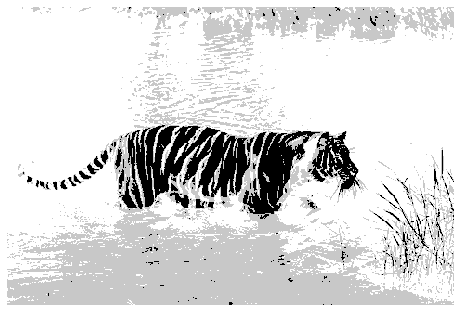

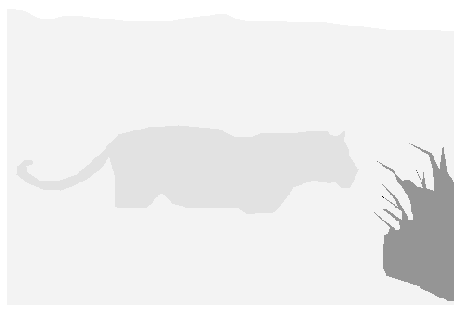

0.5732759092699824
for seg4


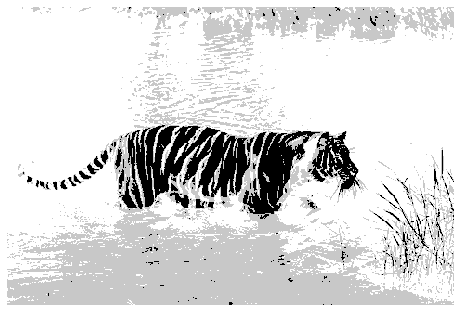

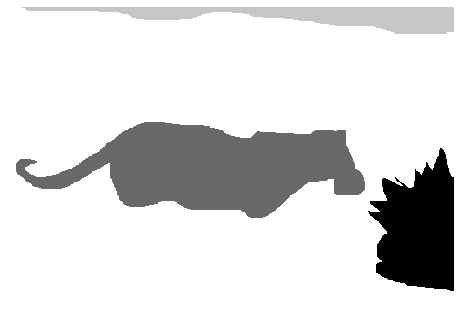

0.6055626752045125
averaagee of image 10= 19.938543070975662
for image11
for seg0


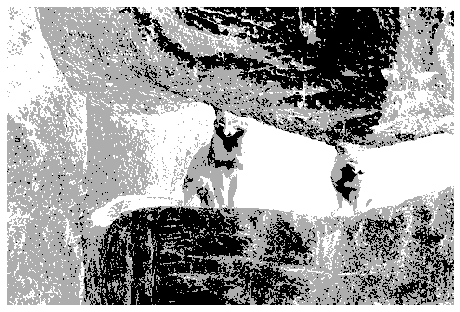

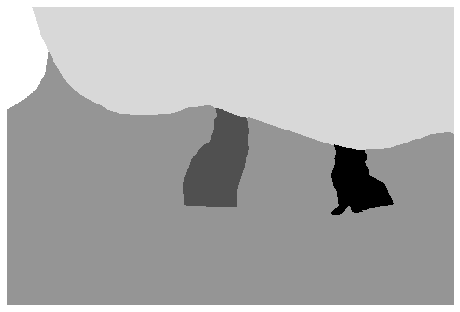

0.885667353479154
for seg1


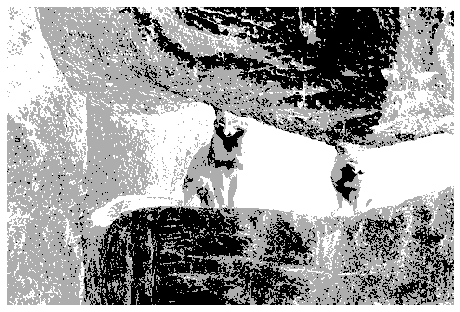

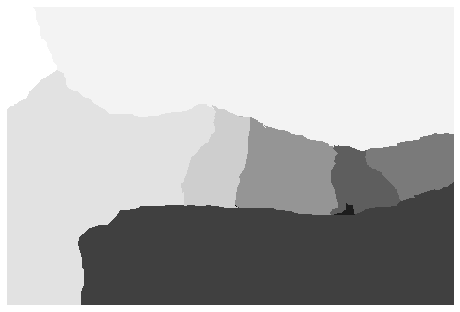

1.303515921508711
for seg2


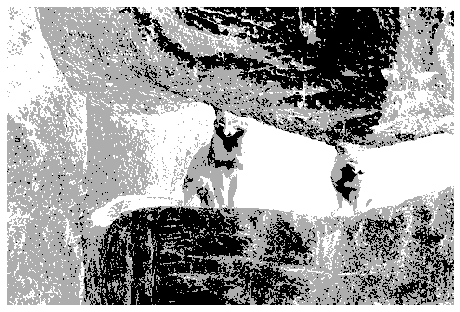

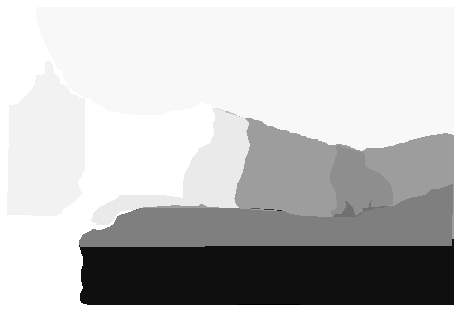

1.523307359091502
for seg3


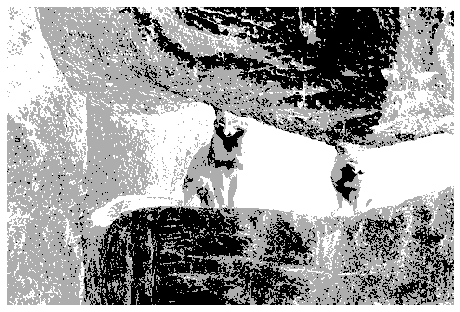

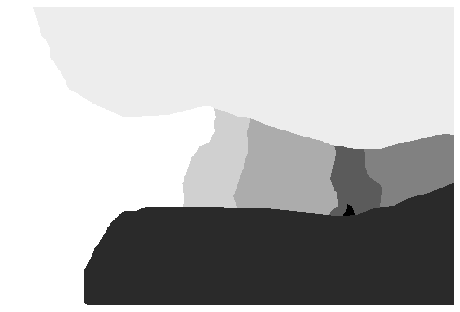

1.2352400548058342
for seg4


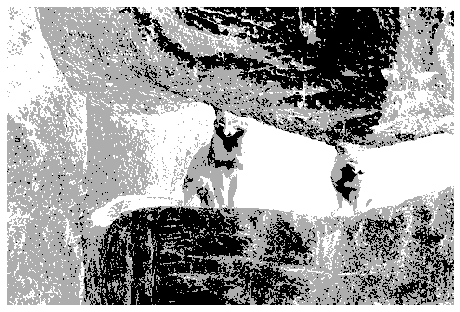

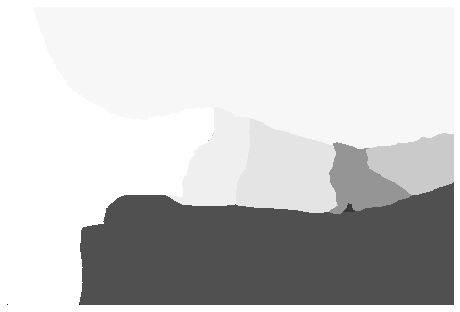

1.2535390350029245
averaagee of image 11= 21.178797015753283
for image12
for seg0


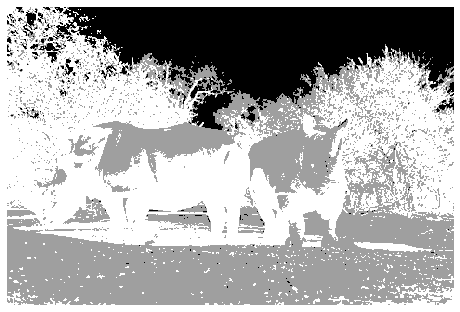

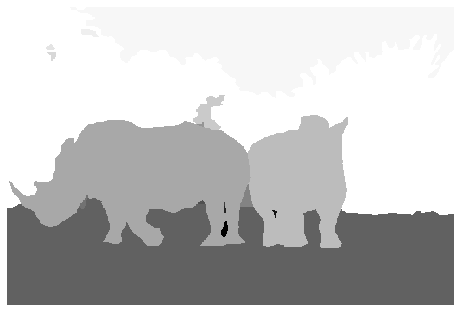

1.0190246976063115
for seg1


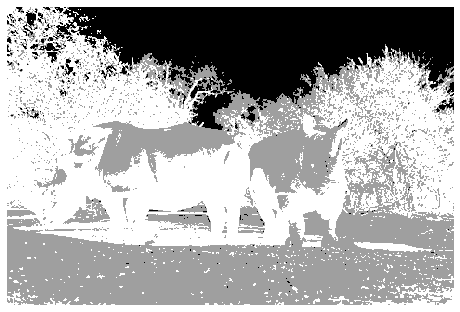

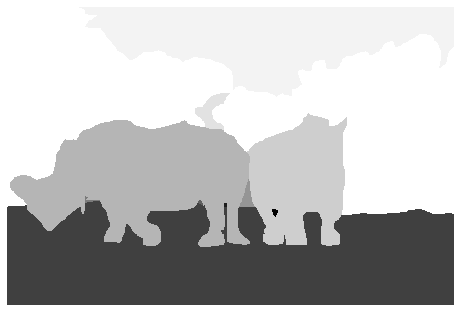

1.0147873149225572
for seg2


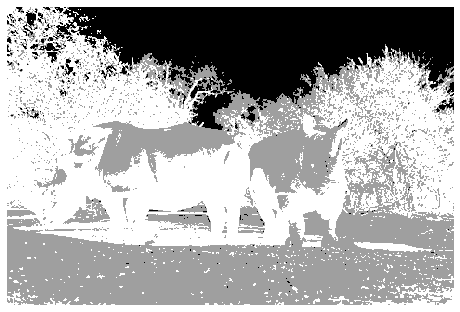

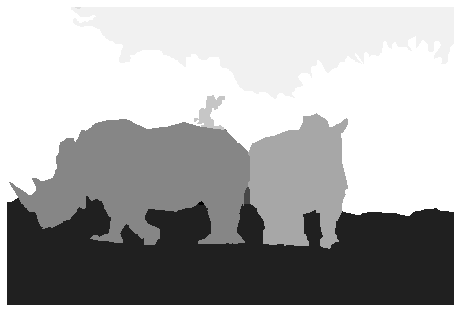

0.9988894303831782
for seg3


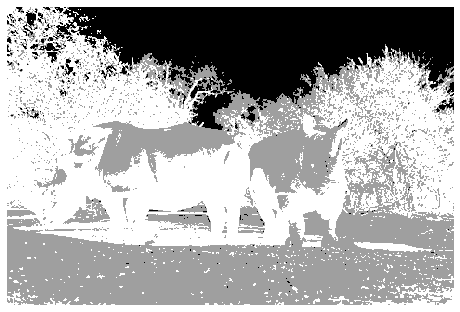

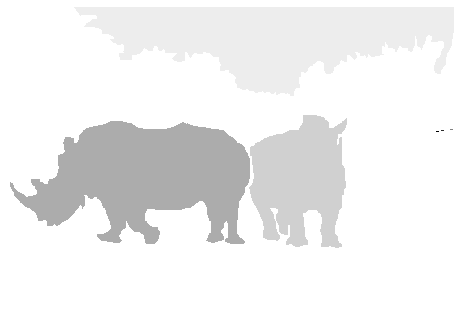

0.6639153966799707
for seg4


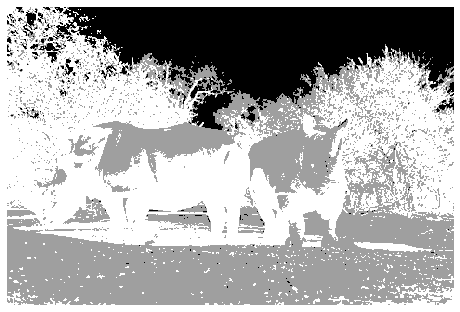

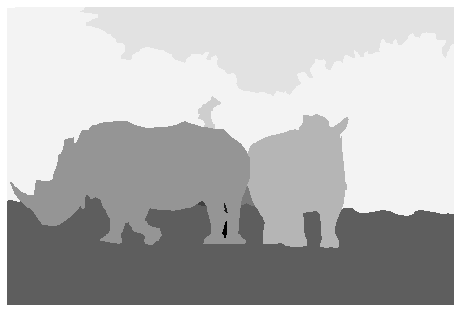

1.0099612590532412
averaagee of image 12= 22.120112635482336
for image13
for seg0


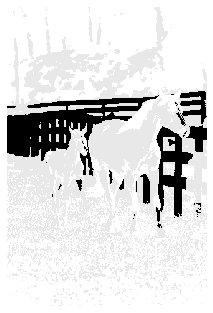

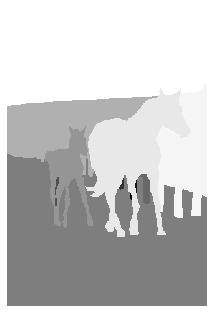

2.6634066734762
for seg1


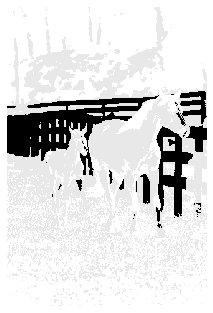

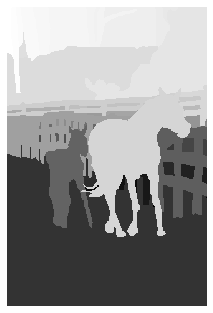

4.258564131490515
for seg2


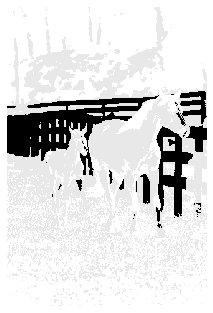

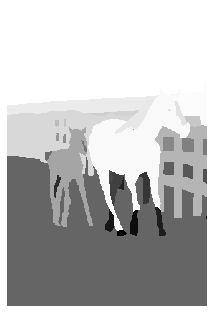

3.143992178598523
for seg3


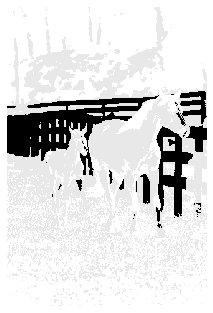

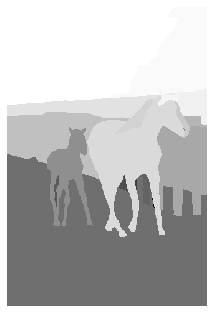

3.3287539738519376
for seg4


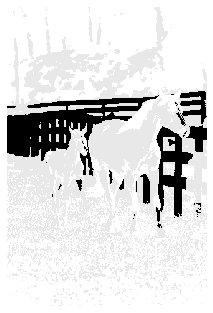

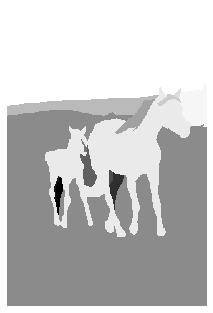

2.462756511398306
averaagee of image 13= 25.29160732924543
for image14
for seg0


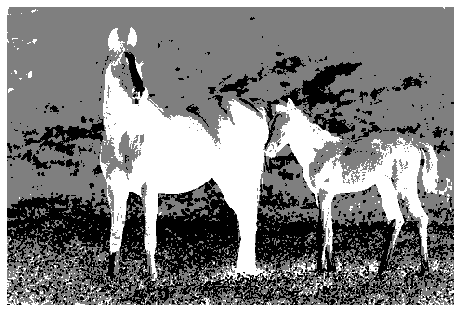

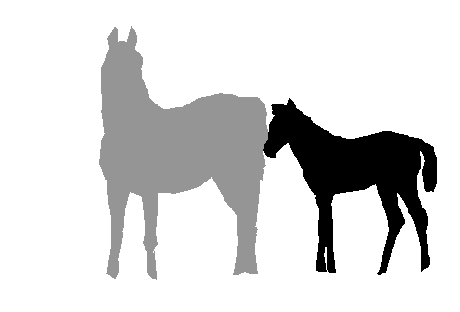

0.4606454436272351
for seg1


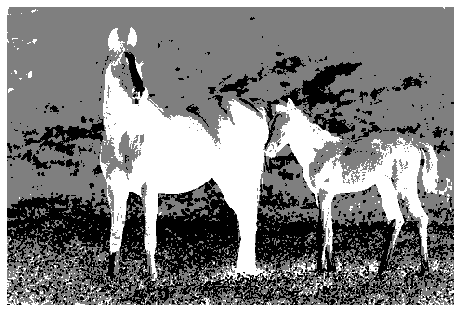

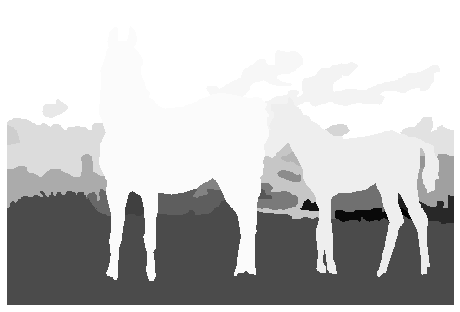

1.5115480846550629
for seg2


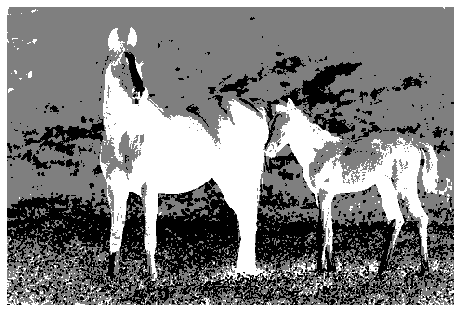

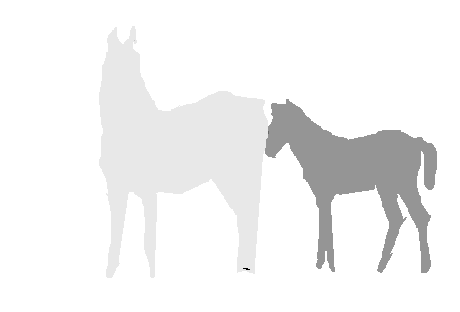

0.46685275033999385
for seg3


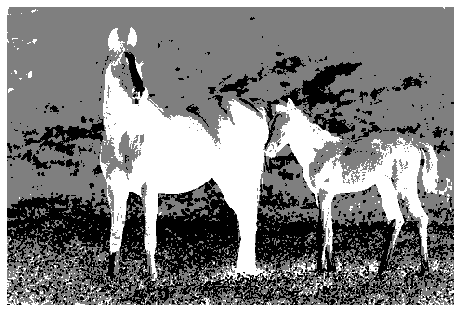

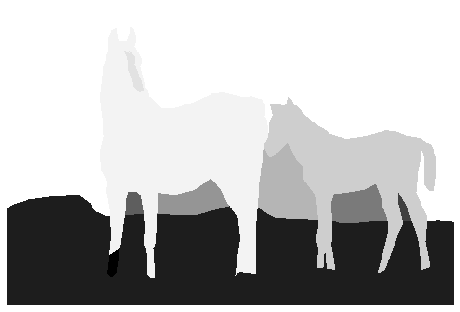

1.0768610542471526
for seg4


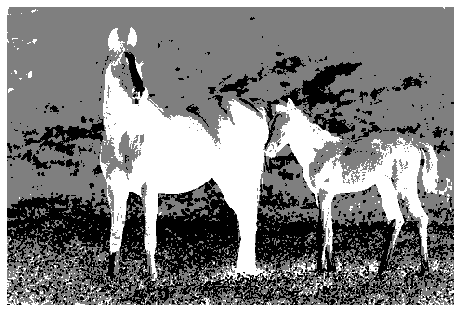

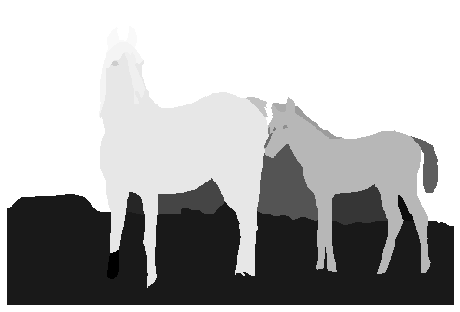

1.1455025158820848
for seg5


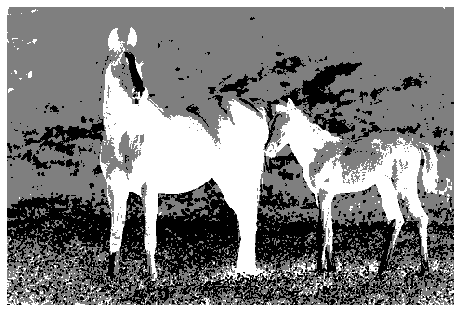

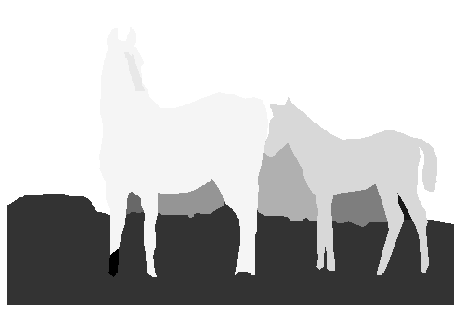

1.076267139762615
averaagee of image 14= 22.03261893912355
for image15
for seg0


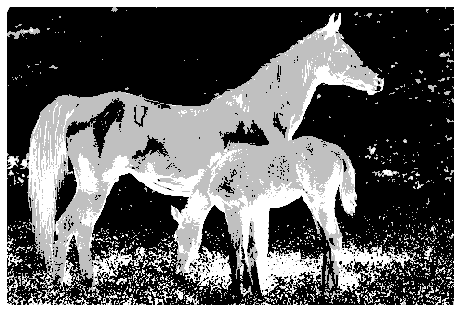

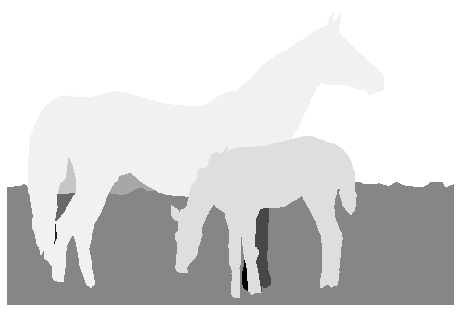

0.9953160650744086
for seg1


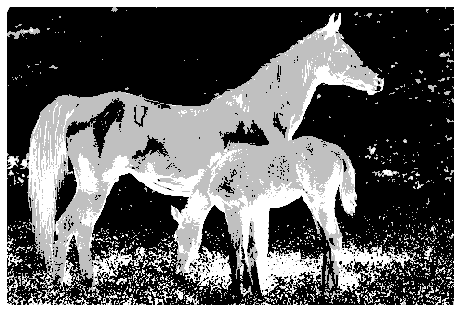

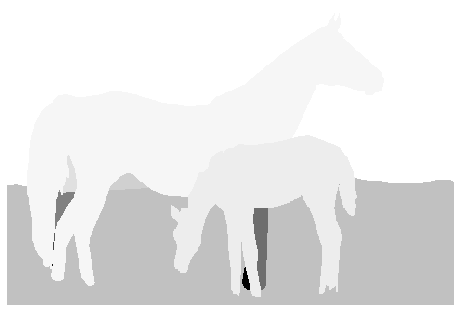

1.0004211833539083
for seg2


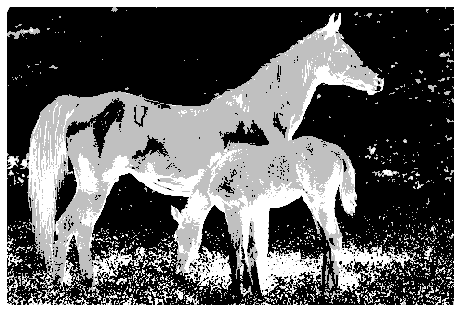

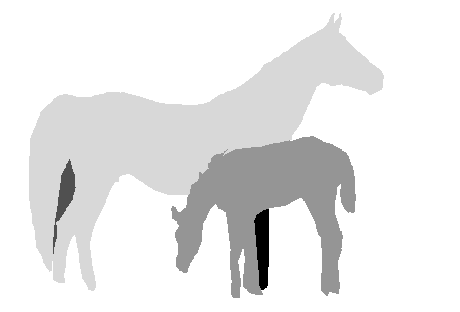

0.5959746785077386
for seg3


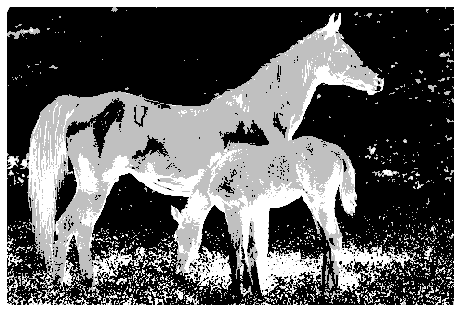

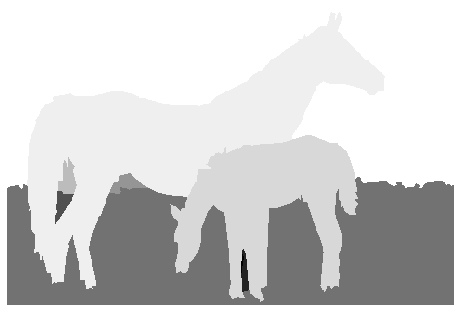

0.9889603512271248
for seg4


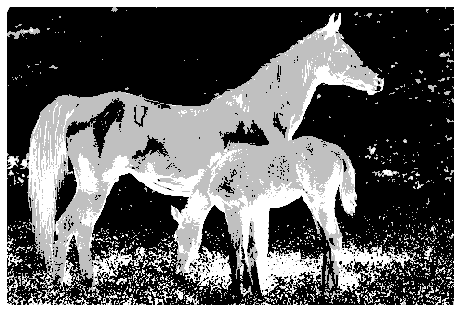

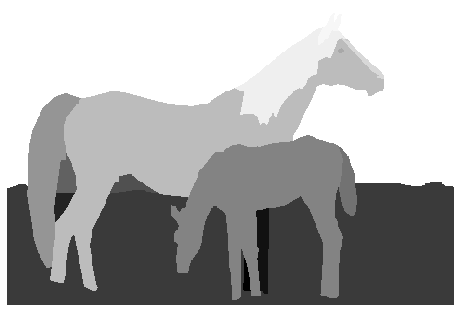

1.218203367486896
for seg5


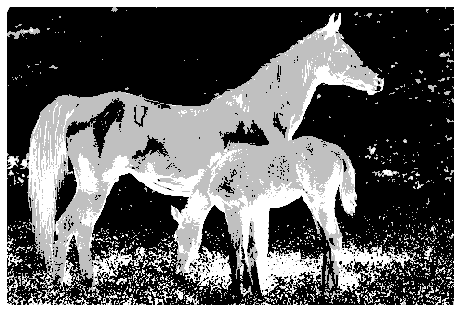

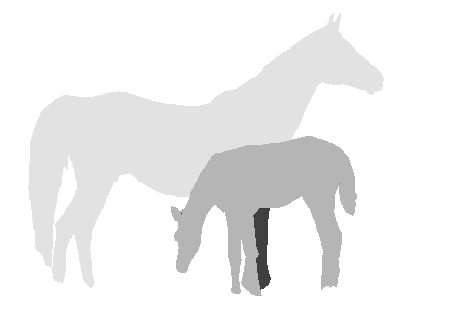

0.5598274220718731
averaagee of image 15= 22.925736117077207
for image16
for seg0


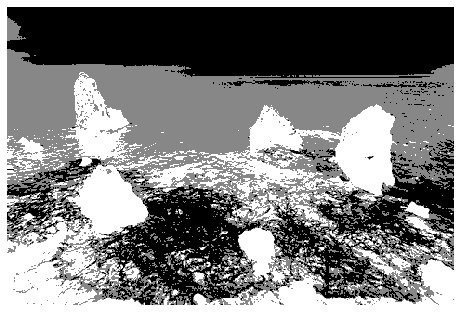

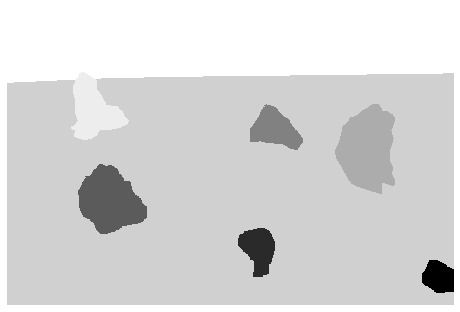

0.6608413480898883
for seg1


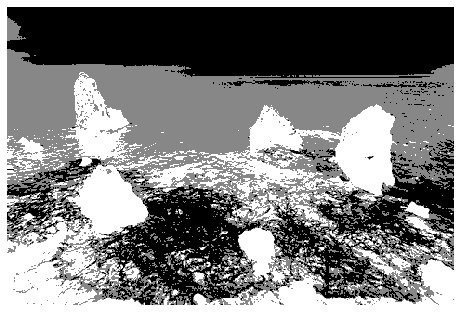

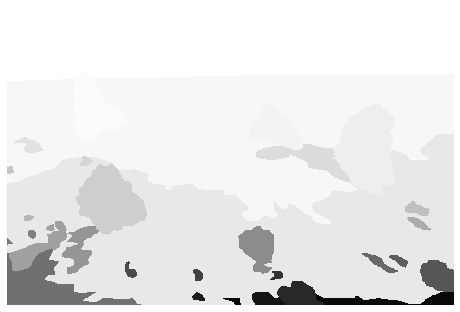

1.29470254949099
for seg2


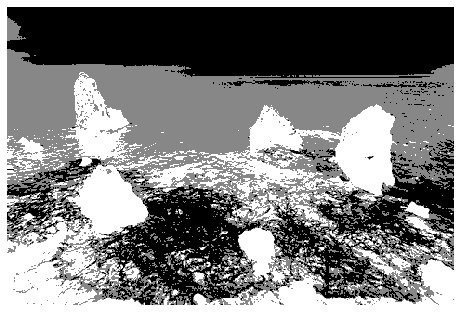

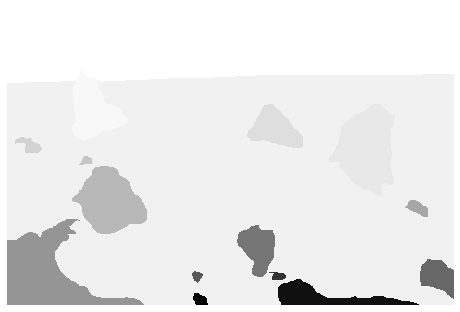

0.872273325204177
for seg3


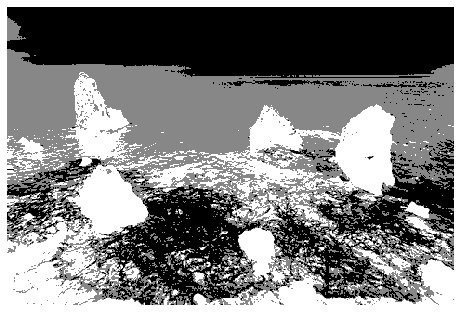

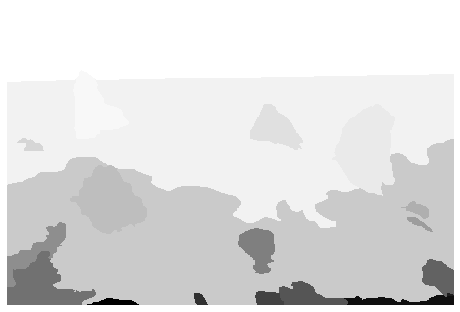

1.1890936570883395
for seg4


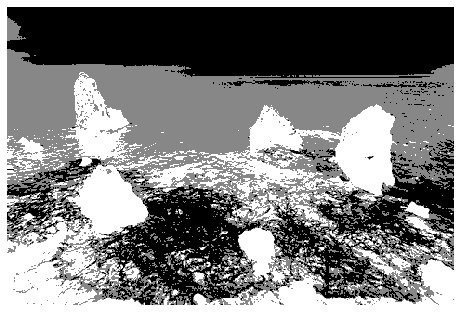

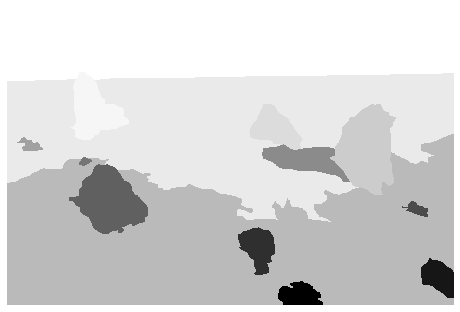

1.1152607218299986
for seg5


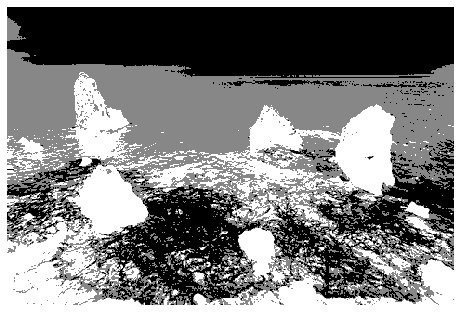

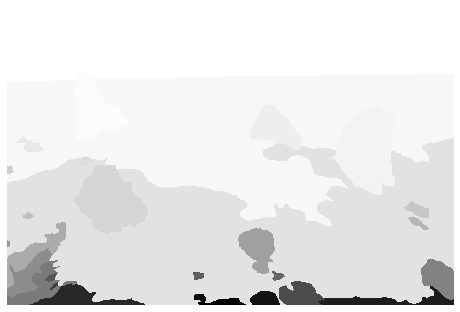

1.2271732963143913
averaagee of image 16= 23.985626933413503
for image17
for seg0


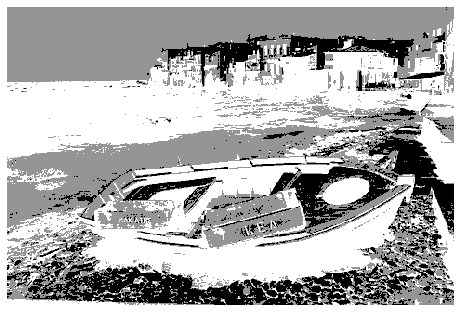

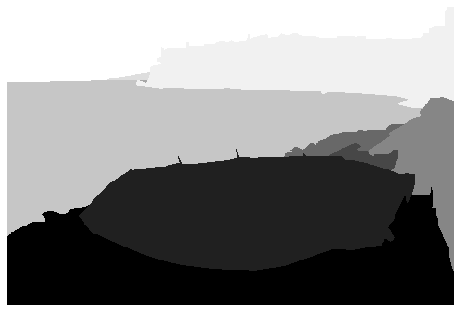

1.5133773380891038
for seg1


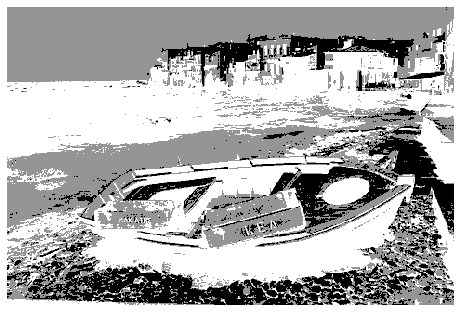

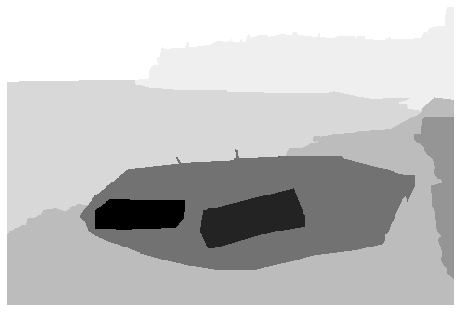

1.5271734738112608
for seg2


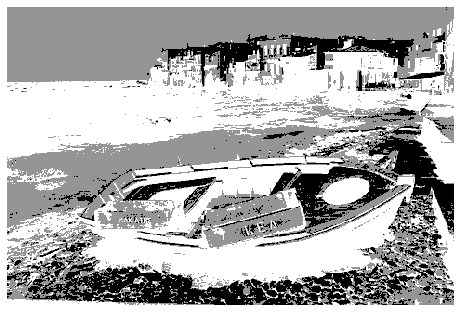

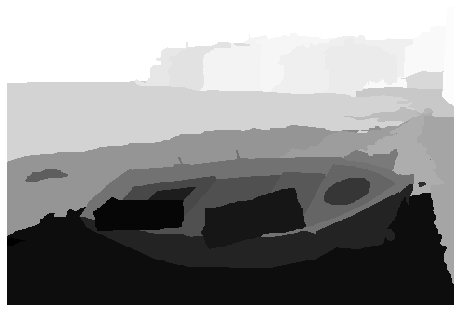

2.2424954433293744
for seg3


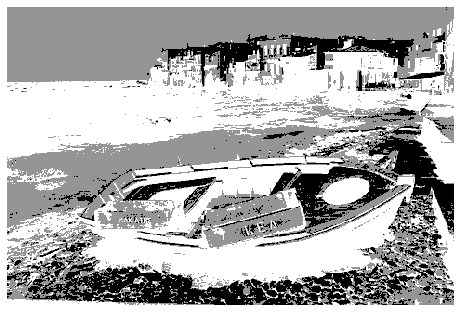

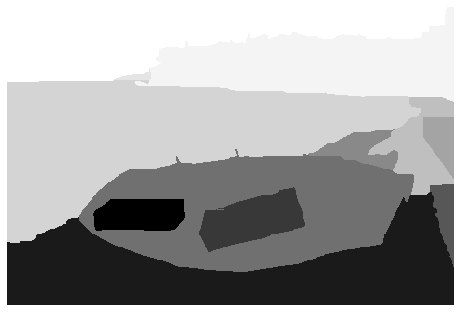

1.6531644930428877
for seg4


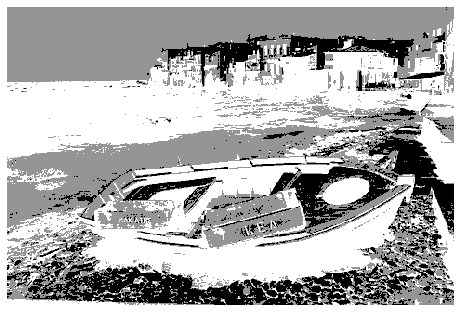

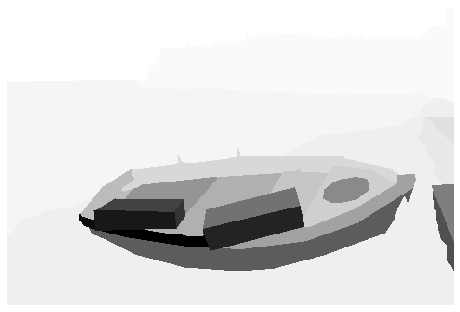

1.862359497258798
for seg5


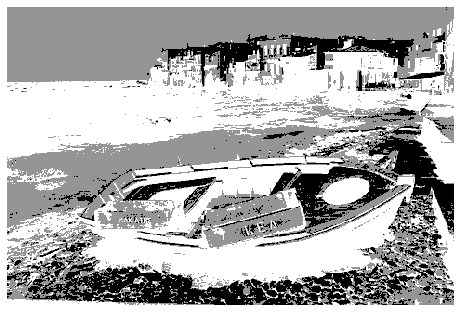

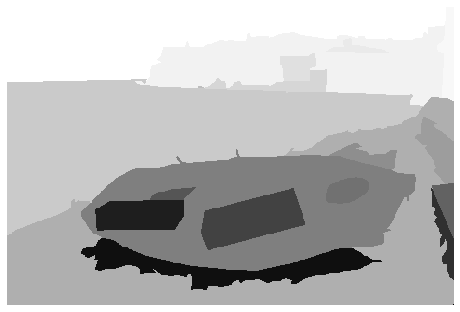

1.7332750748303563
averaagee of image 17= 25.740934486807134
for image18
for seg0


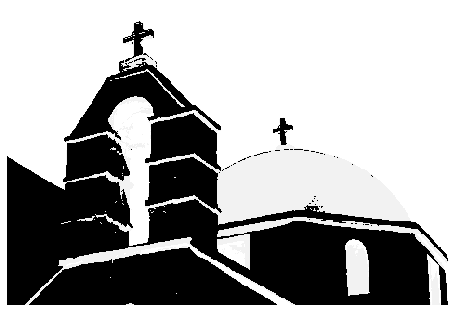

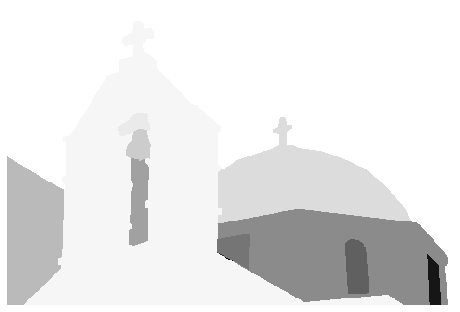

0.7001087085810095
for seg1


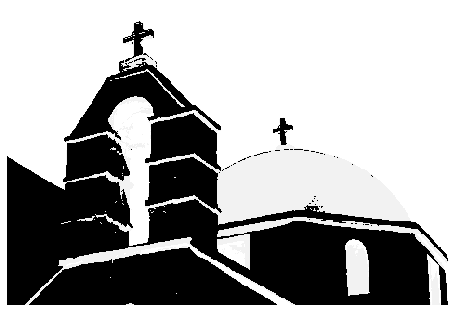

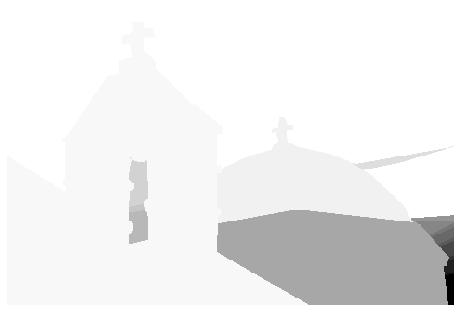

0.6225829661434324
for seg2


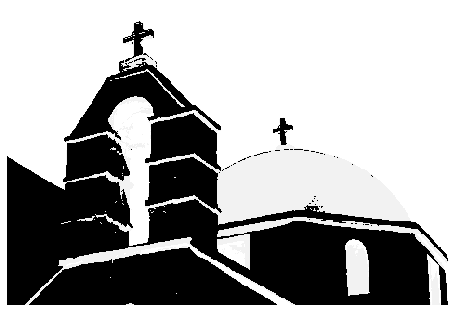

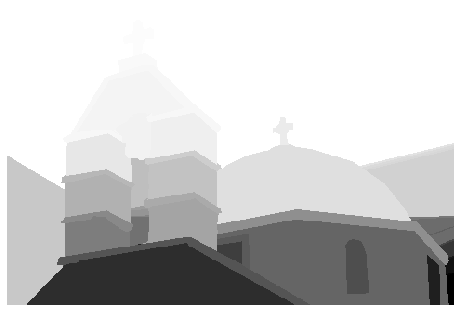

1.522694953105153
for seg3


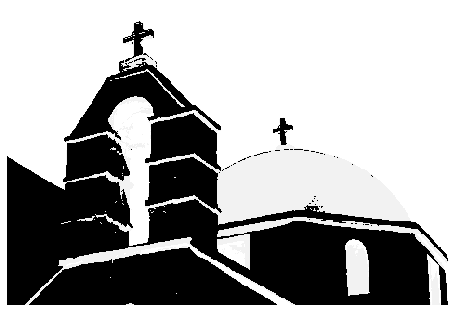

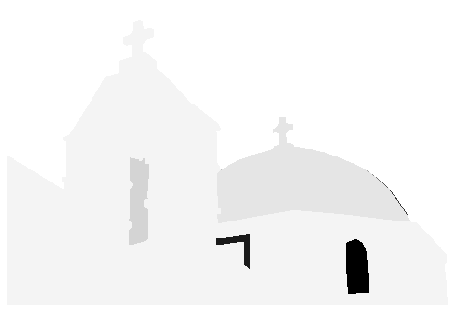

0.3027284402712347
for seg4


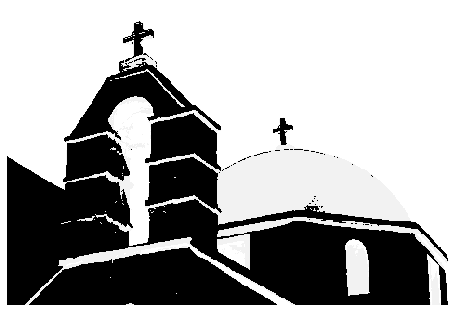

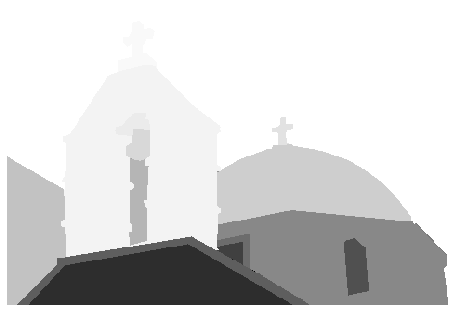

0.9404670898295465
averaagee of image 18= 31.706837815754636
for image19
for seg0


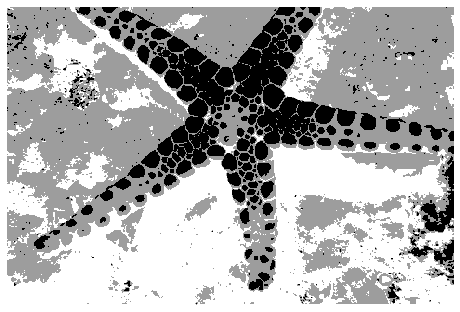

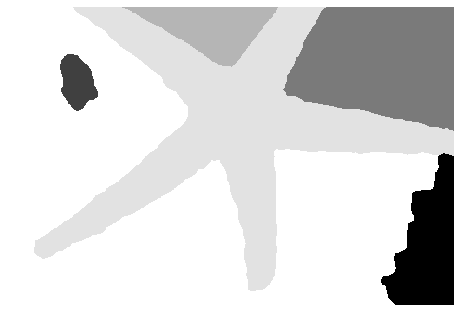

0.9524121597091618
for seg1


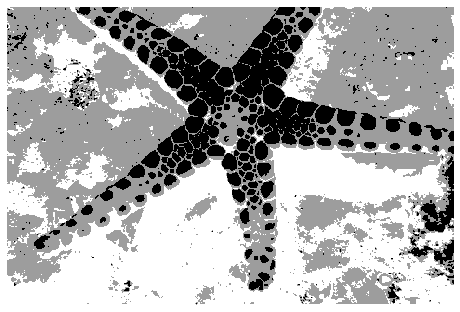

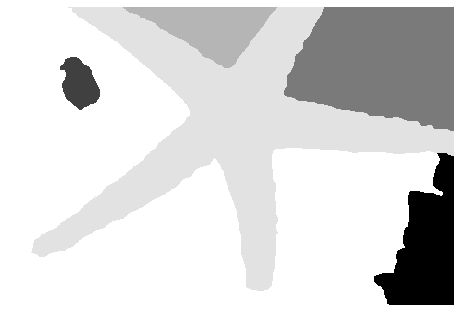

0.9549472741074889
for seg2


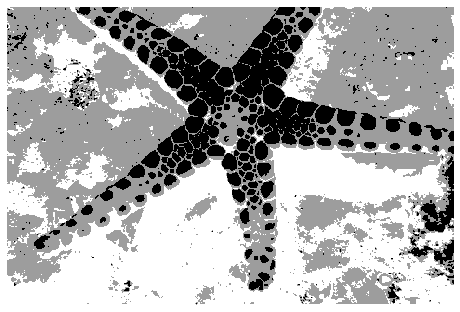

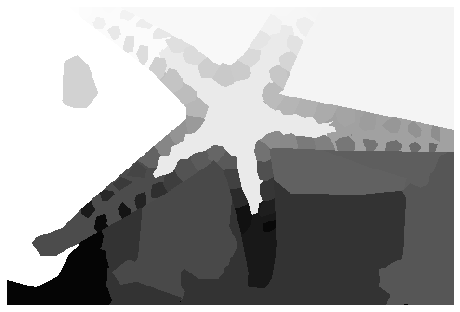

2.382804108016879
for seg3


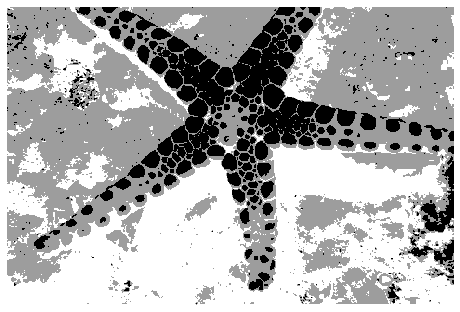

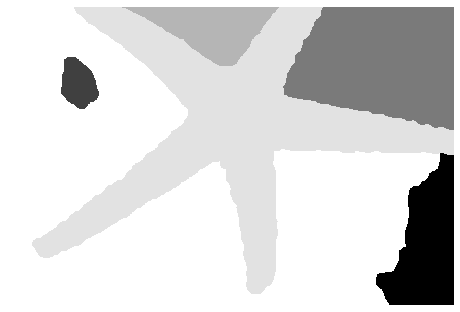

0.9667529841528238
for seg4


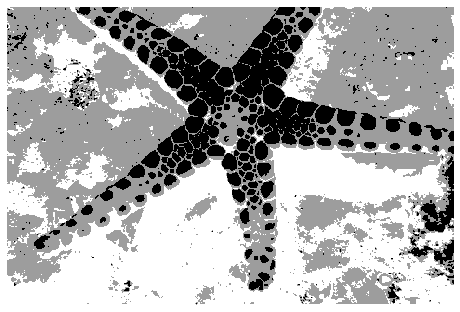

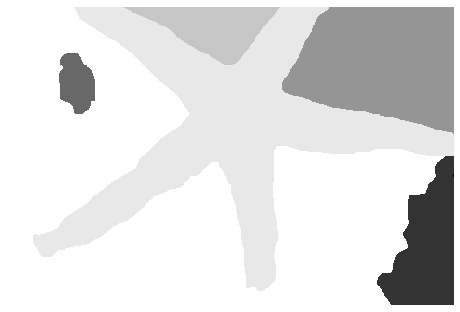

0.9742576590322599
averaagee of image 19= 32.95307265275836
for image20
for seg0


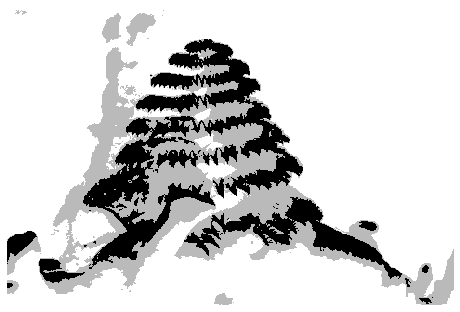

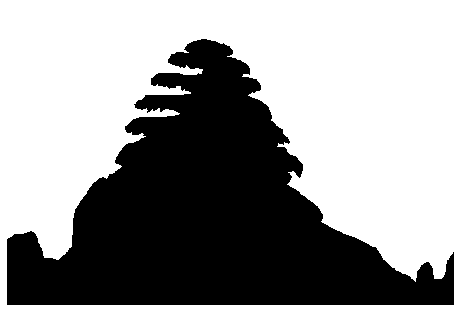

0.44991904023902896
for seg1


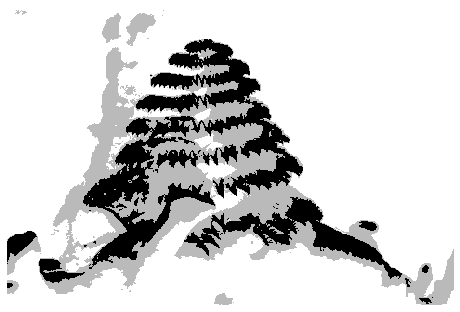

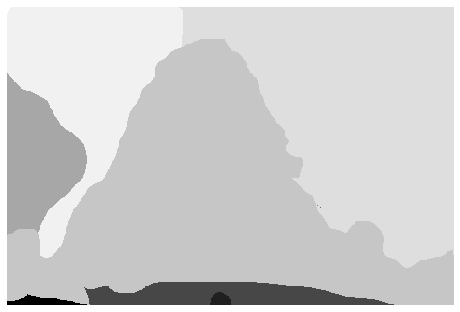

1.0011547247595542
for seg2


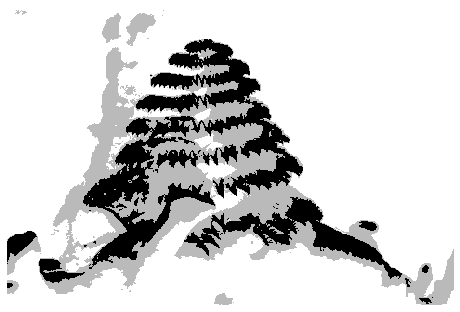

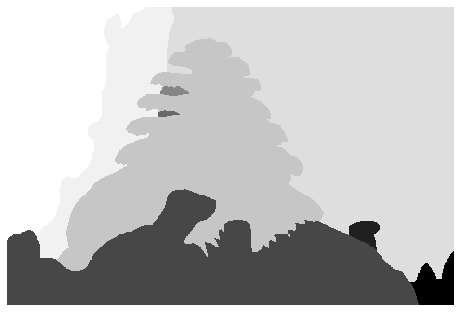

1.1706182416214341
for seg3


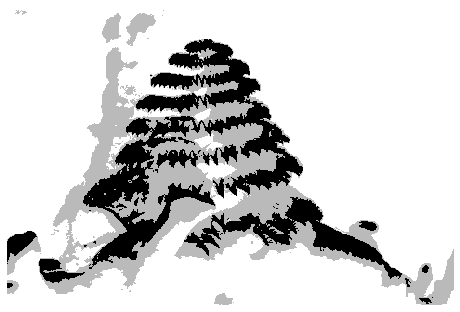

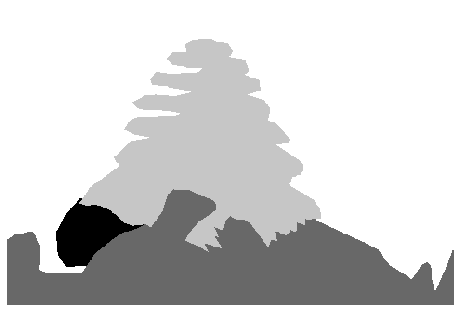

0.74201014279927
for seg4


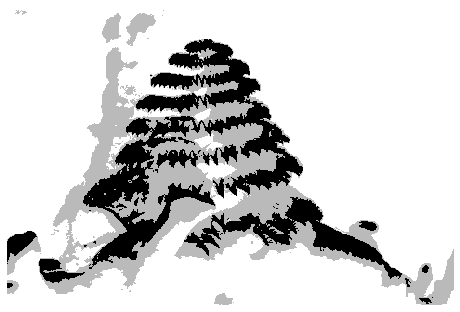

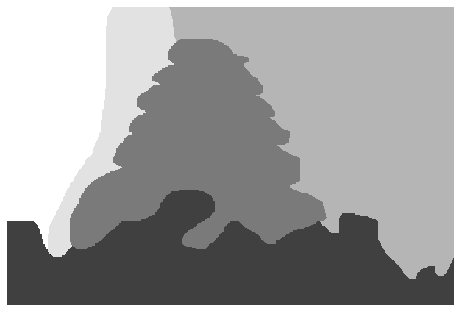

1.1296114142756966
averaagee of image 20= 33.851735365497355
for image21
for seg0


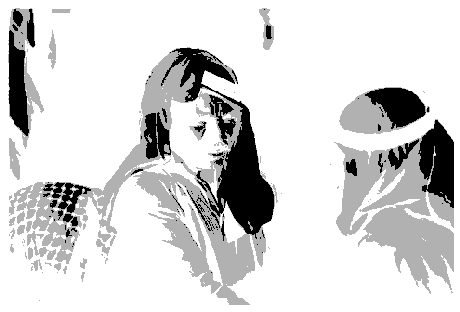

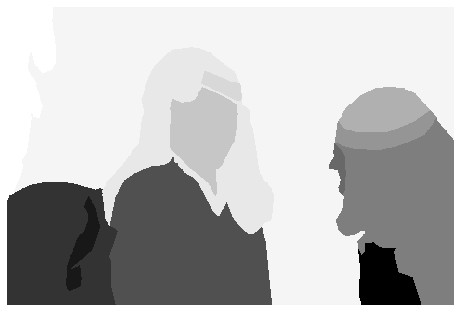

1.4246112049987907
for seg1


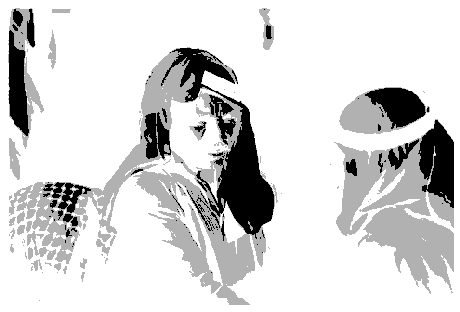

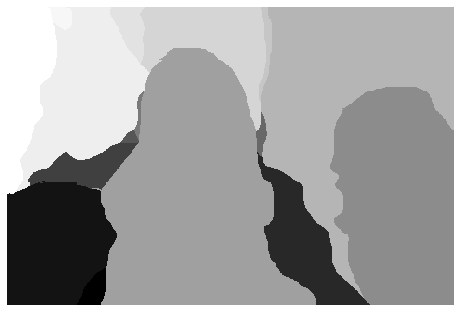

1.7654888298004139
for seg2


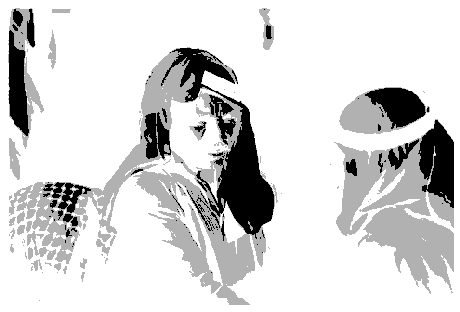

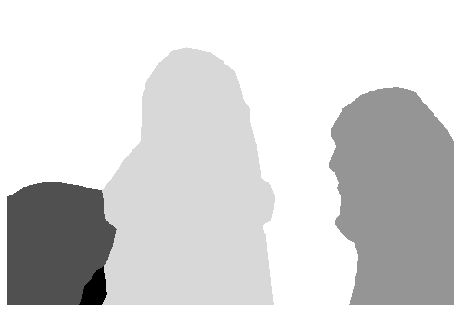

1.028437865244221
for seg3


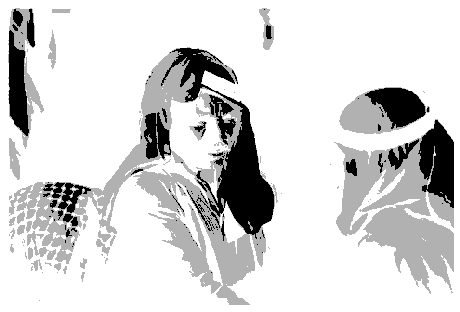

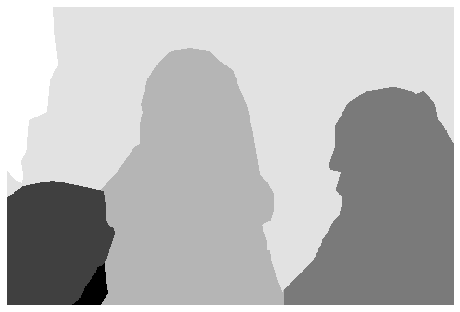

1.1763991537395933
for seg4


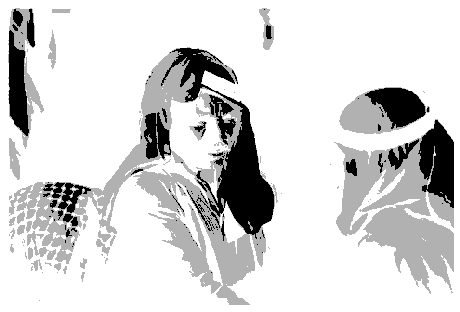

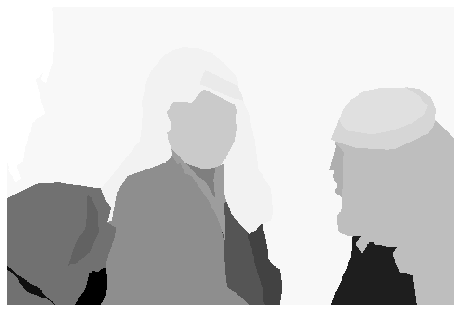

1.602292590195767
averaagee of image 21= 35.25118129429311
for image22
for seg0


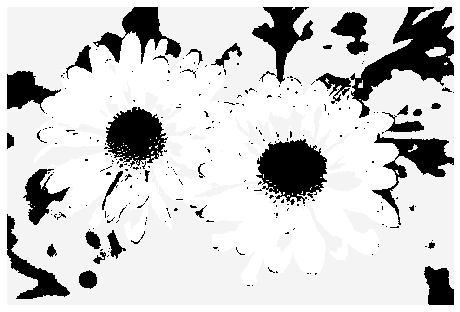

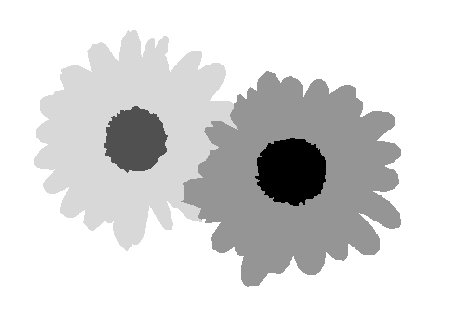

0.6696077331350869
for seg1


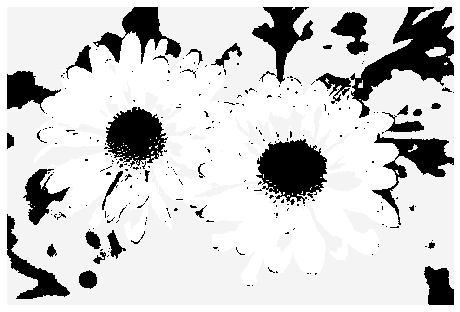

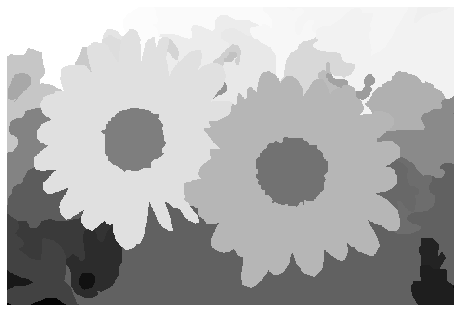

2.0559820532144863
for seg2


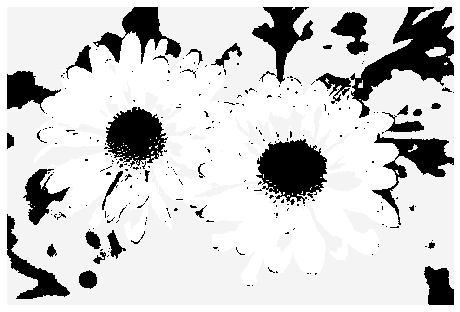

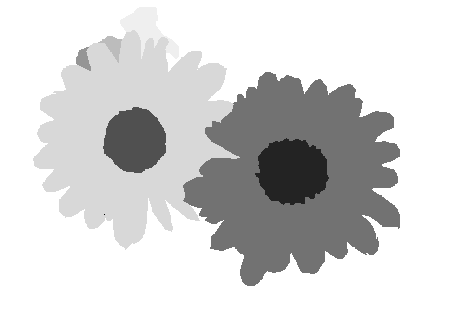

0.7267000163300197
for seg3


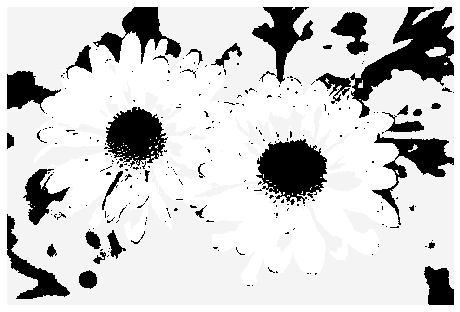

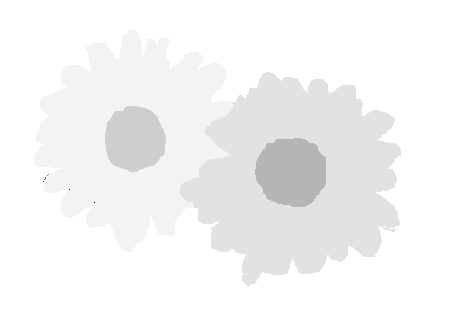

0.6929129753021264
for seg4


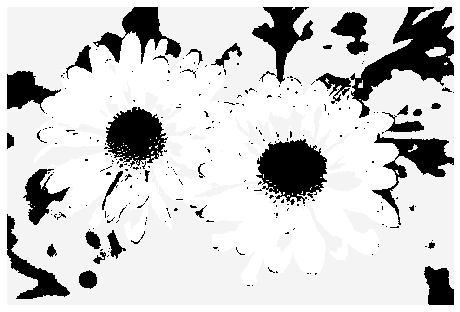

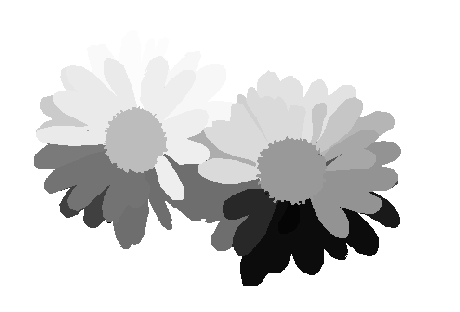

1.422455948287428
averaagee of image 22= 36.36471303954694
for image23
for seg0


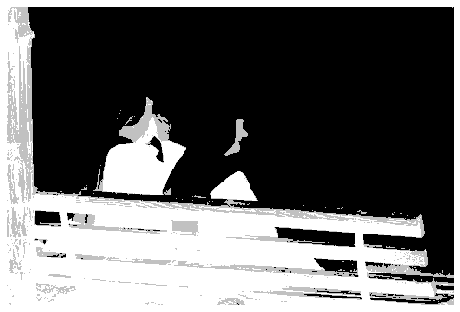

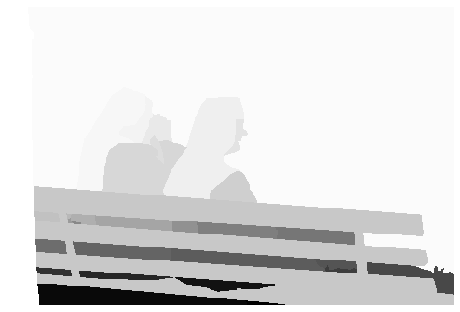

1.0732498686932048
for seg1


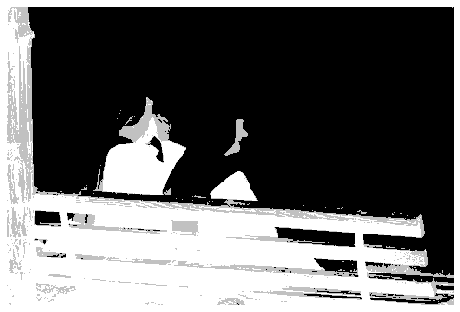

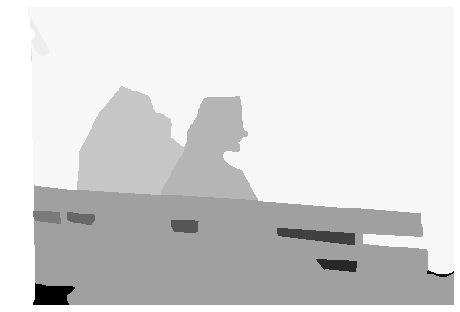

0.7746949126646228
for seg2


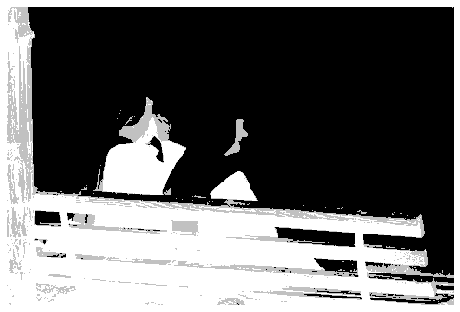

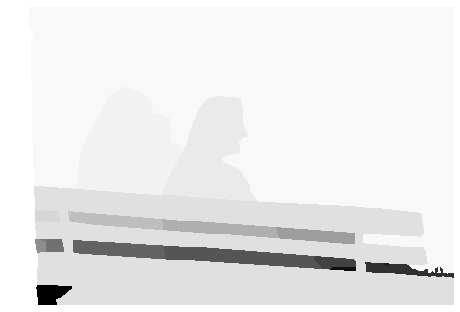

0.9406549954968257
for seg3


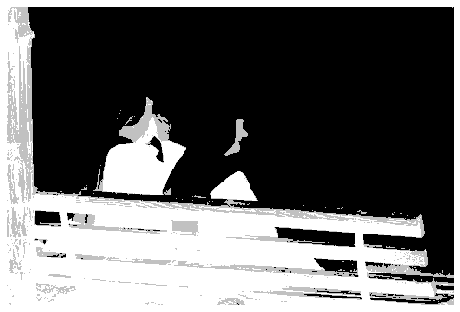

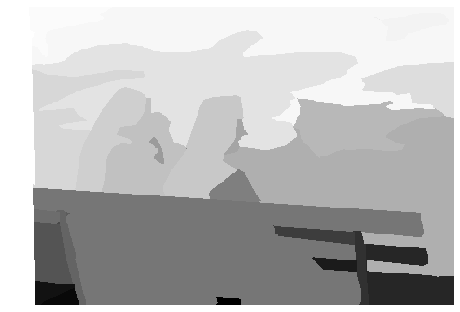

1.856414279016736
for seg4


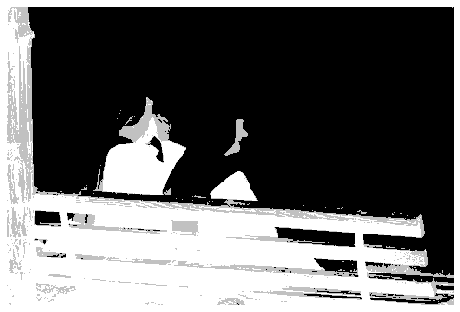

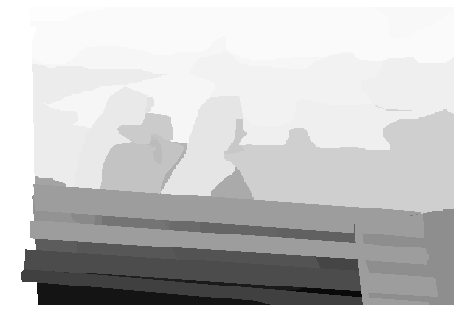

2.224896214855029
averaagee of image 23= 37.73869509369222
for image24
for seg0


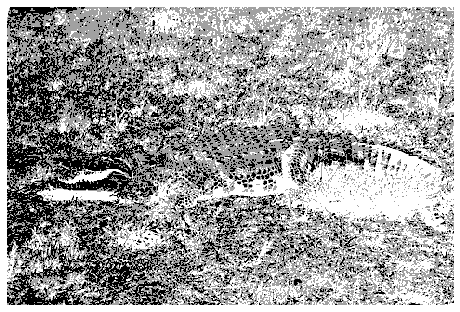

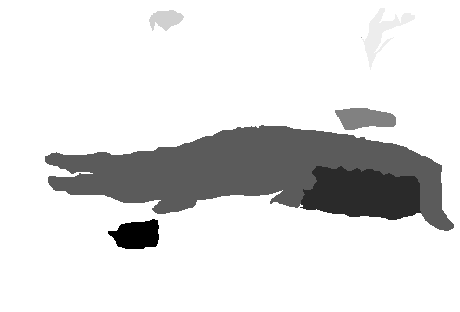

0.6598861592396857
for seg1


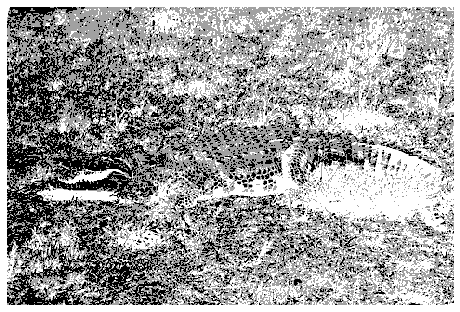

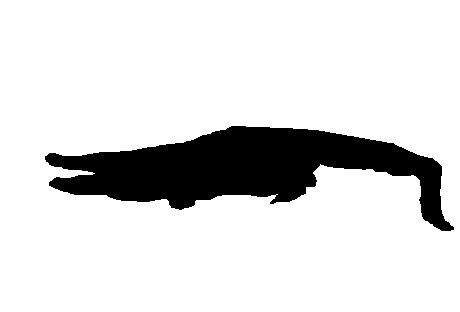

0.40265899248802806
for seg2


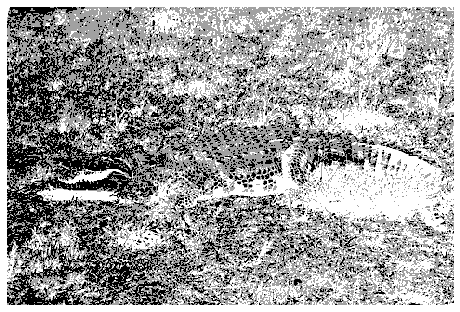

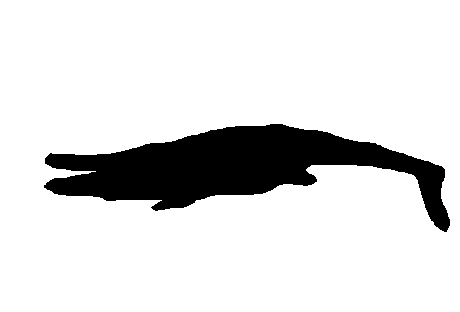

0.39289425254828064
for seg3


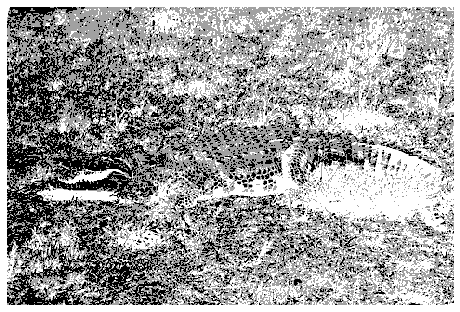

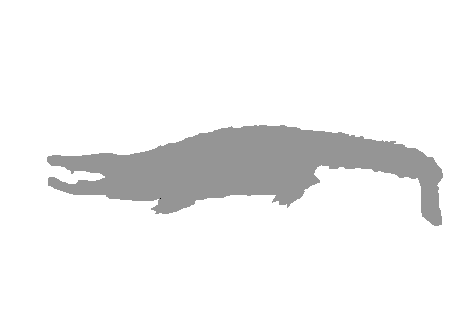

0.4026223725479632
for seg4


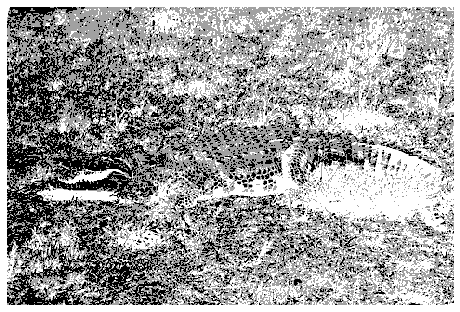

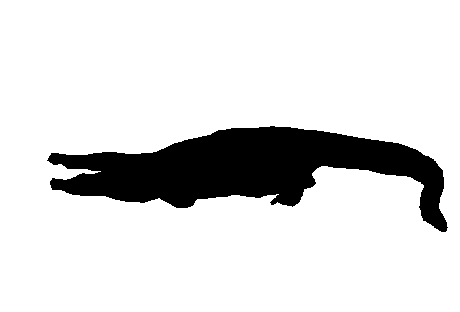

0.40270616123526437
averaagee of image 24= 38.19084868130407
for image25
for seg0


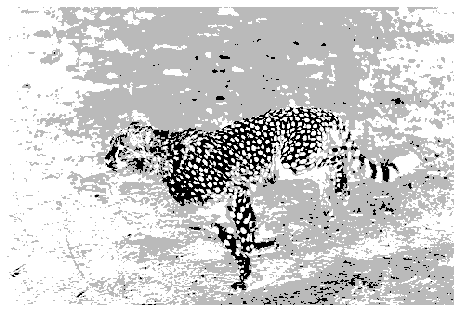

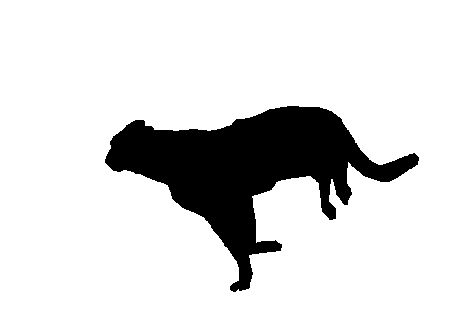

0.3358838953413372
for seg1


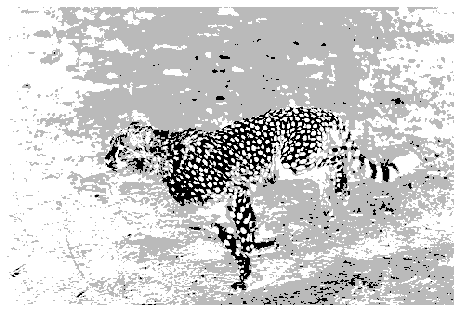

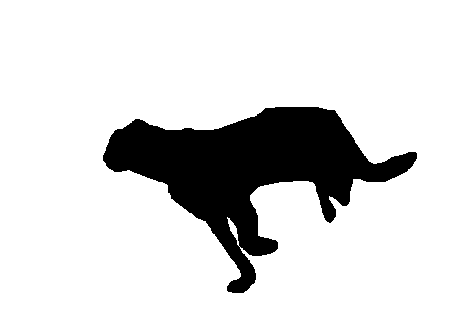

0.35020324739252784
for seg2


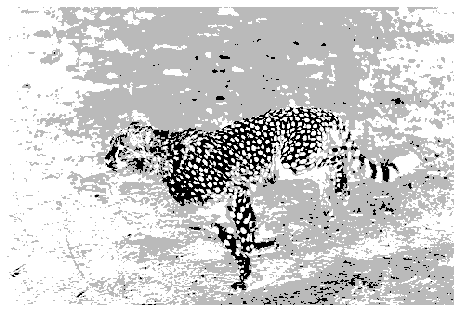

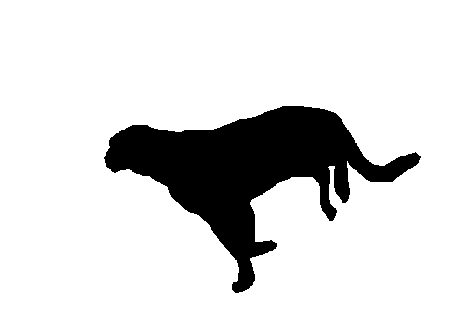

0.336791234745184
for seg3


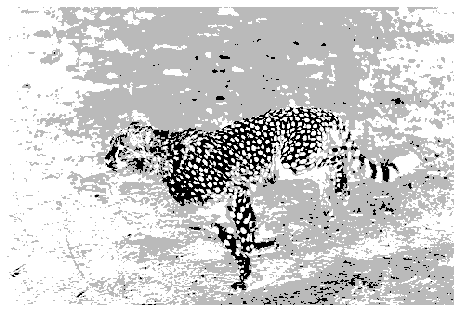

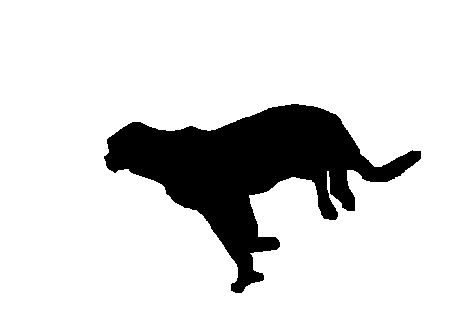

0.3480913653801056
for seg4


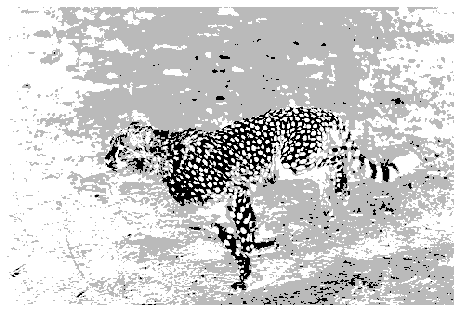

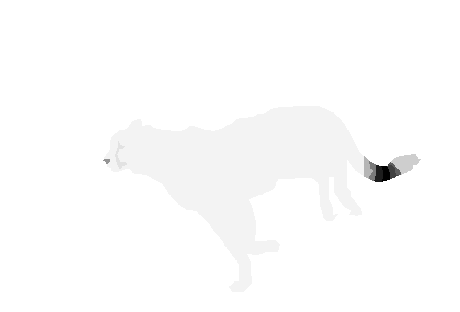

0.3788260865427141
averaagee of image 25= 38.54080784718444
for image26
for seg0


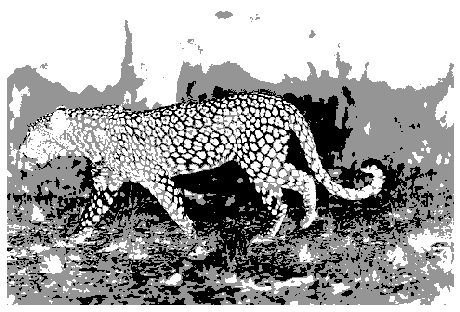

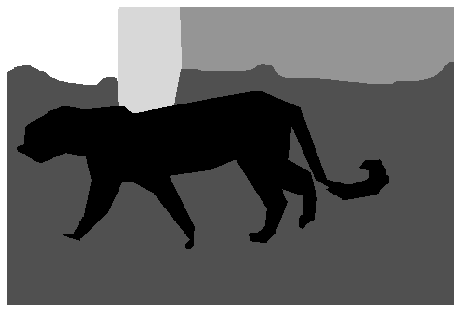

0.9027050881164338
for seg1


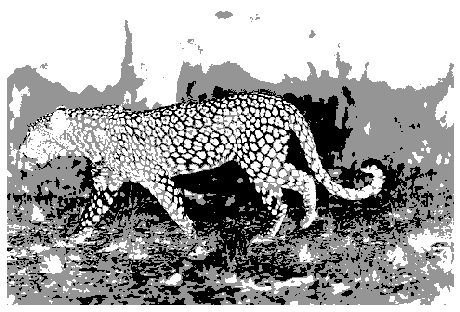

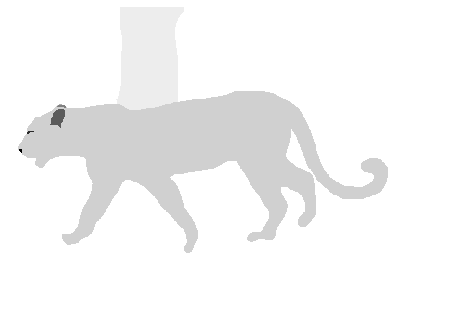

0.6195360662696996
for seg2


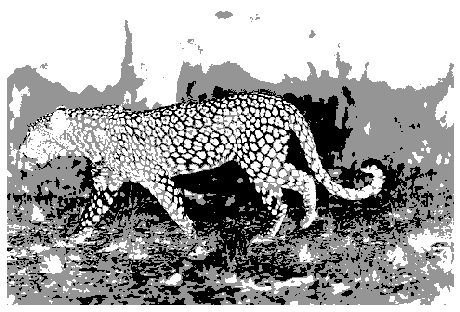

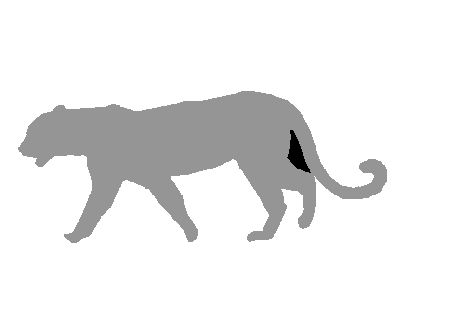

0.4817661088064348
for seg3


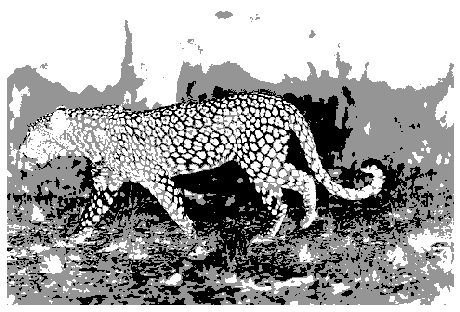

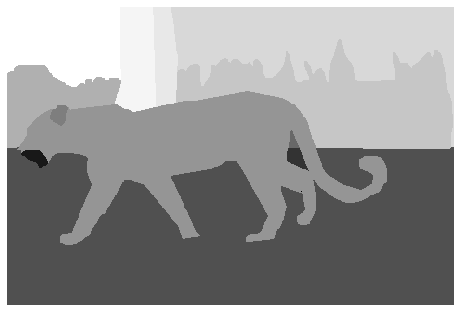

1.3313619030935306
for seg4


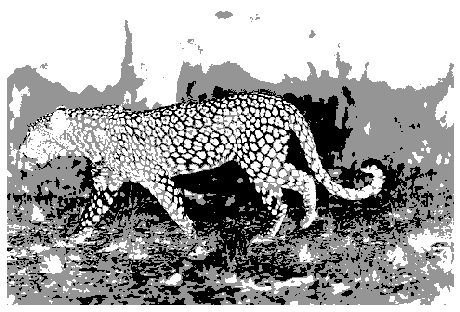

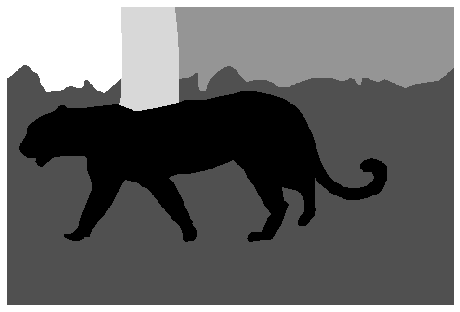

0.9215586137495112
averaagee of image 26= 39.392193403191555
for image27
for seg0


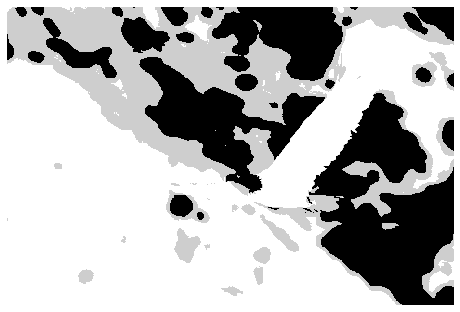

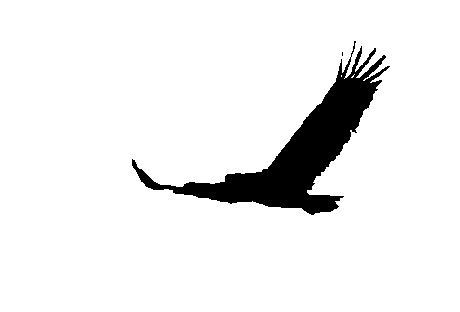

0.23221503061804416
for seg1


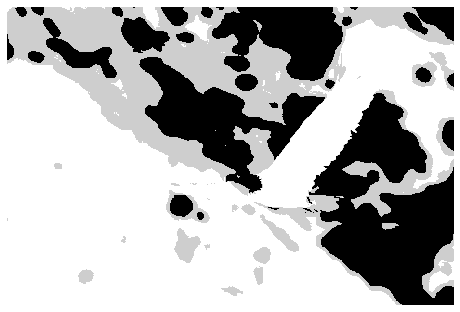

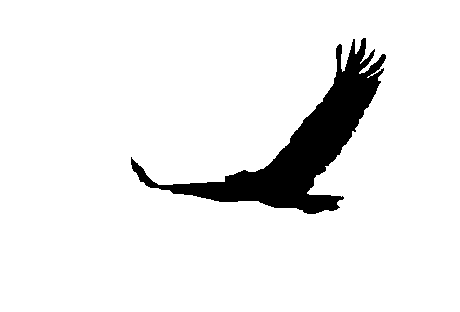

0.24335009036566035
for seg2


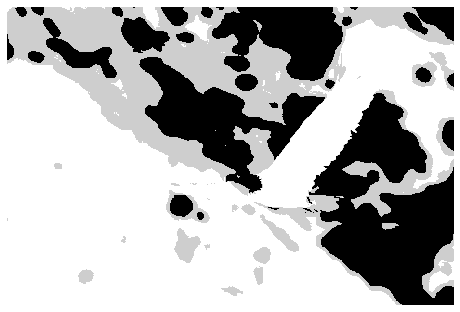

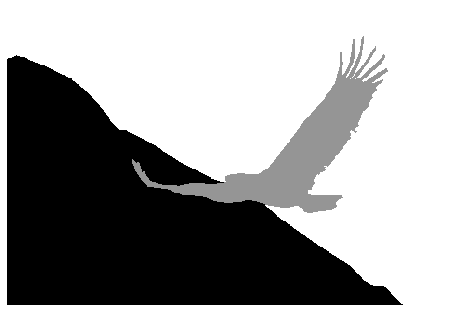

0.5020273624601376
for seg3


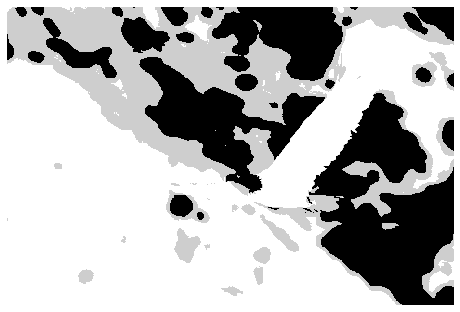

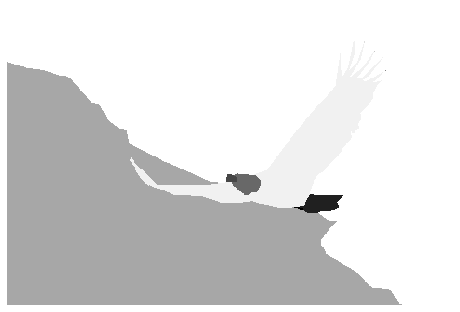

0.5263832952602613
for seg4


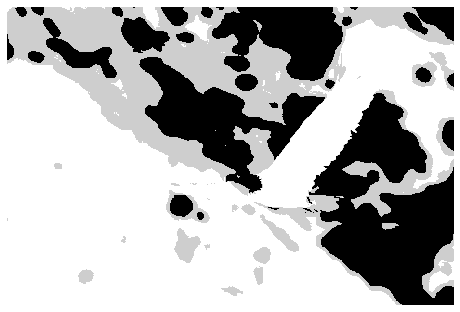

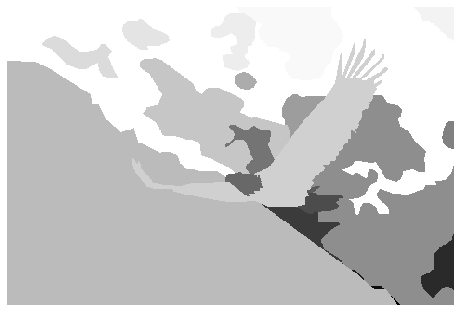

1.1284182540429777
averaagee of image 27= 39.91867220974097
for image28
for seg0


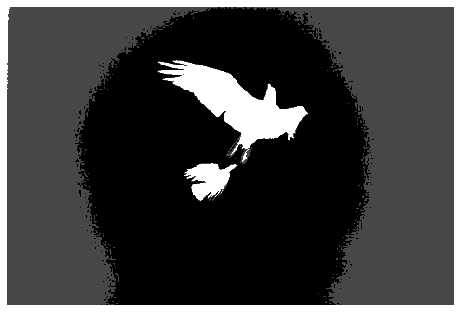

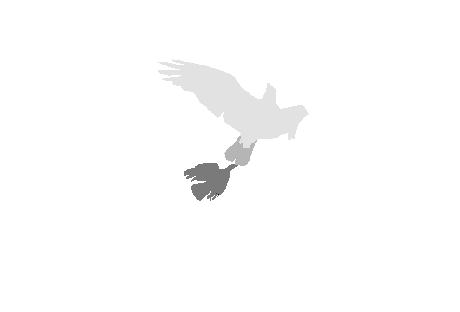

0.06744785537954337
for seg1


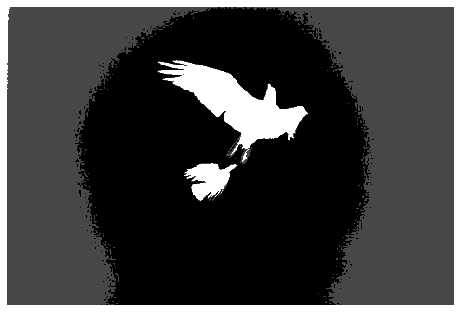

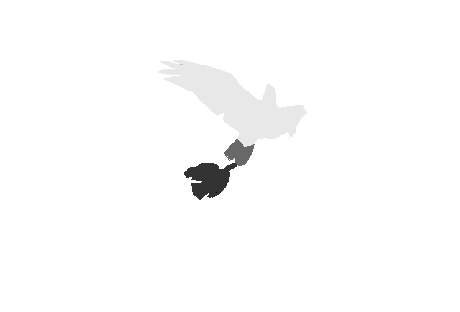

0.07165170363597911
for seg2


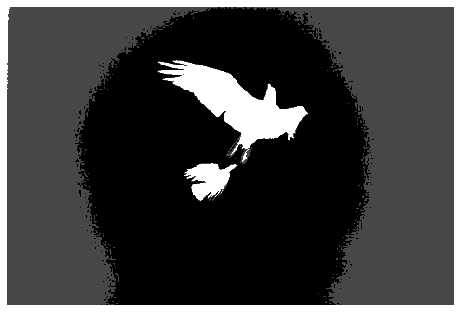

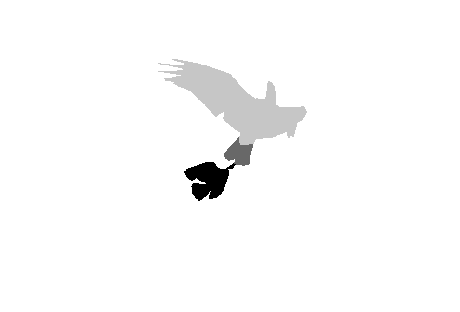

0.06861583637765475
for seg3


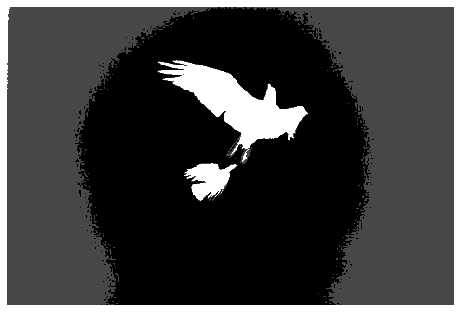

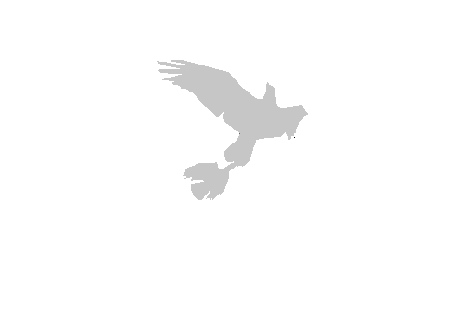

0.04299570049525585
for seg4


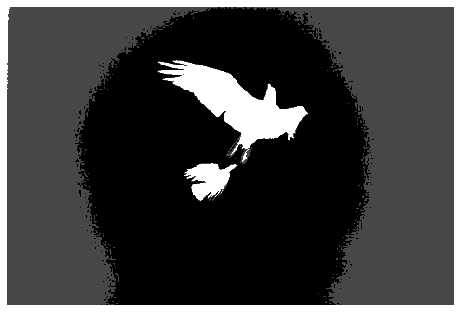

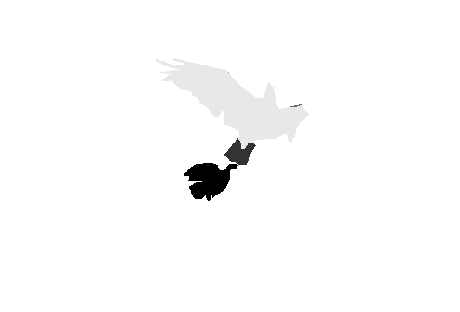

0.07716988985479756
averaagee of image 28= 39.98424840688962
for image29
for seg0


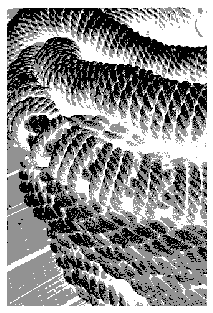

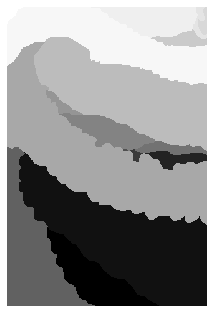

4.152015066826205
for seg1


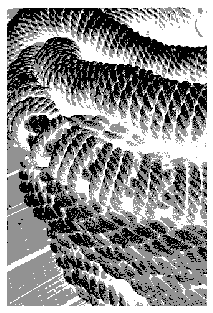

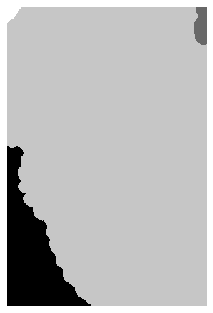

0.7072027198062807
for seg2


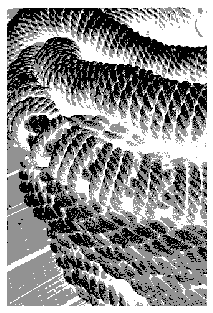

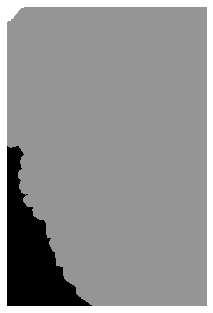

0.6310461673237854
for seg3


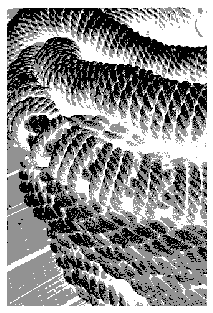

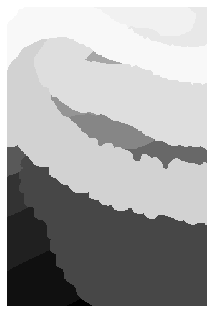

4.077248331119108
for seg4


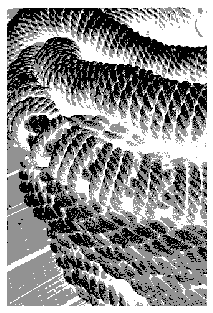

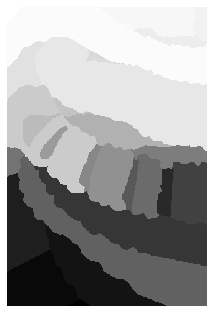

5.577326568739531
averaagee of image 29= 43.013216177652595
for image30
for seg0


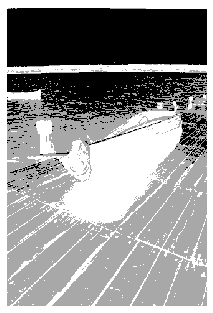

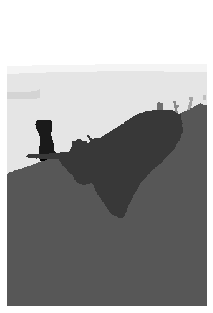

1.8753093006402228
for seg1


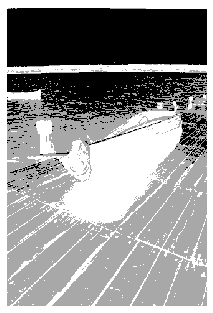

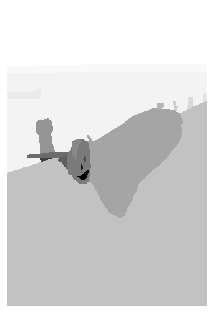

2.0403524333062206
for seg2


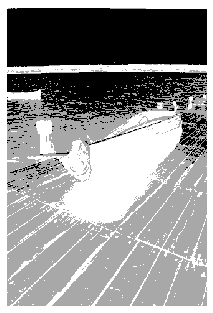

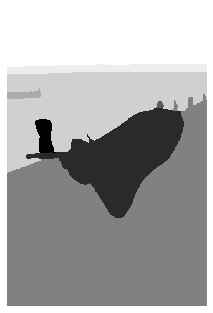

1.8493969509977313
for seg3


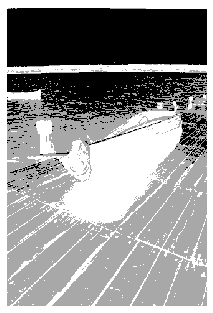

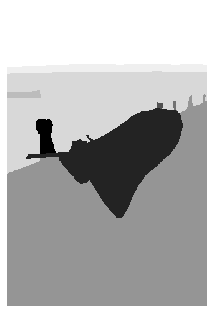

1.8515401105203995
for seg4


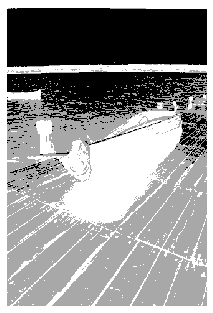

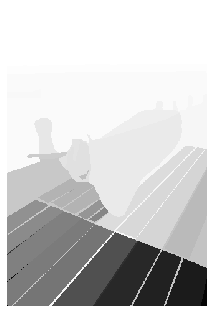

4.7909845975004055
for seg5


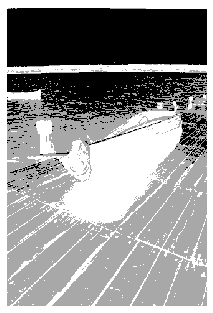

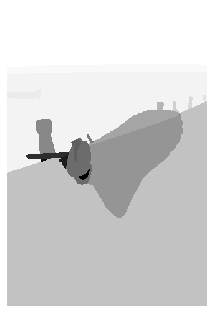

2.099837169575808
averaagee of image 30= 38.26225024180063
for image31
for seg0


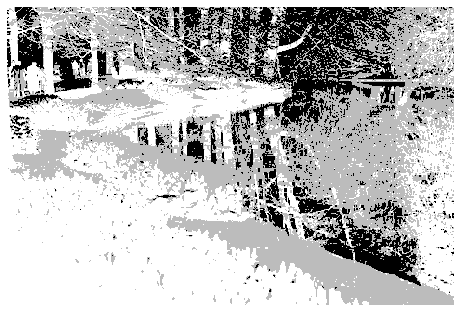

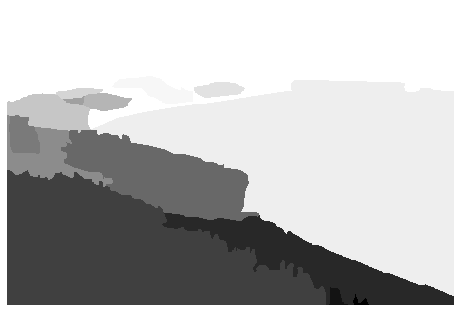

1.383023675138379
for seg1


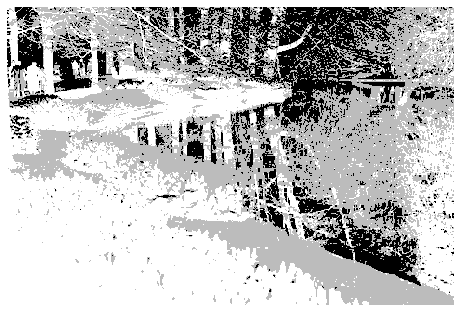

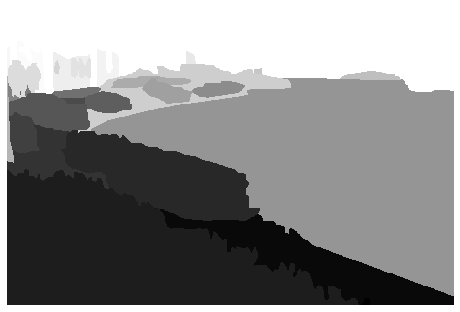

1.6100482507675198
for seg2


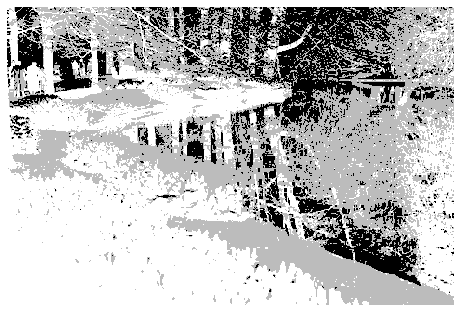

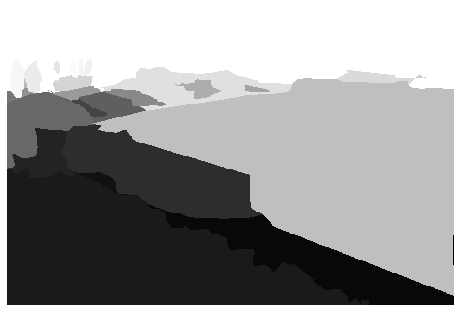

1.54400627815394
for seg3


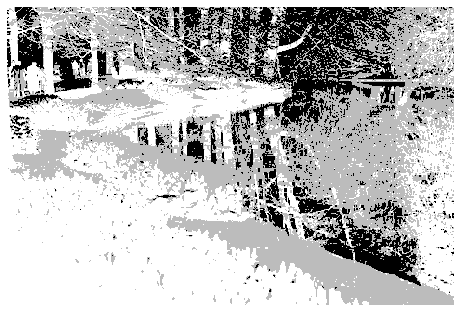

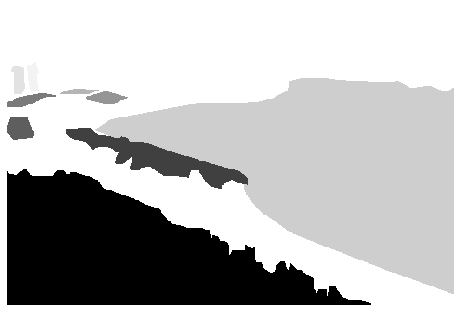

0.9930292423430849
for seg4


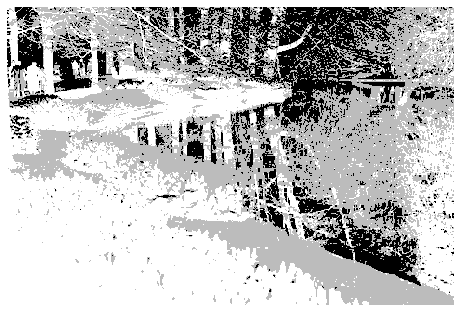

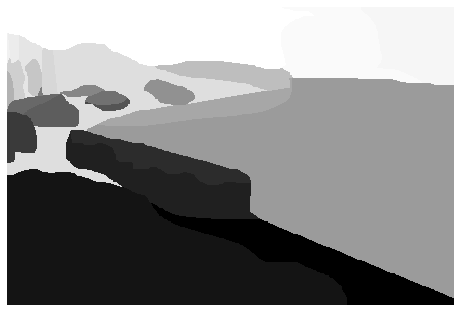

1.8659268880668238
averaagee of image 31= 47.39390715705471
for image32
for seg0


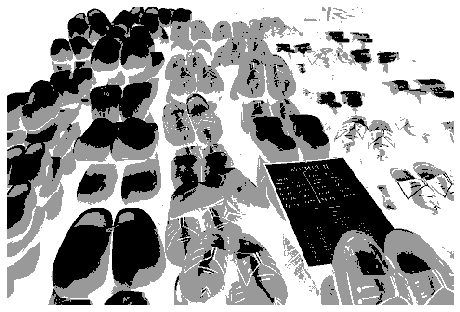

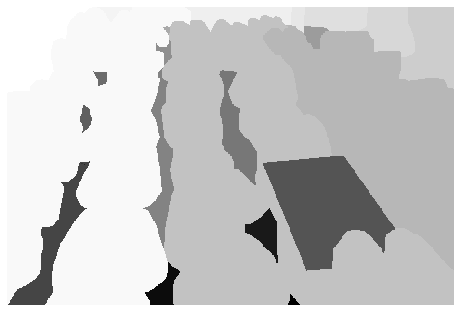

1.4672680994886311
for seg1


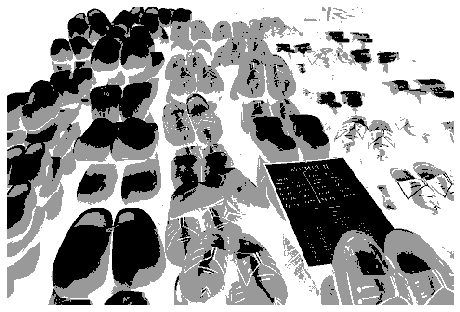

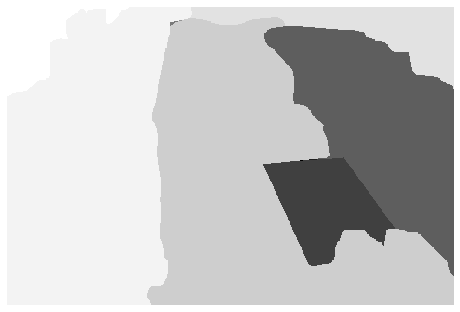

1.1834399012501822
for seg2


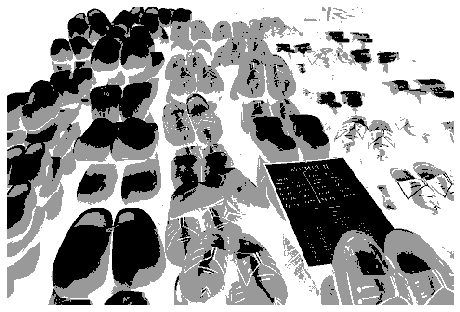

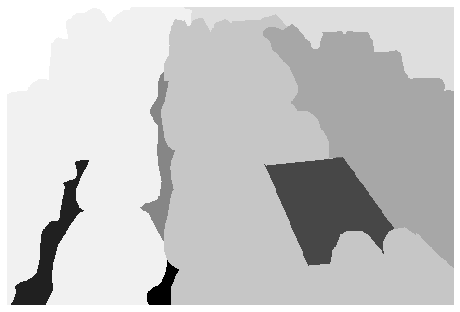

1.2735304155113234
for seg3


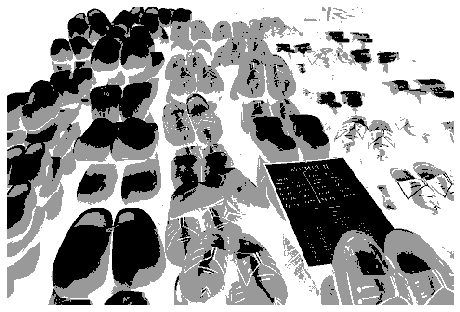

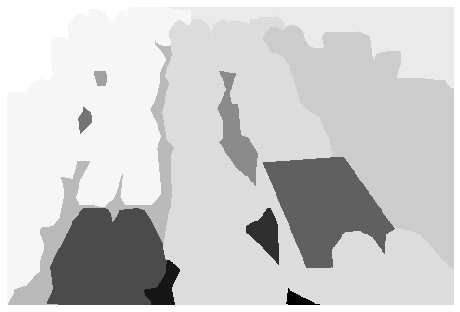

1.5048965150138542
for seg4


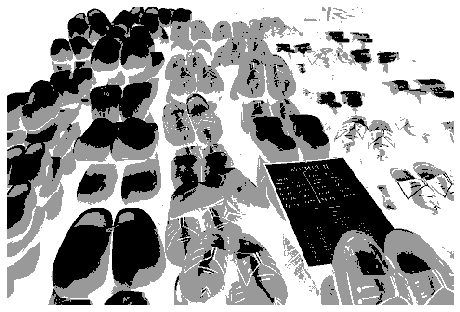

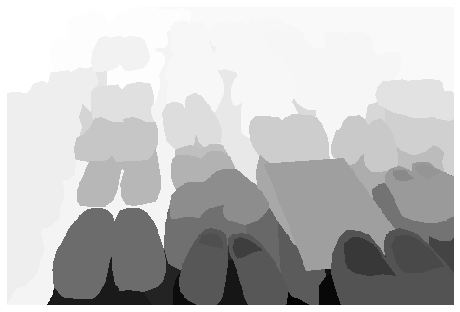

2.830929573042082
averaagee of image 32= 49.04592005791592
for image33
for seg0


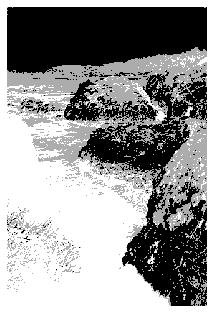

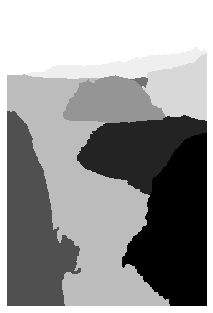

3.004434463603598
for seg1


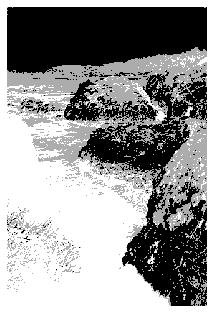

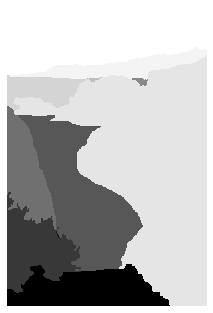

2.606406622864437
for seg2


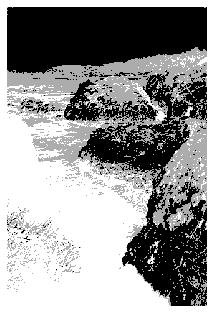

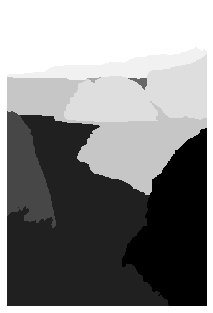

2.690742553382764
for seg3


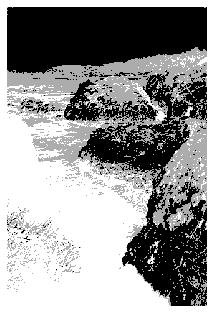

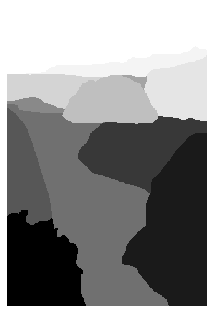

3.45173620459871
for seg4


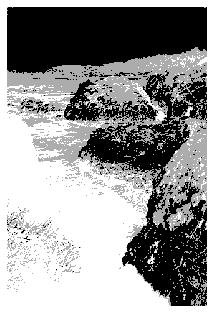

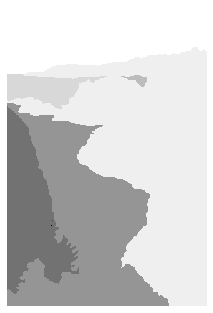

1.870529285957204
for seg5


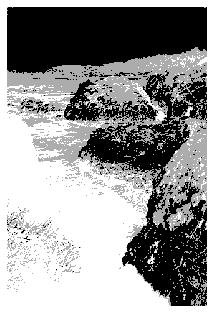

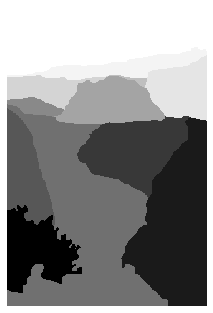

3.3780457094301184
for seg6


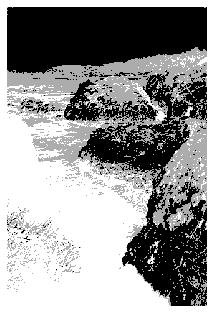

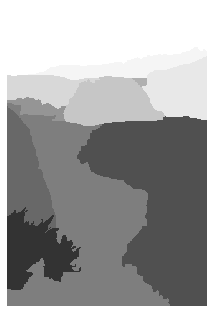

2.9991617154314767
averaagee of image 33= 37.890093834978266
for image34
for seg0


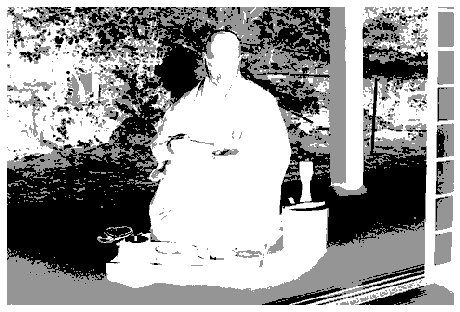

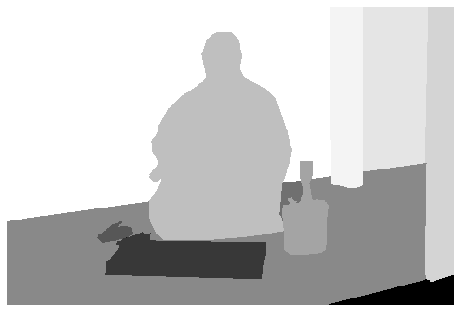

1.510494037990749
for seg1


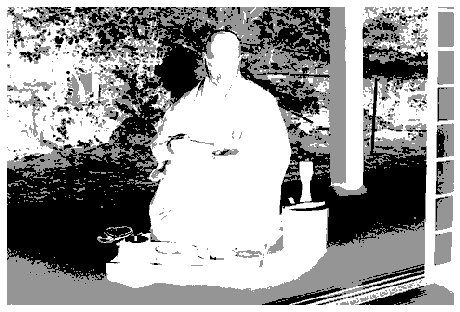

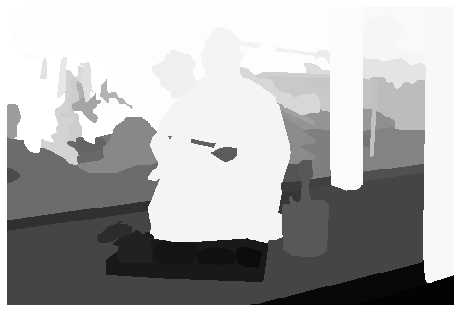

2.475728792950968
for seg2


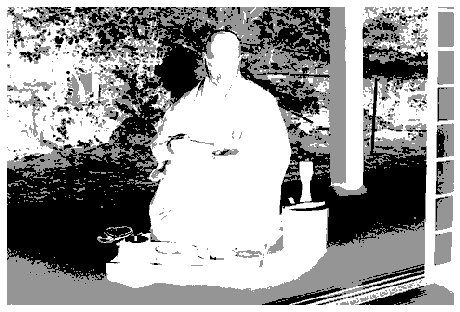

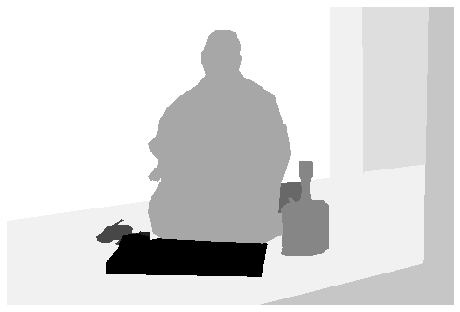

1.4252578790092776
for seg3


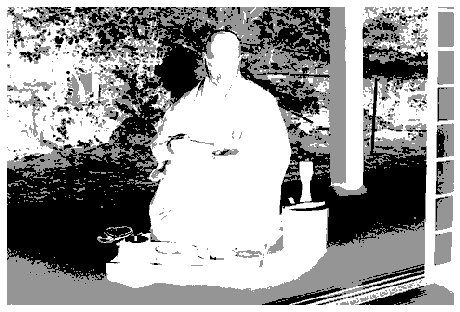

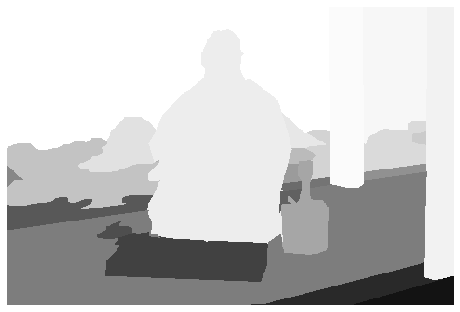

1.953511854510687
for seg4


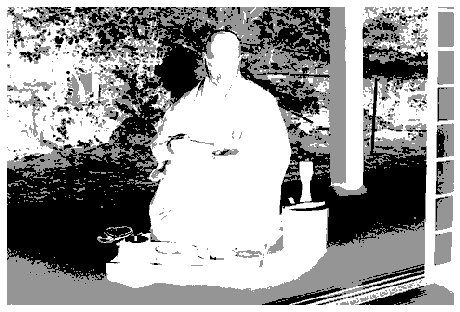

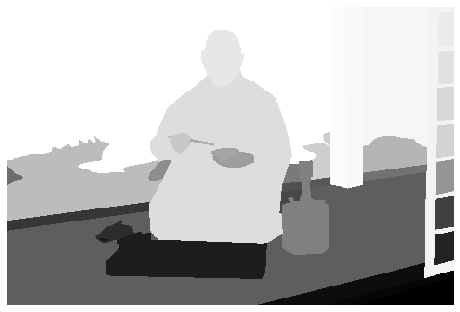

1.9866980731013668
averaagee of image 34= 54.91646949648218
for image35
for seg0


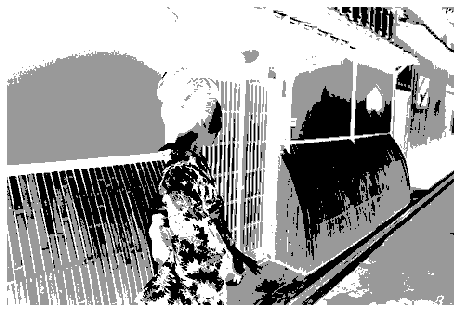

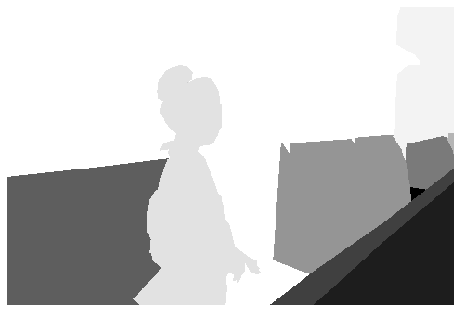

1.4095732148220976
for seg1


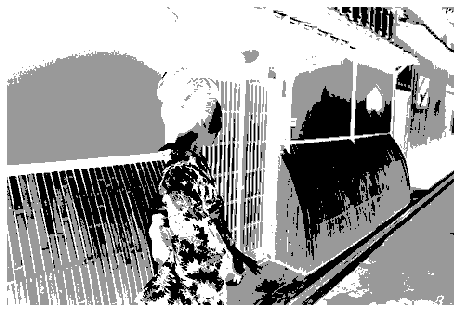

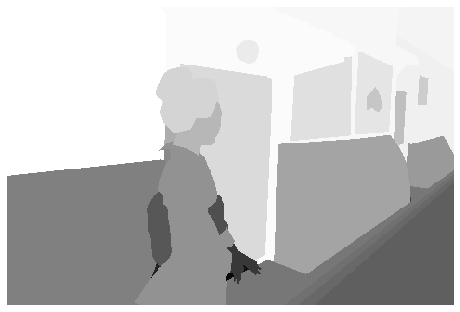

2.2219940335556605
for seg2


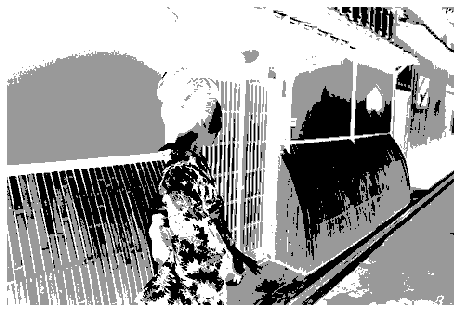

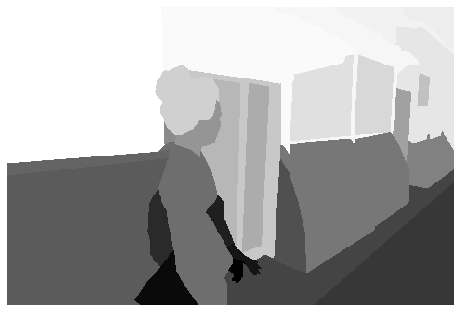

2.364351128729102
for seg3


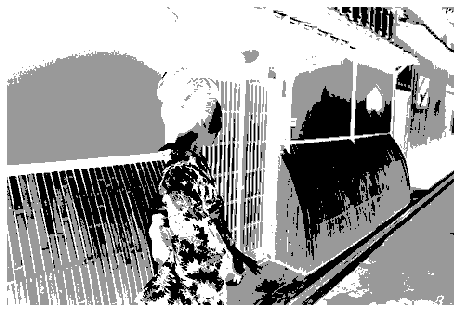

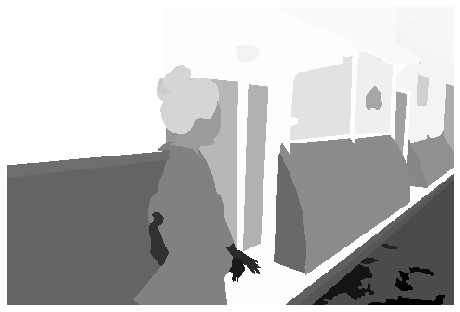

2.3019833233857154
for seg4


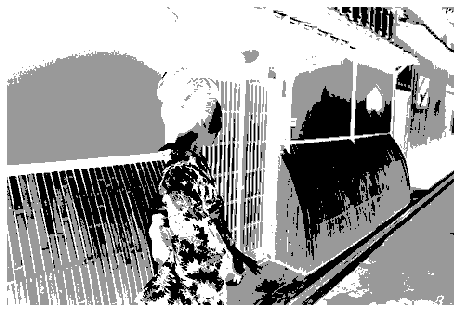

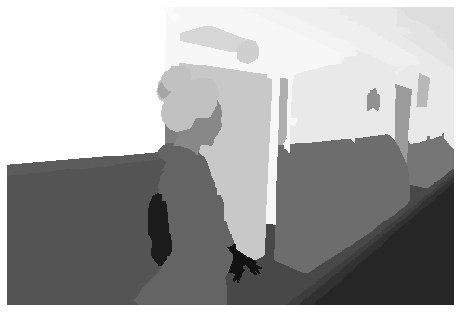

2.2386568694125124
averaagee of image 35= 57.02378121046321
for image36
for seg0


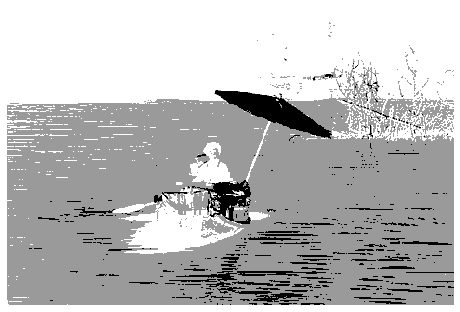

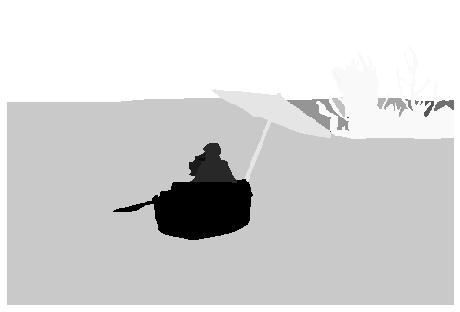

0.5935850754149936
for seg1


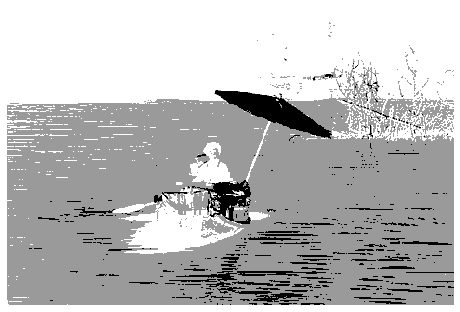

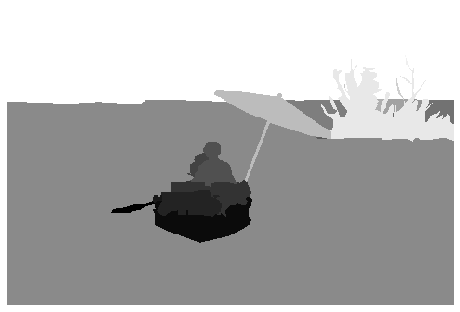

0.6204880724604791
for seg2


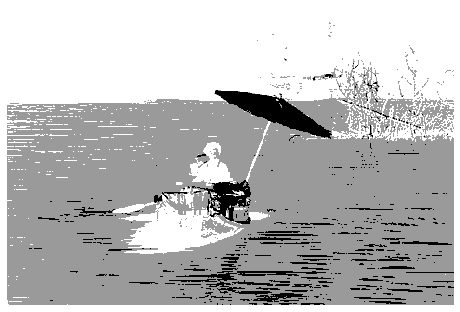

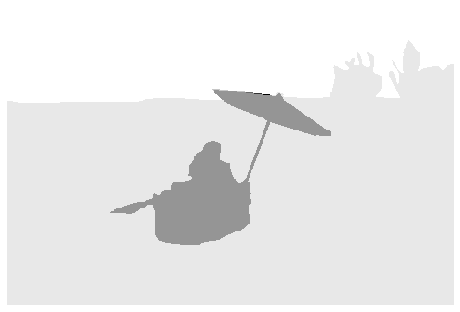

0.3757049969021011
for seg3


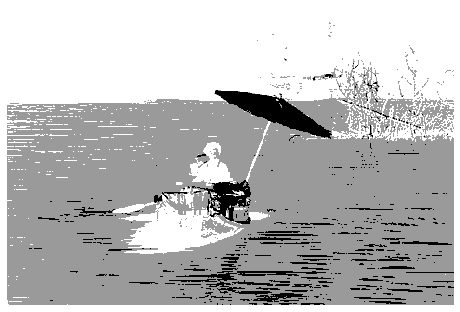

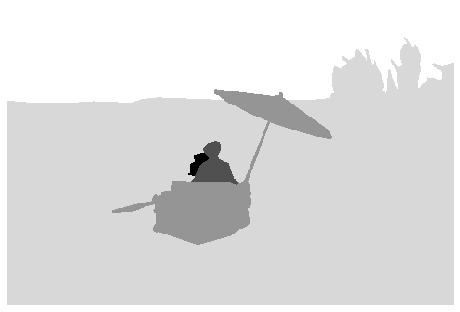

0.3980356085191139
for seg4


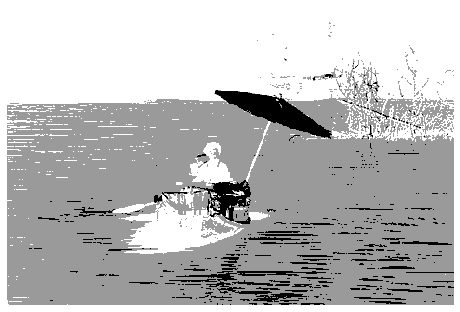

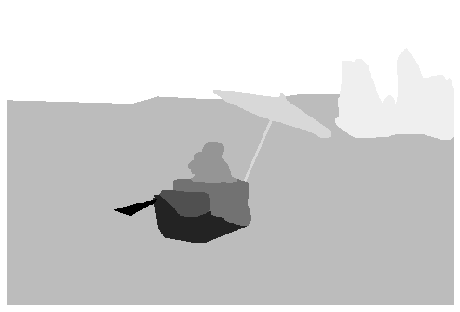

0.5892937862632466
averaagee of image 36= 57.53920271837519
for image37
for seg0


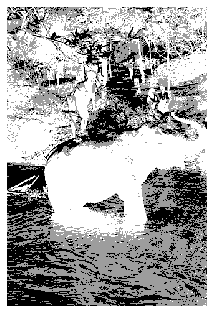

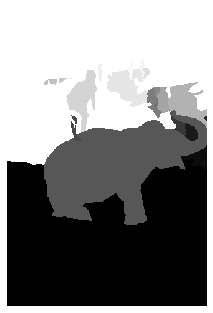

2.5102302864128414
for seg1


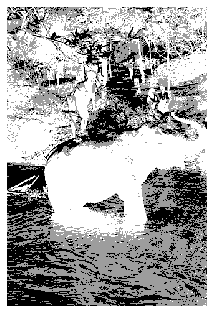

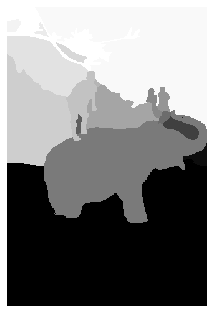

3.423047495798487
for seg2


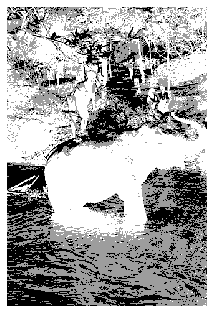

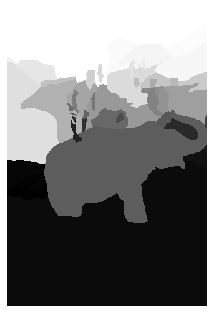

4.242779435827191
for seg3


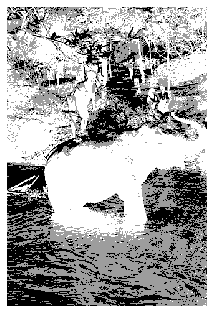

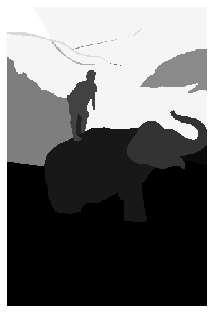

3.079657682003301
for seg4


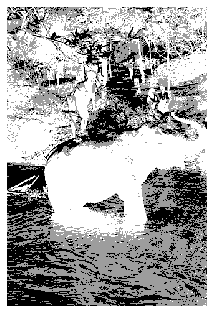

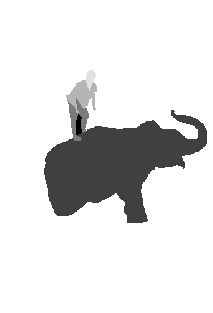

0.9891070540856068
averaagee of image 37= 60.388167109200666
for image38
for seg0


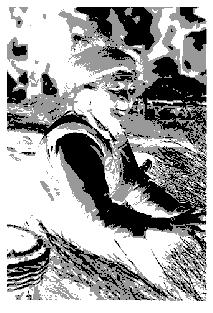

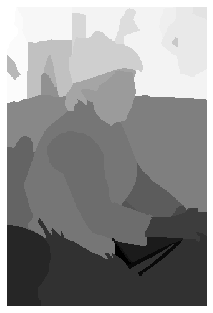

5.612507208029085
for seg1


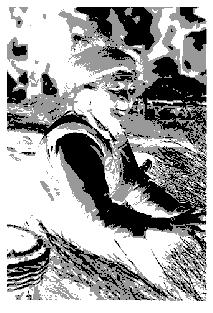

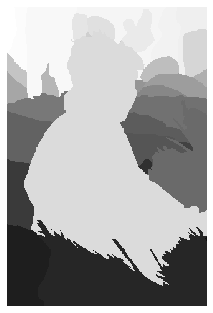

4.822657755725906
for seg2


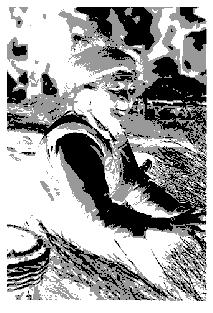

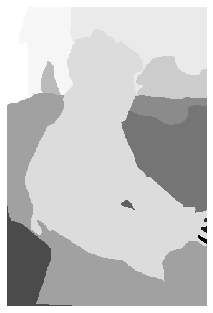

3.750559002335228
for seg3


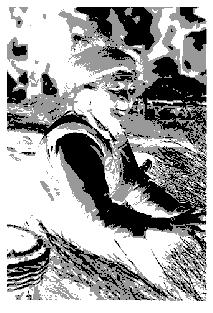

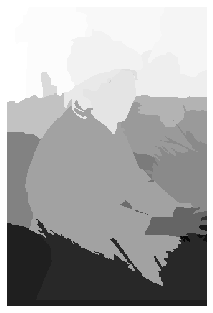

5.150401228639293
for seg4


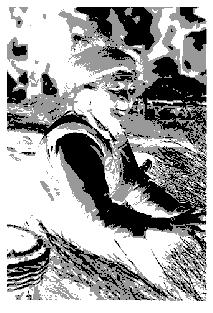

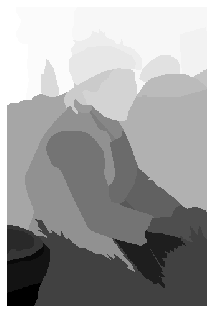

5.683746795524611
for seg5


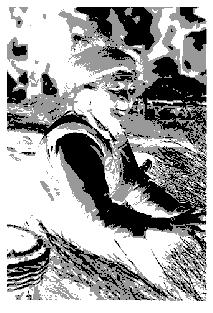

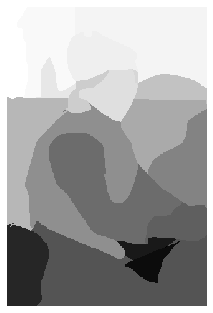

5.308214025192065
averaagee of image 38= 55.378153593574915
for image39
for seg0


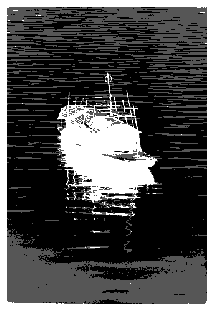

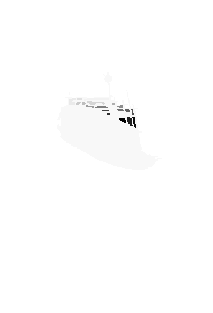

0.4442665222695241
for seg1


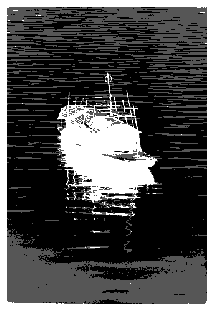

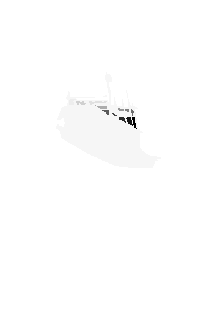

0.4333464560492001
for seg2


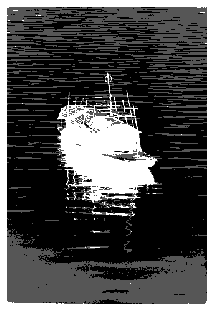

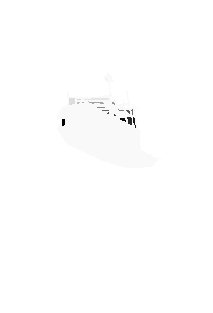

0.44616269742555736
for seg3


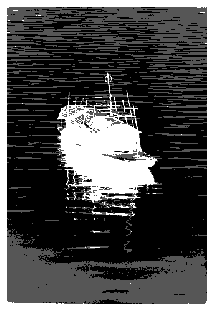

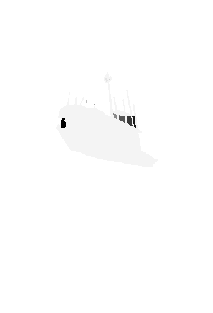

0.357270054178104
for seg4


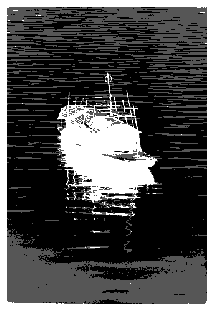

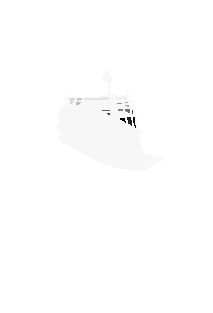

0.47995438110853467
averaagee of image 39= 66.88598433449609
for image40
for seg0


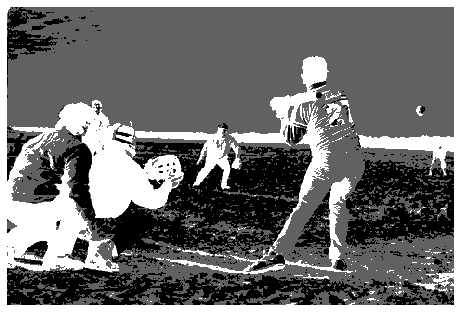

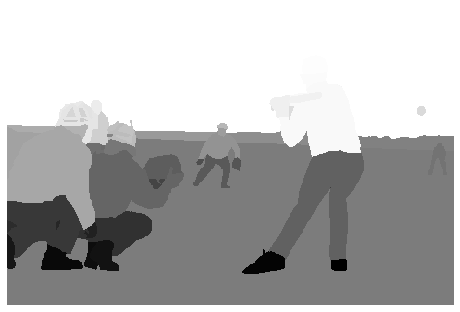

1.3710686112573698
for seg1


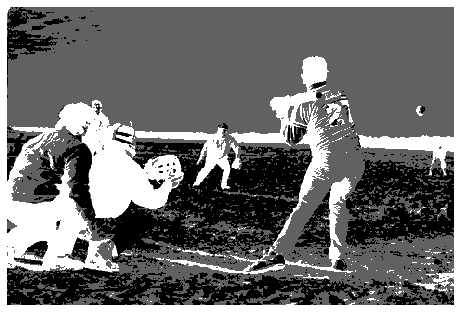

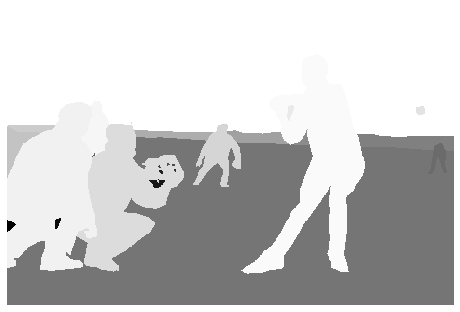

1.1231021024618142
for seg2


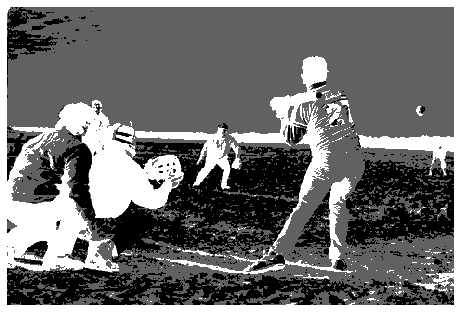

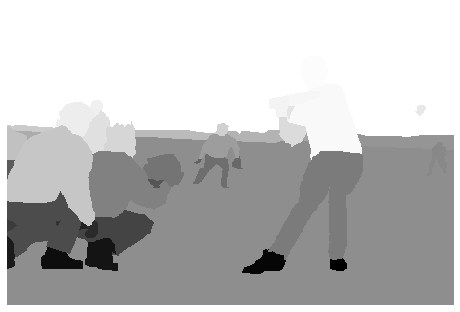

1.3675633297786498
for seg3


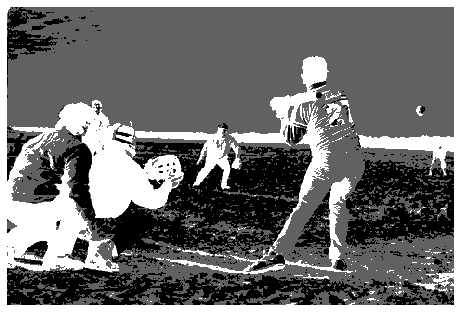

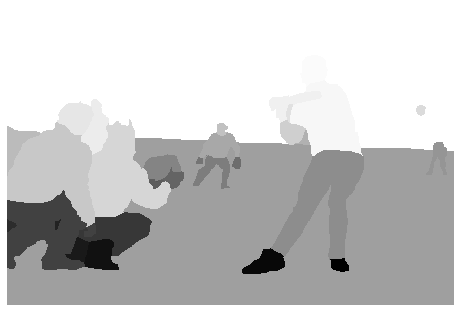

1.3020875632135025
for seg4


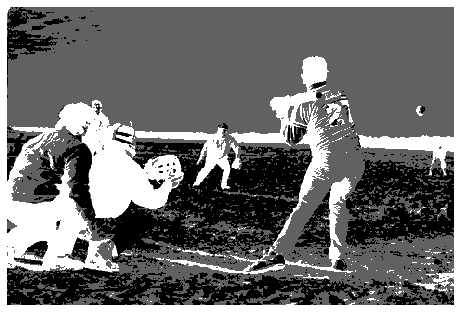

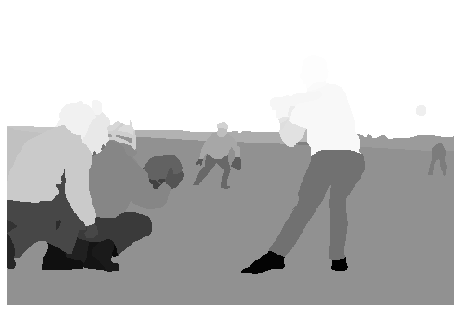

1.3835789768901139
averaagee of image 40= 68.19546445121638
for image41
for seg0


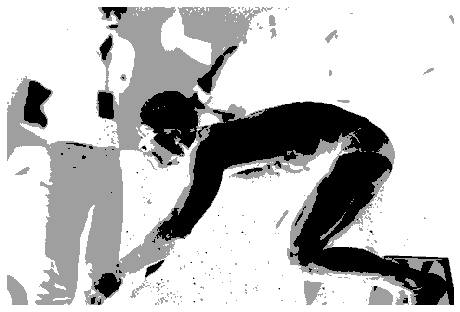

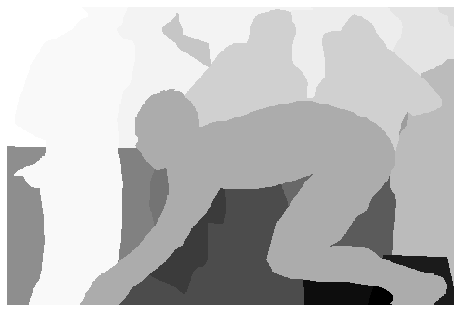

1.8614880011833121
for seg1


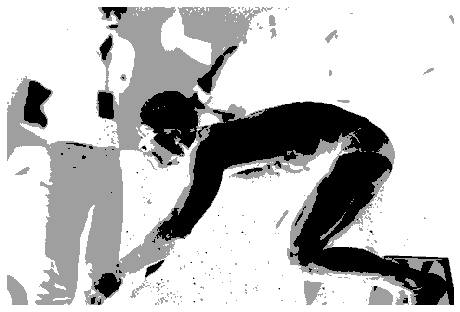

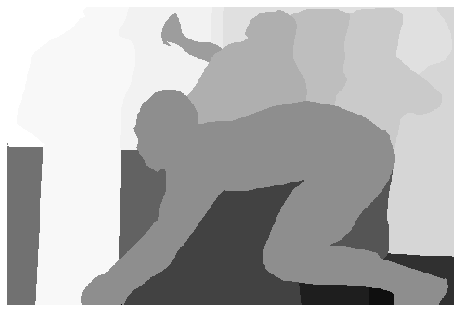

1.8925314450876687
for seg2


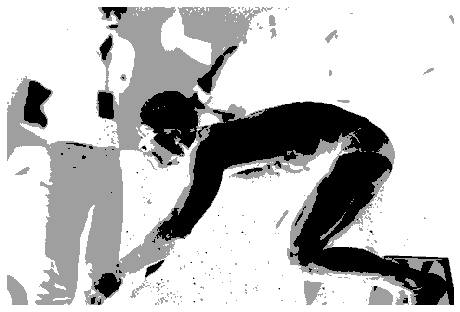

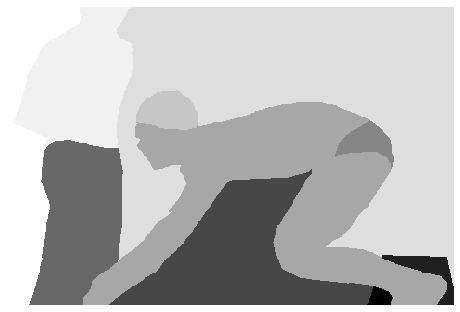

1.3179268270309874
for seg3


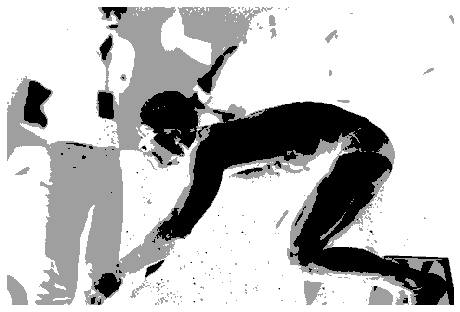

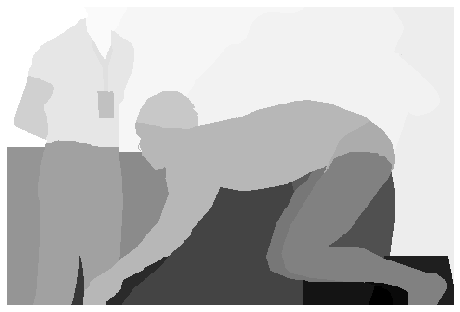

2.0745017018897114
for seg4


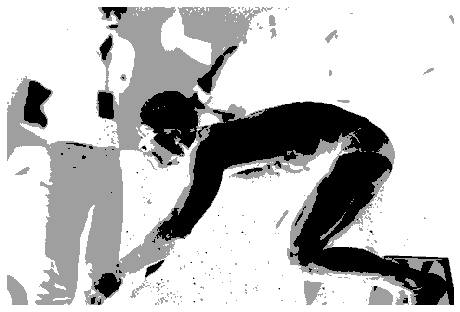

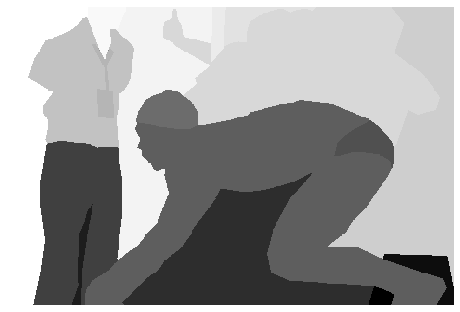

1.7398377163738366
averaagee of image 41= 69.97272158952947
for image42
for seg0


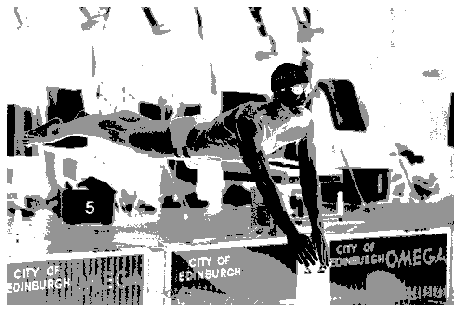

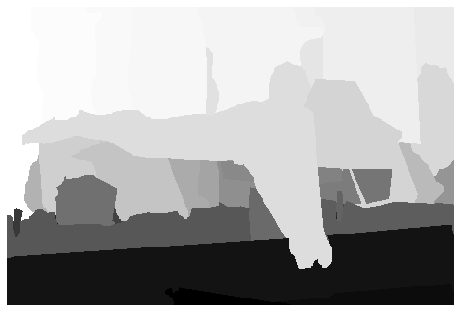

2.5007030062244953
for seg1


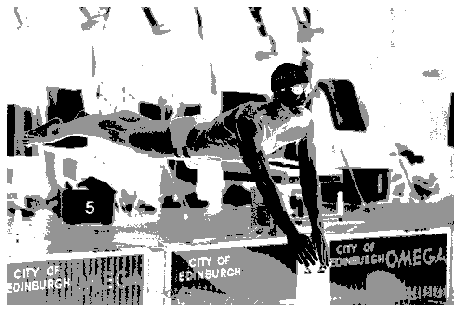

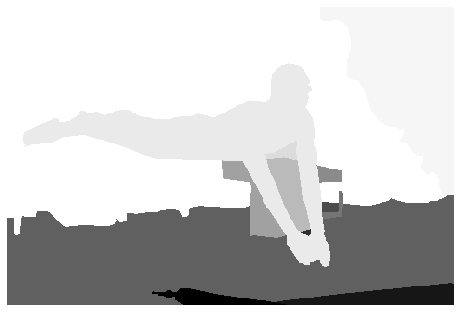

1.2162695596852506
for seg2


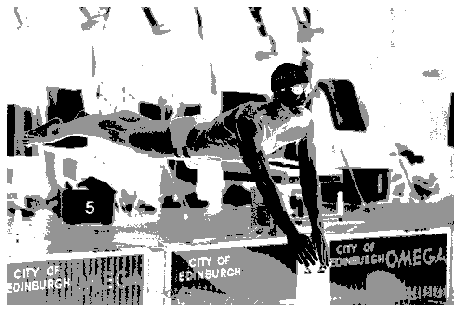

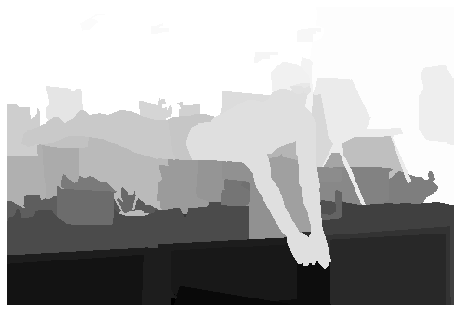

2.5071347059110005
for seg3


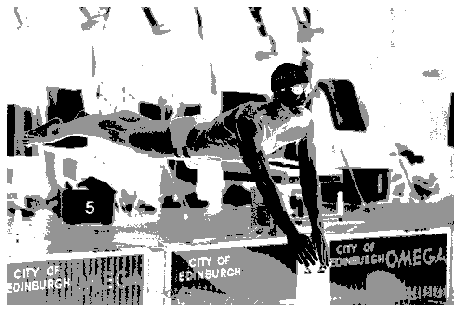

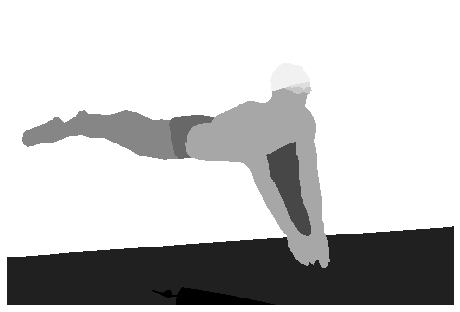

0.9088023775592475
for seg4


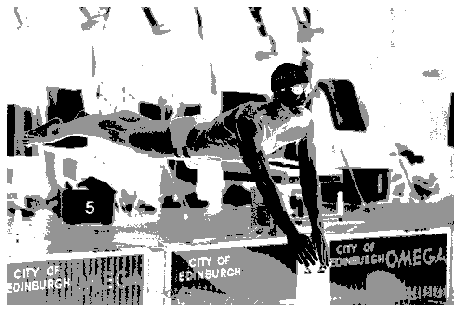

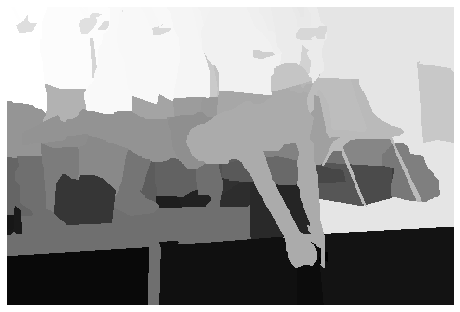

2.9434683208594845
averaagee of image 42= 71.98799718357739
for image43
for seg0


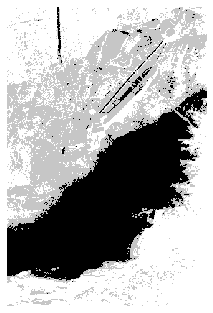

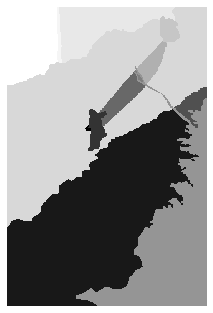

2.425149399834393
for seg1


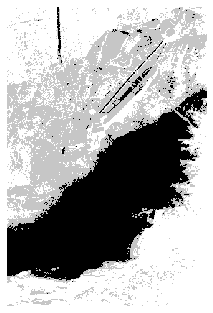

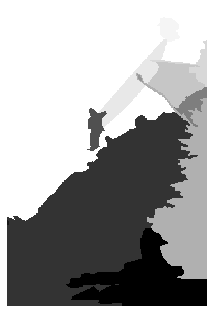

2.3141623963060516
for seg2


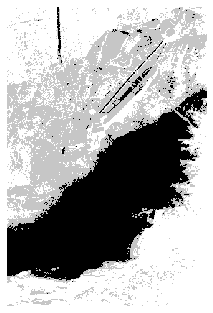

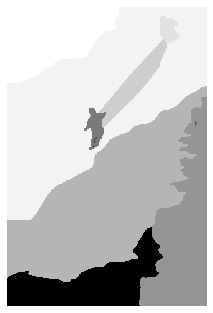

2.2232786238330275
for seg3


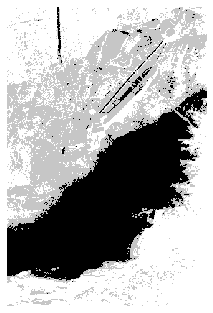

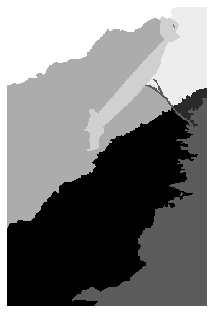

2.461847867437049
for seg4


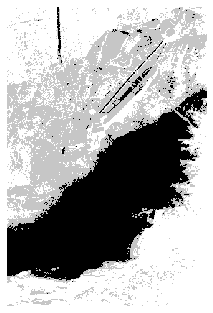

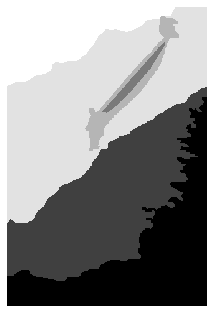

1.896052920738048
for seg5


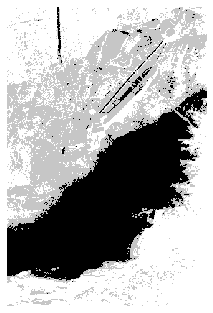

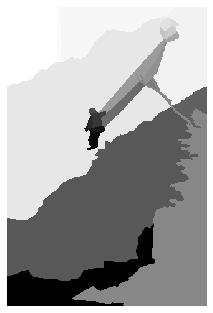

2.9195250507184687
for seg6


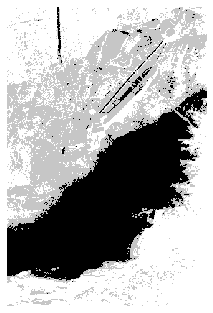

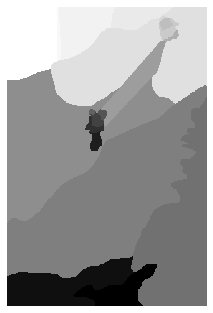

3.1575545255012254
averaagee of image 43= 53.905365243179304
for image44
for seg0


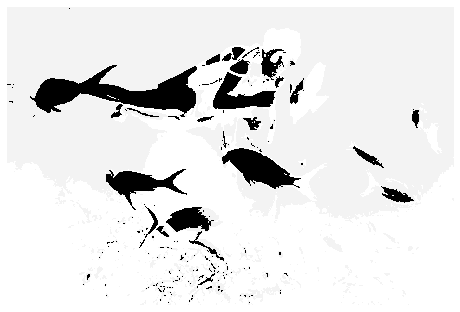

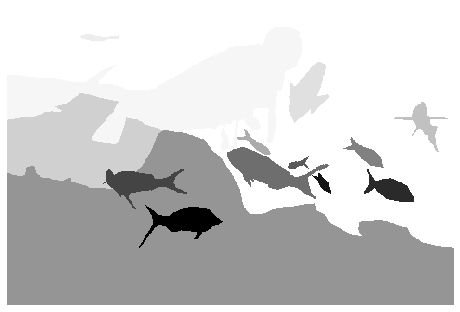

0.9282545884367509
for seg1


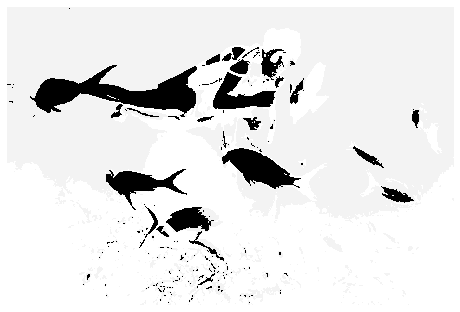

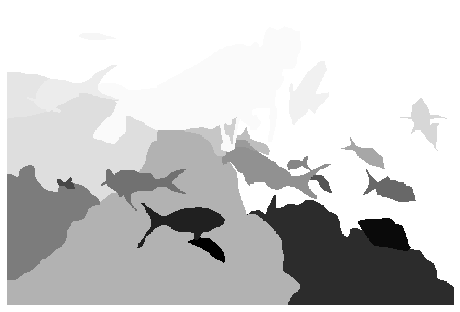

1.4102621388234338
for seg2


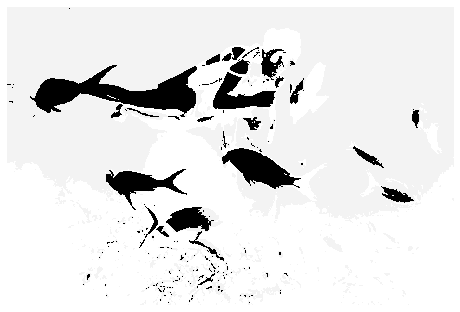

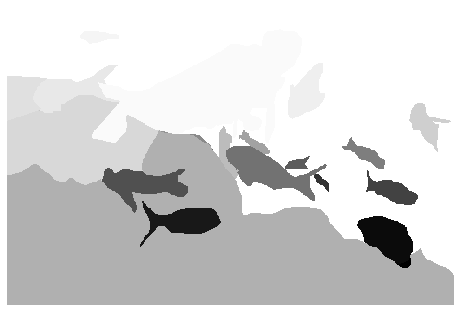

1.1101825423591571
for seg3


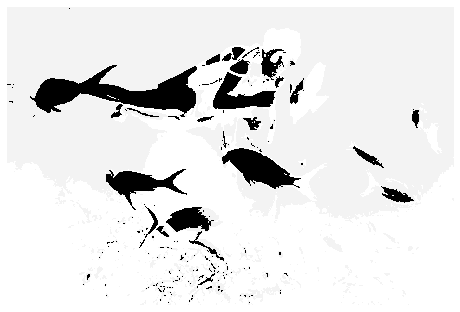

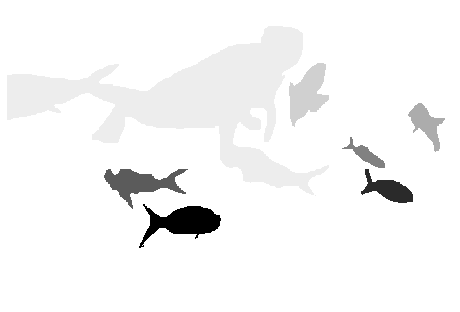

0.49140887316842113
for seg4


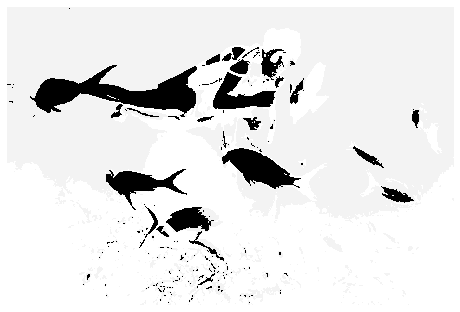

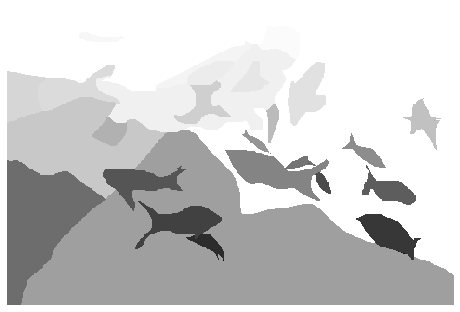

1.3572436044883998
averaagee of image 44= 76.52698168990626
for image45
for seg0


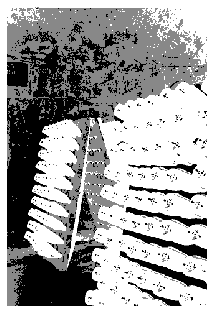

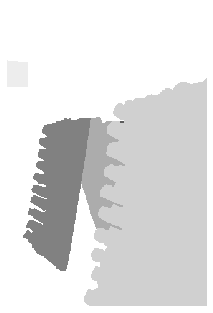

1.7820468338801612
for seg1


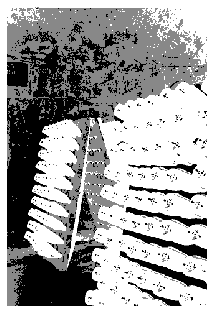

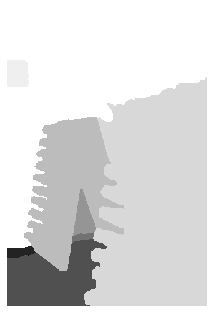

2.184077620483325
for seg2


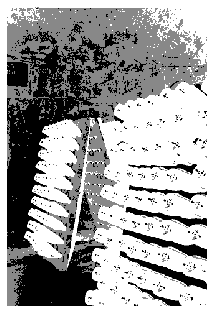

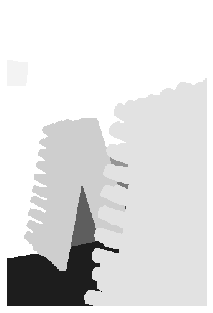

2.1727772534393335
for seg3


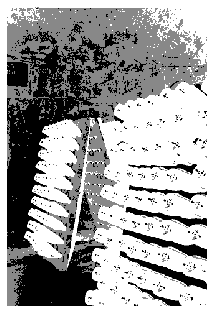

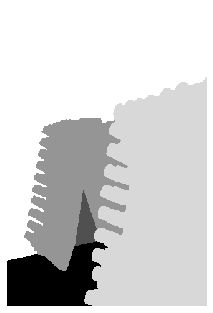

2.017038115057076
for seg4


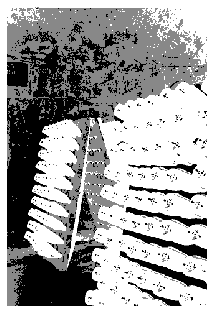

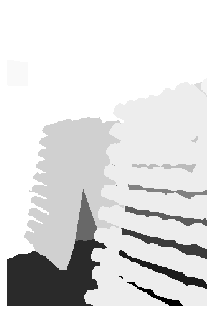

2.385482138193378
for seg5


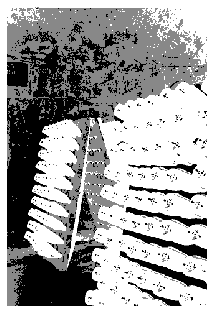

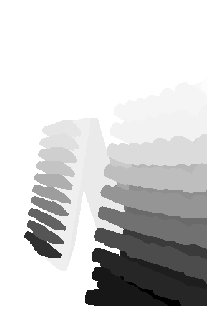

3.869475413391793
averaagee of image 45= 66.17430097066273
for image46
for seg0


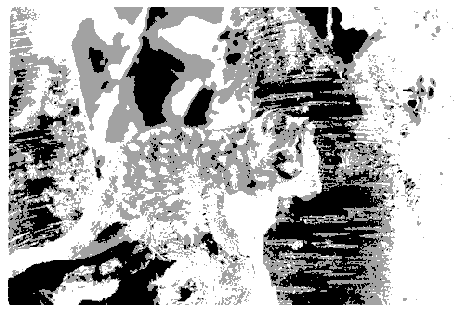

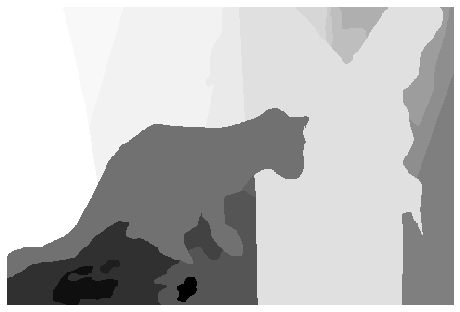

1.910004332580677
for seg1


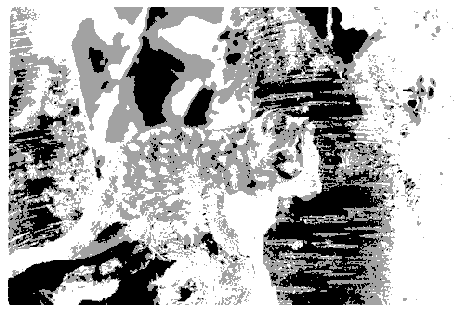

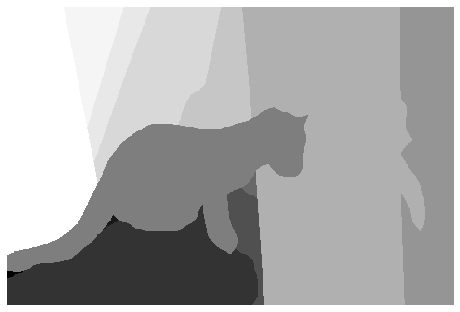

1.785315355681106
for seg2


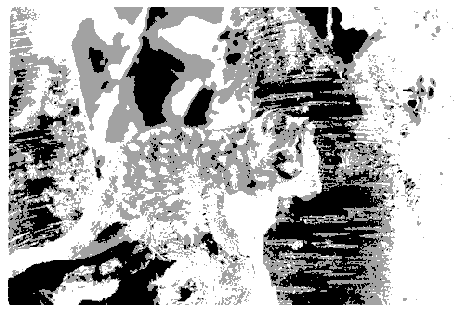

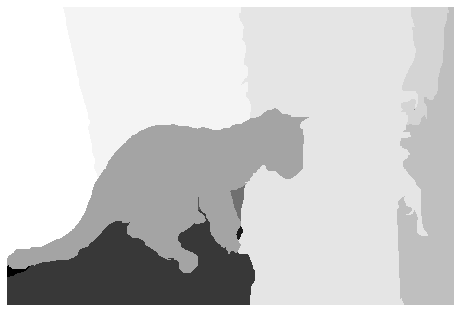

1.5906910586638512
for seg3


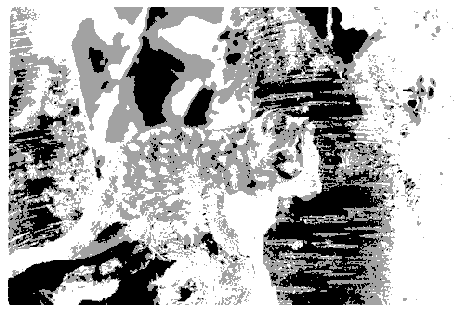

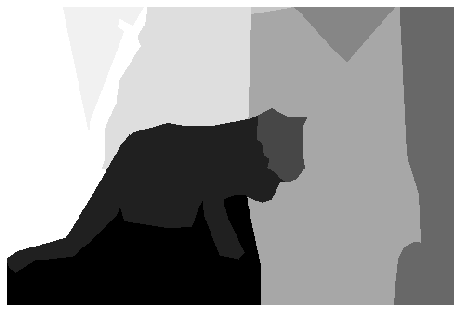

1.7493564247576656
for seg4


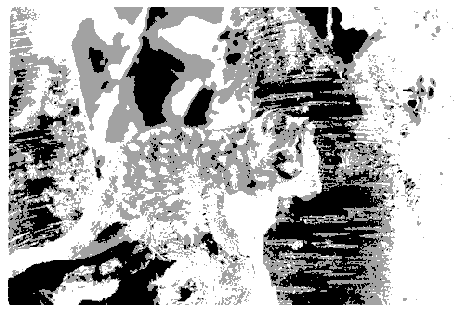

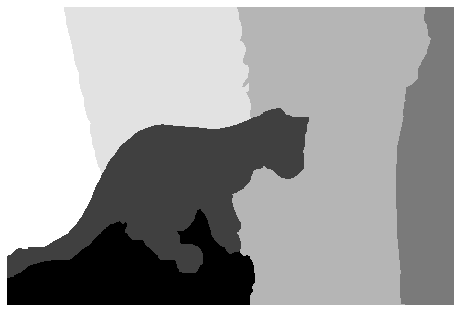

1.5304991254333977
for seg5


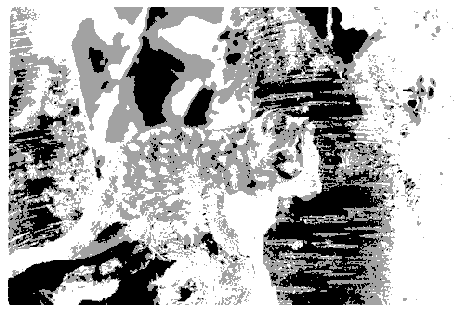

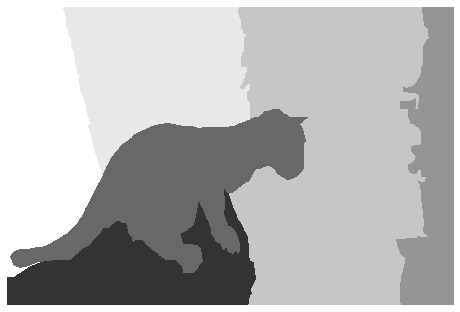

1.520570479419384
averaagee of image 46= 67.85537376675208
for image47
for seg0


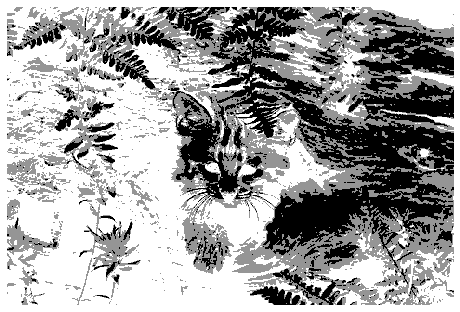

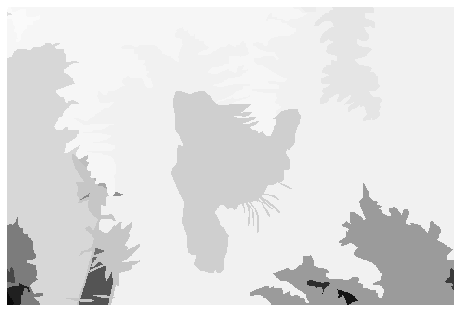

1.5315609751595487
for seg1


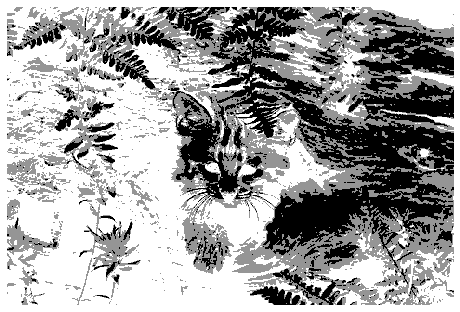

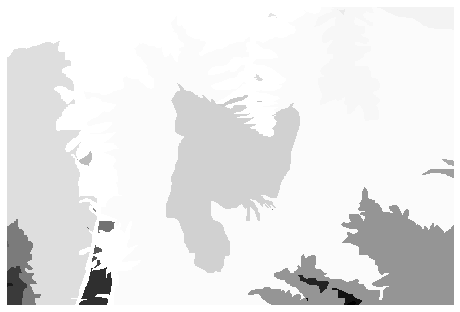

1.5283565772190446
for seg2


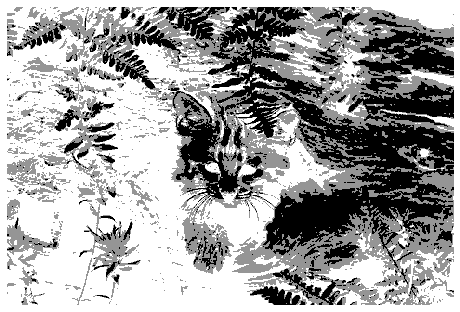

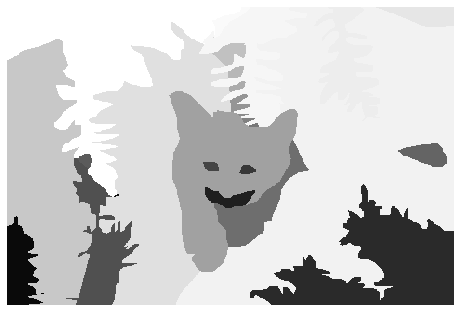

1.9143344578143529
for seg3


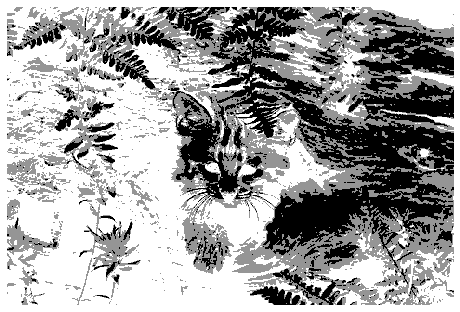

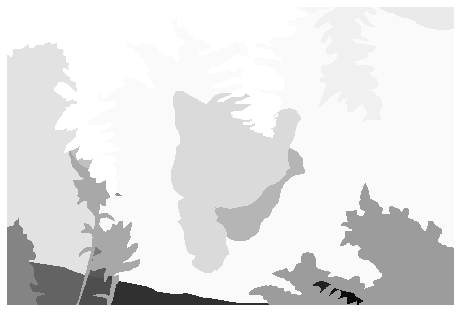

1.7016947618795213
for seg4


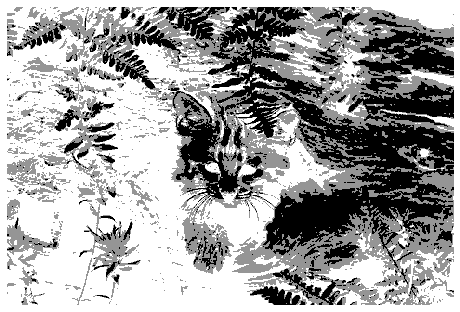

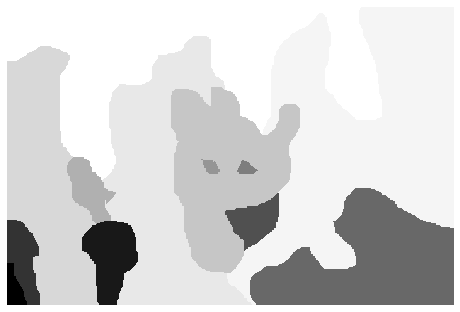

1.725651488501999
averaagee of image 47= 83.10676817221739
for image48
for seg0


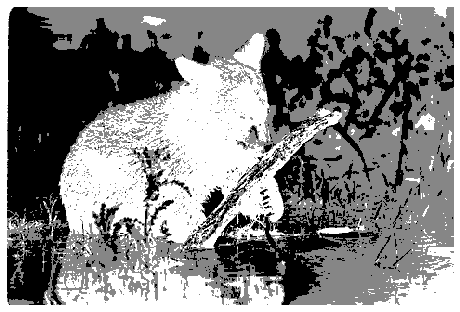

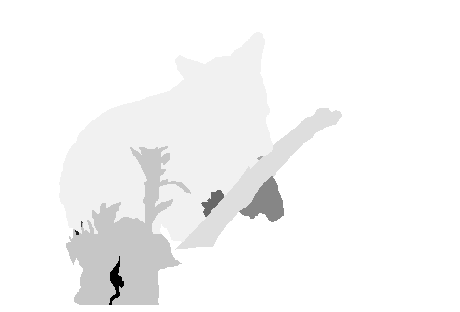

0.6449654906777733
for seg1


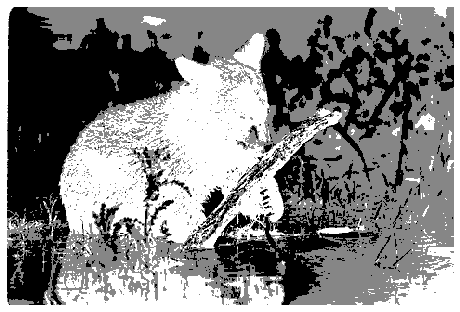

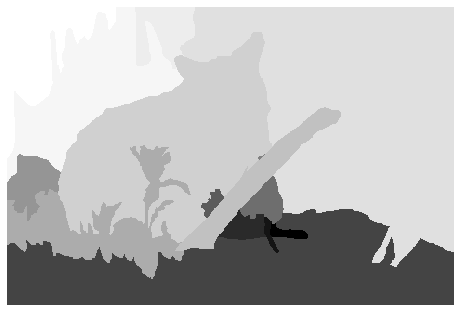

1.4996526043615213
for seg2


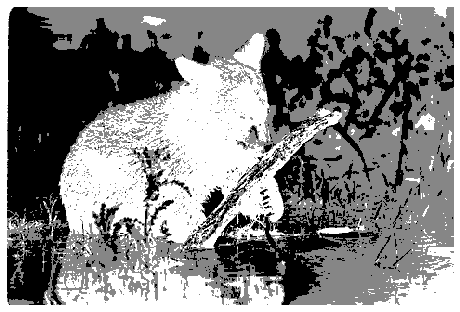

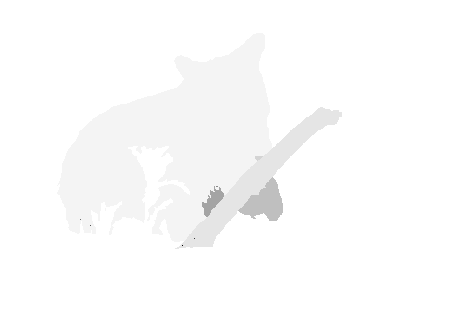

0.43602381895170633
for seg3


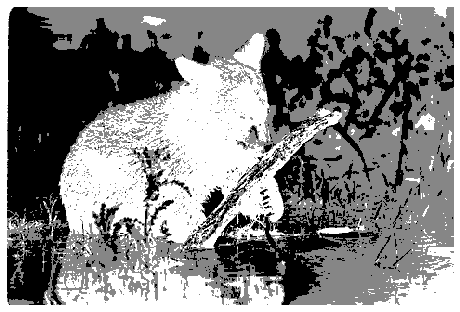

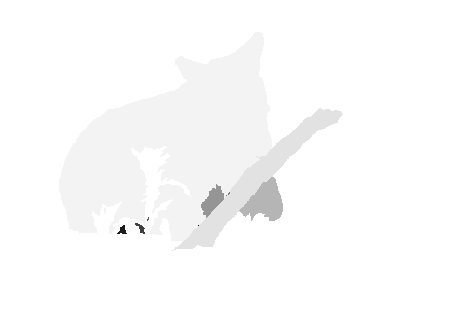

0.4343613673618781
for seg4


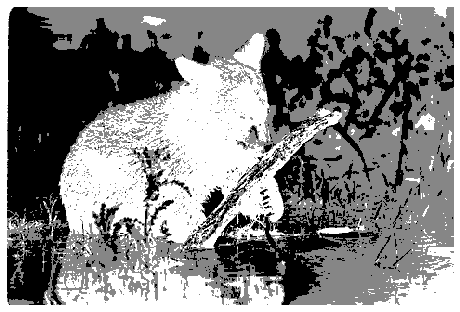

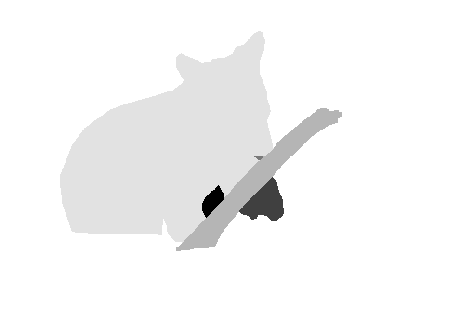

0.48229557445249305
for seg5


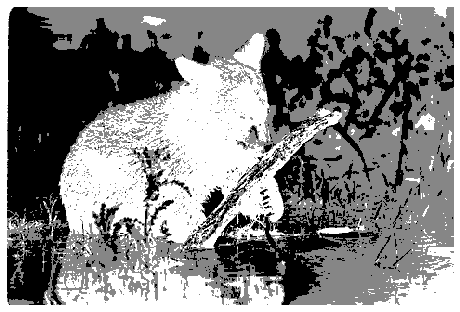

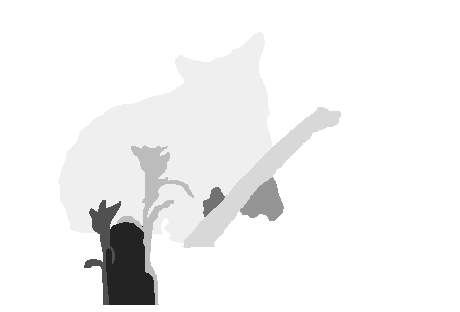

0.6471896488195319
averaagee of image 48= 69.94638822761864
for image49
for seg0


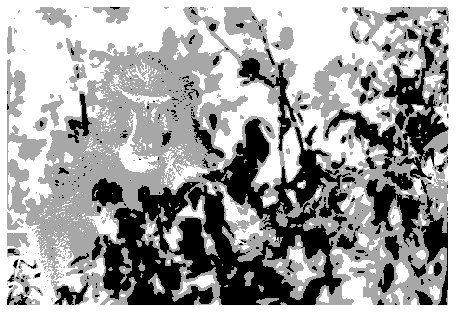

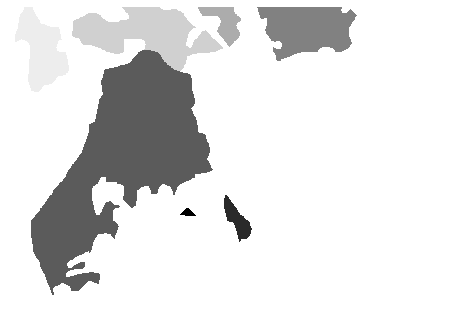

0.6968696921910057
for seg1


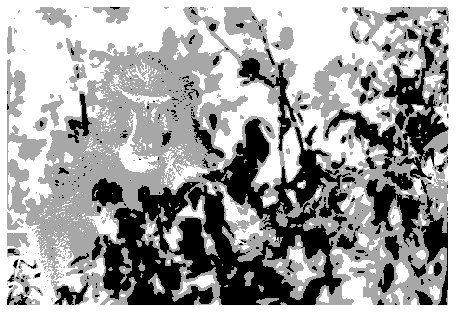

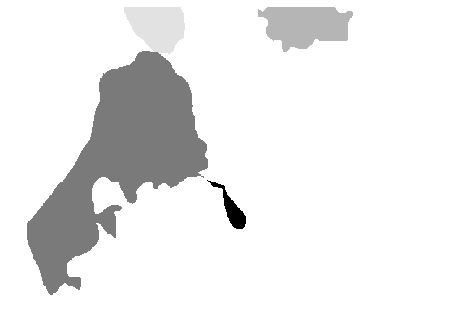

0.5188138973046901
for seg2


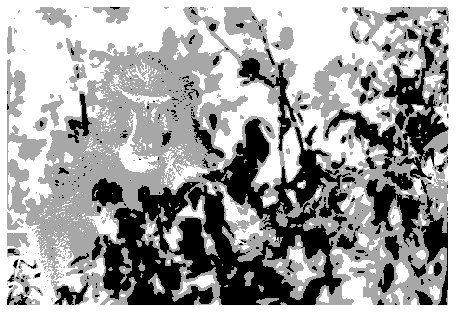

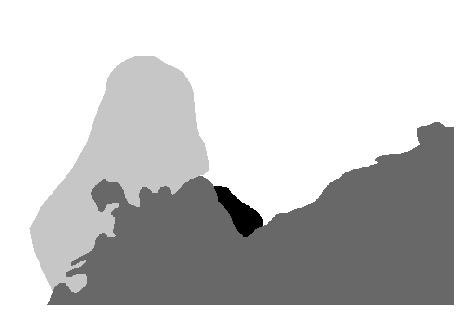

0.8722199712992745
for seg3


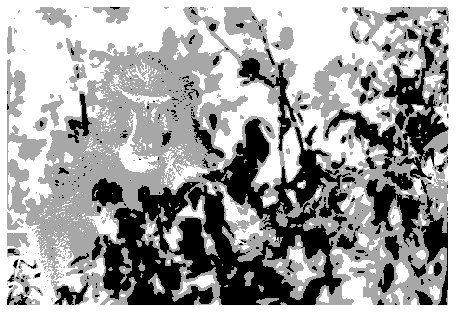

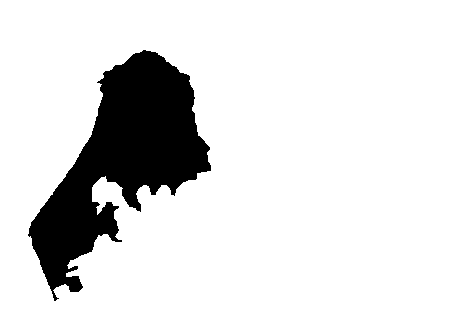

0.3507052723864419
for seg4


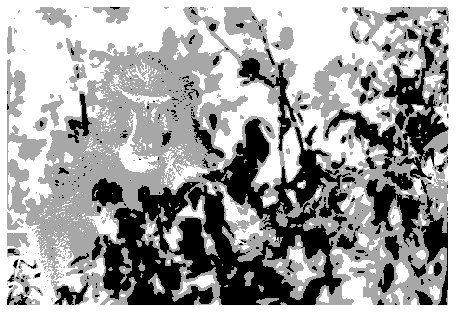

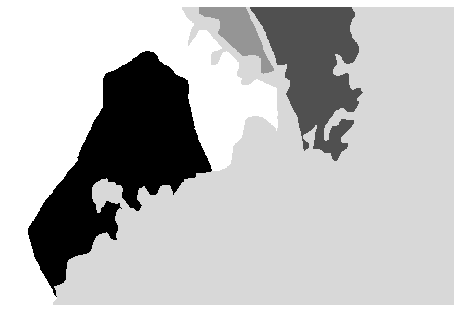

0.9791537976297044
for seg5


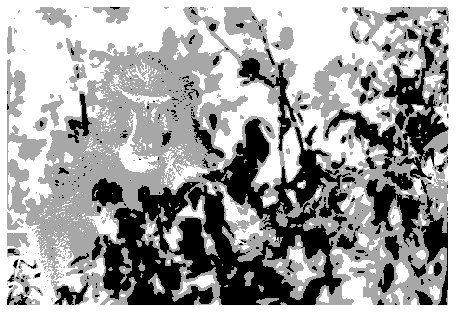

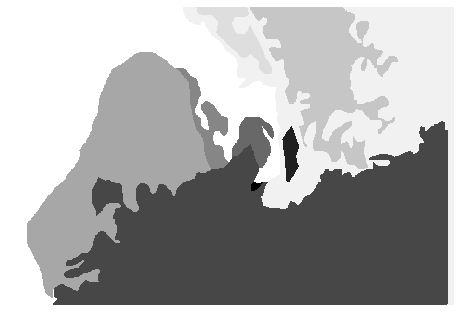

1.3769721528304493
averaagee of image 49= 70.74551069155889
for image50
for seg0


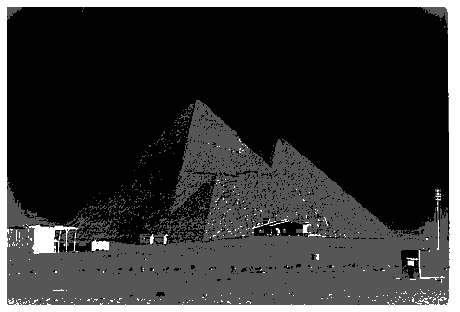

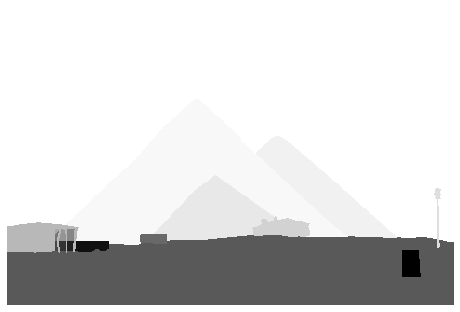

0.8172367161016791
for seg1


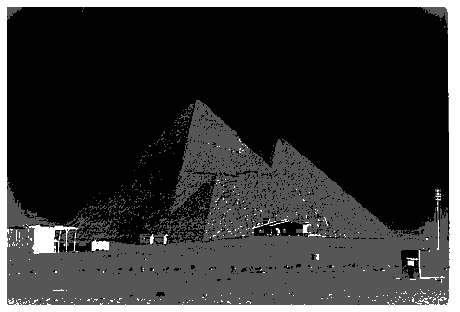

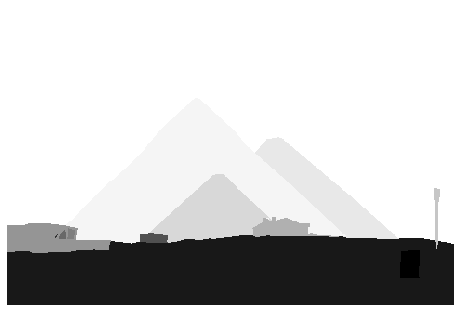

0.8096971013677408
for seg2


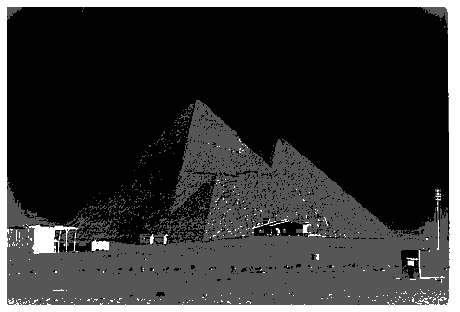

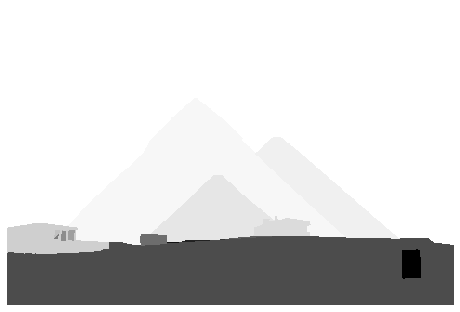

0.8096065070274008
for seg3


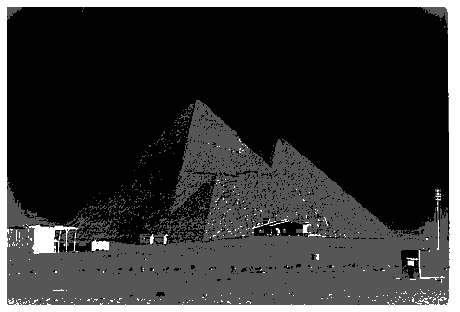

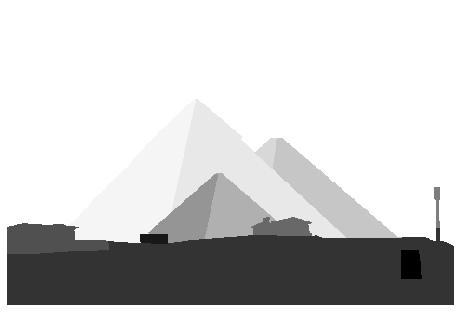

0.8748637514373577
for seg4


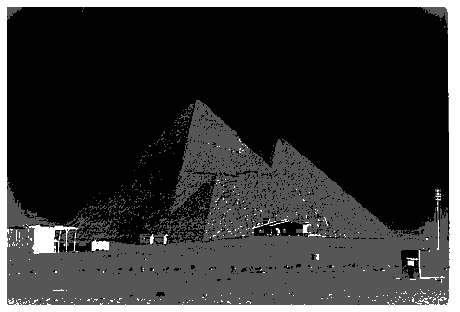

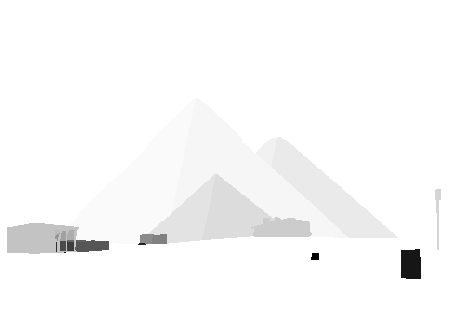

0.8122994459127979
averaagee of image 50= 85.71935353424007
for image51
for seg0


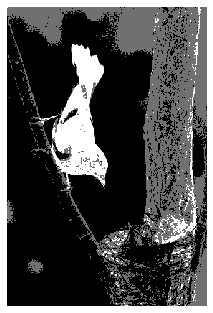

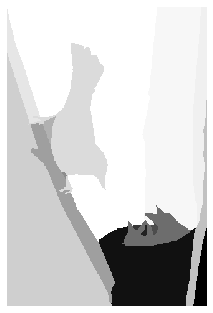

3.476996254311008
for seg1


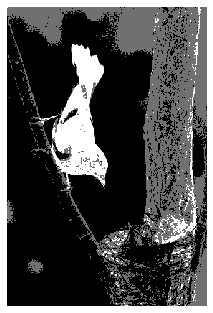

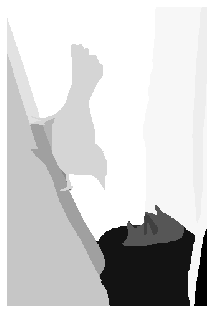

3.3537168458642483
for seg2


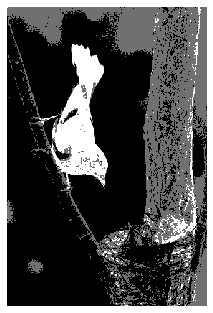

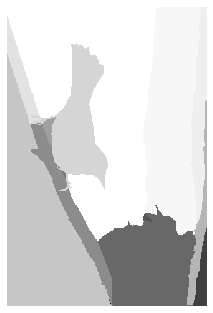

3.3220183538516554
for seg3


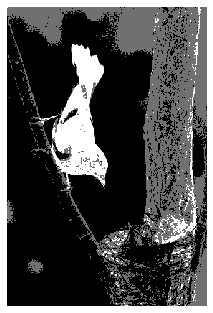

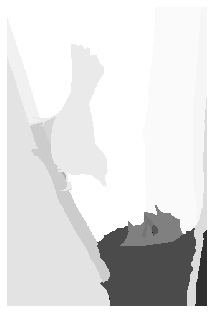

3.4620603047872462
for seg4


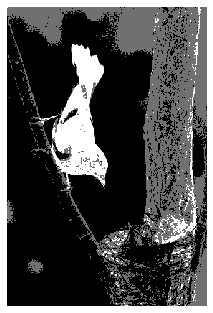

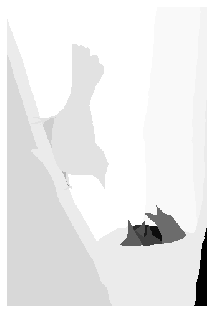

3.0840240184086856
for seg5


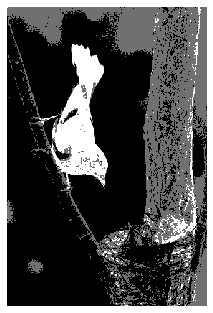

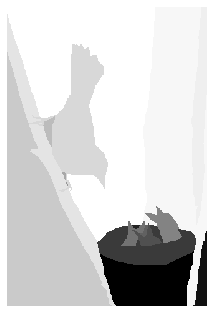

3.42471532499063
averaagee of image 51= 74.78671646223565
for image52
for seg0


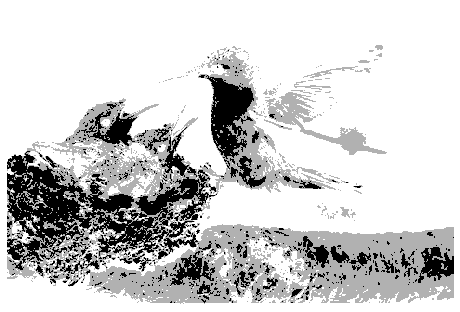

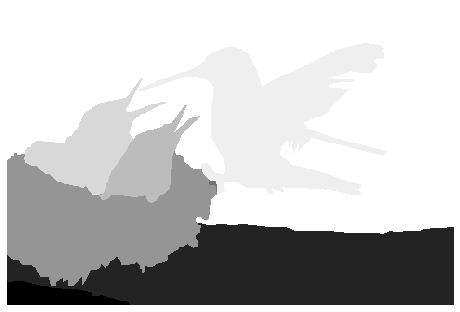

1.0483168605786863
for seg1


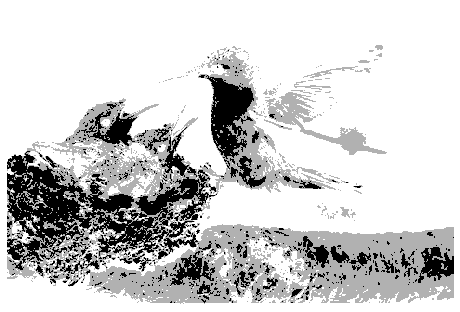

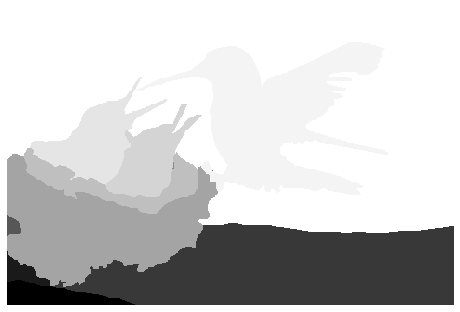

1.1398010111028385
for seg2


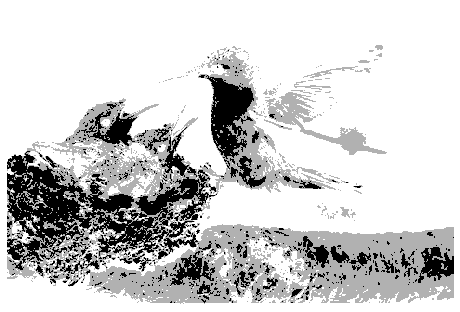

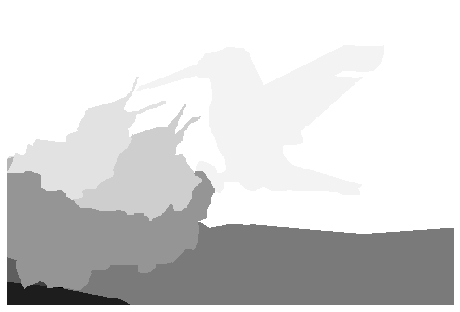

1.1164395468977772
for seg3


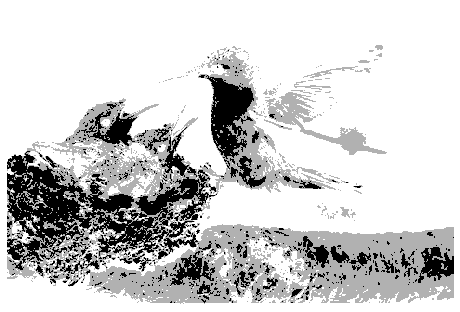

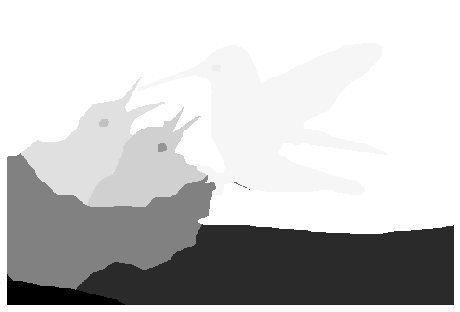

1.101089112297549
for seg4


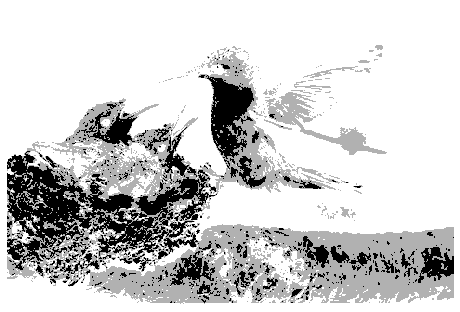

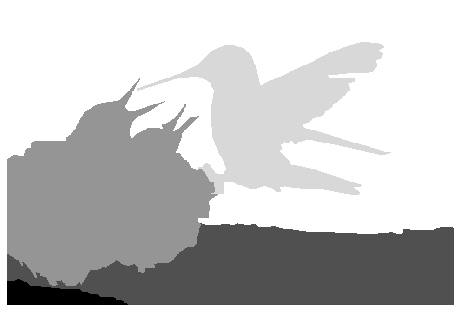

0.8858613468574219
averaagee of image 52= 90.80236133022963
for image53
for seg0


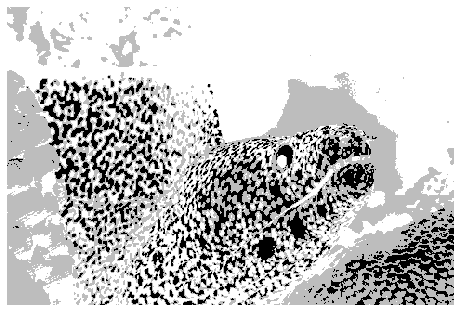

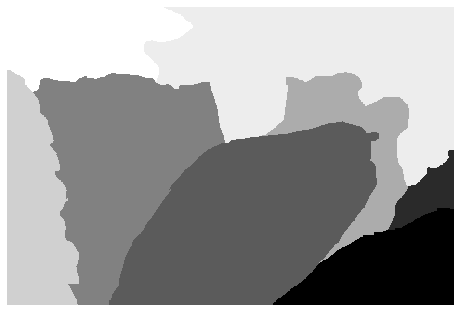

1.5023849240910443
for seg1


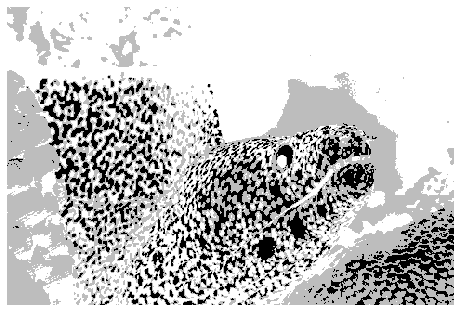

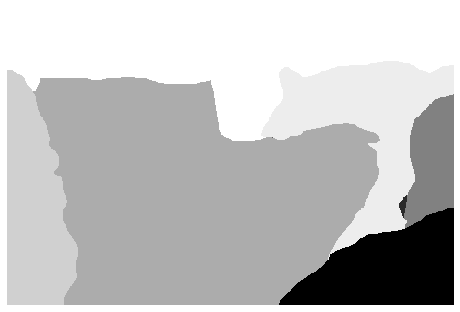

1.1888986088521196
for seg2


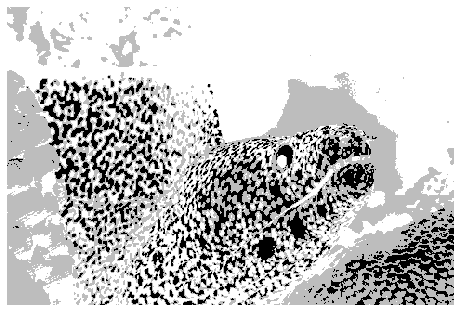

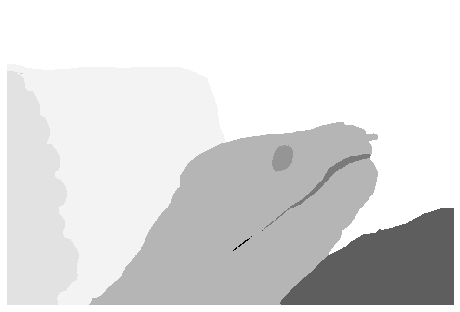

1.2311107002160273
for seg3


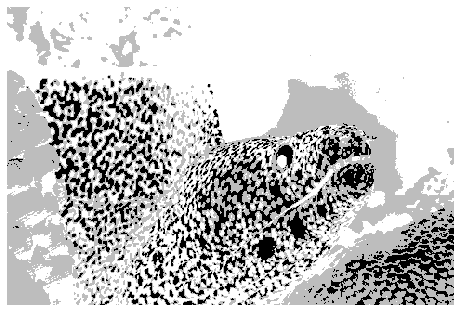

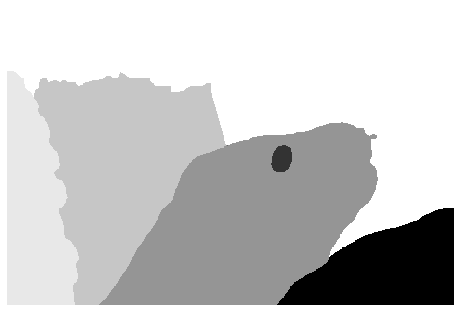

1.183927668899038
for seg4


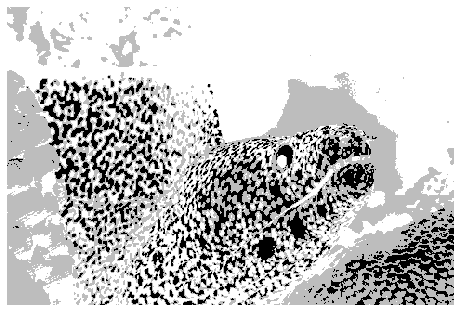

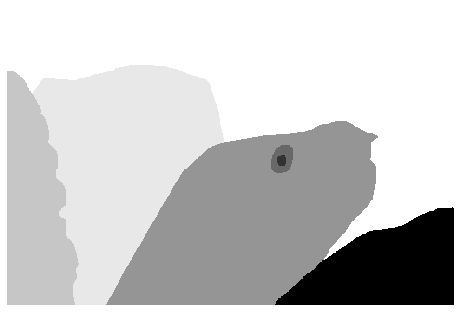

1.2076569430069295
averaagee of image 53= 92.06515709924267
for image54
for seg0


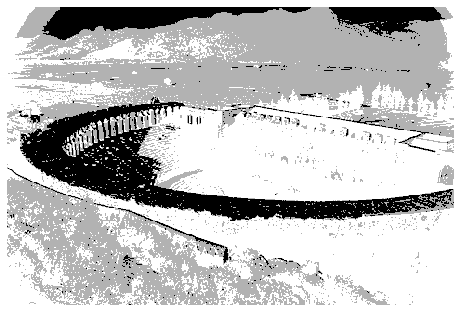

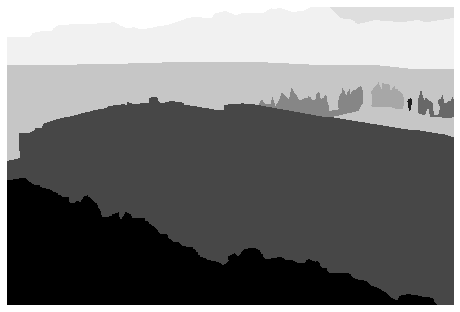

1.2174324441534274
for seg1


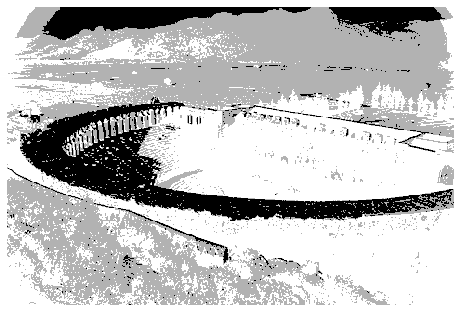

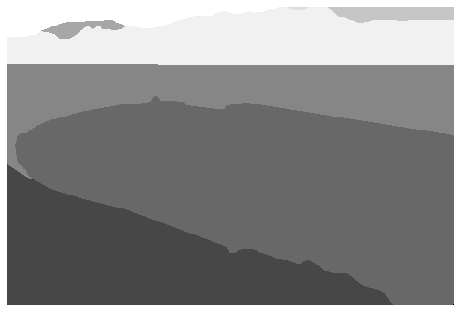

1.1712940889421508
for seg2


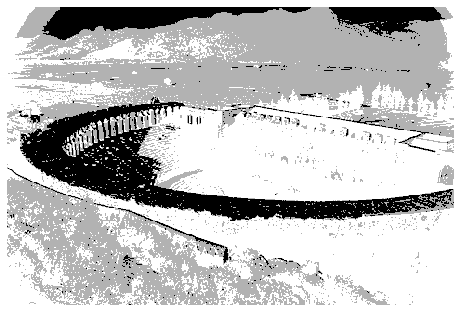

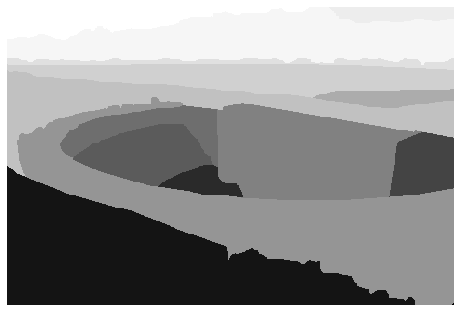

1.8532398277854536
for seg3


Your cell size is close to the size limit (9M). Large new outputs may be dropped. So far, 37.9K of output have been discarded. 

1.7951953213340106
for seg4


Your cell size is close to the size limit (9M). Large new outputs may be dropped. So far, 36.8K of output have been discarded. 

1.7329980531057145
for seg5


Your cell size is close to the size limit (9M). Large new outputs may be dropped. So far, 2.8M of output have been discarded. 

In [85]:
#conditional entropy

import scipy.io
import numpy as np
average=0
x=0
K=[3,5,7,9,11]
for k in K:
  print("for K =" + str(k))
  for image_name in sorted_img_files:
    print("for image"+str(x))
    path="BSR/BSDS500/data/images/train/"+image_name
    #the real image that you want:
    image_matrix=cv2.imread(path)
    imgs_clust_gre=images_to_seg([image_matrix],k)
    #print(imgs_clust_gre[0].shape)
    for j in range(len(images[x])):
      print("for seg"+str(j))
      plt.imshow(imgs_clust_gre[0])
      plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
      plt.show()

      #do sth with ground truth
      groundTruth=images[x][j]
      plt.imshow(groundTruth)
      plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
      plt.show()

      #print(groundTruth.shape)

      total=0
      HC=0

      for i in range(len(np.unique(imgs_clust_gre[0]))):
        q=(np.where((imgs_clust_gre[0]==np.unique(imgs_clust_gre[0])[i])))
        s=[groundTruth[i,j] for i,j in zip(q[0],q[1])]
        unique_elements, counts_elements = np.unique(s, return_counts=True)
        count=np.sum(counts_elements)
        total=0
        for f in range (len(counts_elements)):
          C= -1*np.log2(counts_elements[f]/(count))*(counts_elements[f]/(count))
          total +=C
         # print("totaal=== "+ str(total))
        HCi= total*(count/(len(groundTruth[0])*len(groundTruth[1])))
        #print("HCI=== "+ str(HCi))
        HC+=HCi
      print(HC)
      average+=HC
    print("averaagee of image "+str(x) + "= "+str(average/len(images[x]) ))
    x+=1





